# CMPINF 2100: Midterm exam

## Cesar Hernandez

You may add as many code and markdown cells as you see fit to answer the questions.

## You are NOT allowed to collaborate with anyone on this exam.

### Overview

You will demonstrate your ability to merge, group, summarize, visualize, and find patterns in data. This exam uses data associated with a manufacturing example. An overview of the goals, considerations, CSV files, and variables within the data is provided in a presentation on Canvas. Please read through those slides before starting the exam.

The data are provided in 5 separate CSV files. The CSV files are available on Canvas. You **MUST** download the files and save them to the same working directory as this notebook.

The specific instructions in this notebook tell you when you must JOIN the data together. Please read the problems carefully.

The overall objective of this exam is to JOIN data from multiple files in order to explore and find interesting patterns between the machine operating conditions and supplier information. You will report your findings within this notebook by displaying Pandas DataFrames and statistical visualizations via Seaborn and matplotlib when necessary.  

## Import modules

You are permitted to use the following modules on this exam.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

You may also use the following functions from scikit-learn on this exam.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

You may also use the following sub module from SCIPY.

In [3]:
from scipy.cluster import hierarchy

You are **NOT** permitted to use any other modules or functions. However, you **ARE** permitted to create your own user defined functions if you would like.

## Problem 01

The file names for the 3 machine data sets are provided as strings in the cell below. You are required to read in the CSV files and assign the data to the `m01_df`, `m02_df`, and `m03_df` objects. The data from machine 1 will therefore be associated with `m01_df`, machine 2 is associated with `m02_df`, and machine 3 is associated with `m03_df`.  

In this problem you must explore each of the three machine data sets. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in each data set? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:

* How many unique values for `Batch` are associated with each MACHINE (data set)?
* How many cell phone cases are associated with each `Batch` value for each MACHINE (data set)?
* Do the summary statistics of the OPERATING VARIABLES `x1` through `x4` vary across the three MACHINES?
* Do the summary statistics of the OPERATING VARIABLES `x1` through `x4` vary across the `Batch` values?
* Do the relationships between the OPERATING VARIABLES `x1` through `x4` vary across the three MACHINES?
* Do the relationships between the OPERATING VARIABLES `x1` through `x4` vary across the `Batch` values?

At the conclusion of this problem, you **MUST** CONCATENATE the 3 MACHINE data sets into a single DataFrame. The single DataFrame must be named `machine_df`. Before concatenating, you **MUST** add a column `machine_id` to each DataFrame with the correct index value for that machine (1, 2, or 3). The concatenating DataFrame variable name is provided as a reminder to you below. 

You may add as many markdown and code cells as you see fit to answer this question. Include markdown cells stating what you see in the figures and why you selected to use them.

#### SOLUTION

In [4]:
# Define the files's for the 3 machine level CSV files

file_m01 = 'midterm_machine_01.csv'

file_m02 = 'midterm_machine_02.csv'

file_m03 = 'midterm_machine_03.csv'

In [5]:
# read in the CSV files and name them accordingly

m01_df = pd.read_csv(file_m01)

m02_df = pd.read_csv(file_m02)

m03_df = pd.read_csv(file_m03)

#### For the Machine 01 DF

In [6]:
m01_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5152 non-null   object 
 1   Batch   5152 non-null   int64  
 2   s_id    5152 non-null   int64  
 3   x1      5152 non-null   float64
 4   x2      5152 non-null   float64
 5   x3      5152 non-null   float64
 6   x4      5152 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 281.9+ KB


In [7]:
m01_df.shape

(5152, 7)

The Machine 01 DataFrame has 5152 records and 7 variables: 4 are floats, 2 are integers, and 1 is object (ID variable).

In [8]:
m01_df.nunique()

ID       5152
Batch      50
s_id      149
x1       5152
x2       5152
x3       5152
x4       5152
dtype: int64

I am going to make both Batch and s_id into category variables. This is because Batch refers to a Batch number, which is a group and s_id refers to an ID variable.

In [9]:
m01_df["Batch"] = m01_df.Batch.astype("category")

In [10]:
m01_df["s_id"] = m01_df.s_id.astype("category")

In [11]:
m01_df.isna().sum()

ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64

None of the variables are missing values.

##### Machine 01 DF Marginal Distributions for Continous Variables

In [12]:
m01_df_features = m01_df.select_dtypes("number").columns.to_list()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


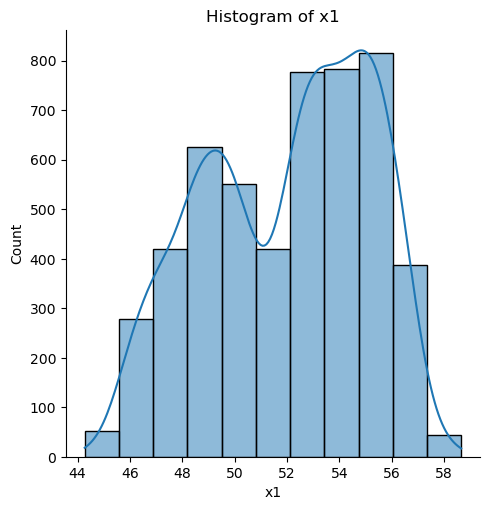

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


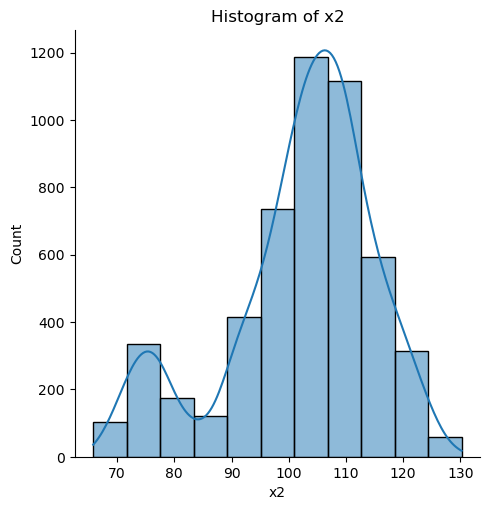

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


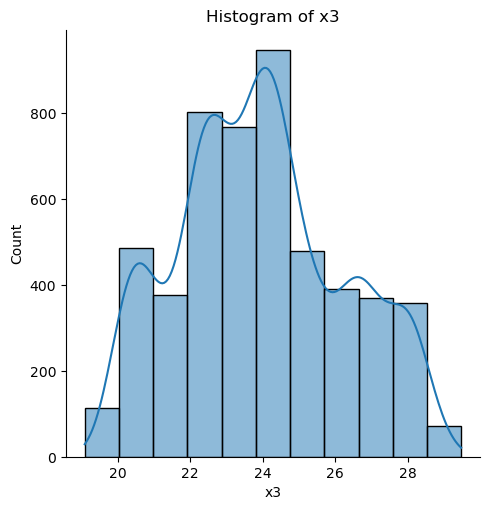

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


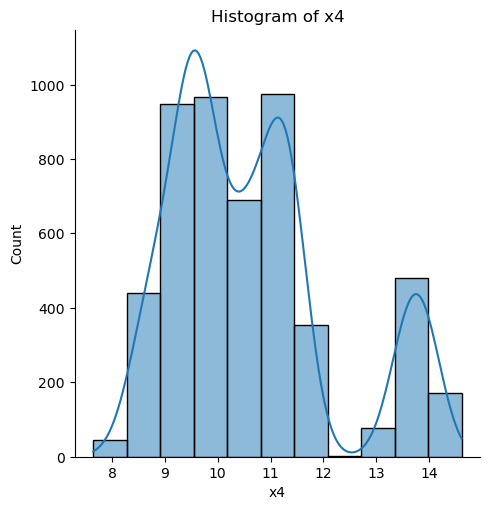

In [13]:
for var in m01_df_features:
    sns.displot(data=m01_df, x=var, kind="hist", kde=True, bins=11)
    plt.title(f"Histogram of {var}")
    plt.show()

##### Machine 01 DF Marginal Distributions for Categorical Variables

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


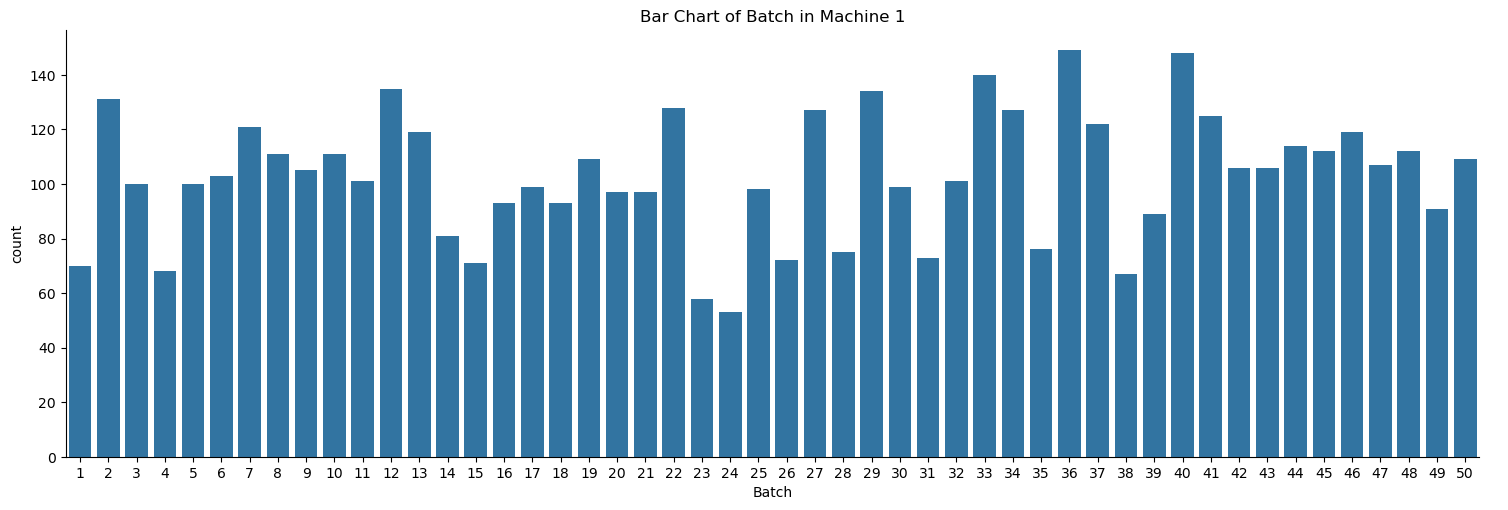

In [14]:
sns.catplot(data=m01_df, x="Batch", kind="count", aspect=3)
plt.title(f"Bar Chart of Batch in Machine 1")
plt.show()

#### For the Machine 02 DF

In [15]:
m02_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5119 non-null   object 
 1   Batch   5119 non-null   int64  
 2   s_id    5119 non-null   int64  
 3   x1      5119 non-null   float64
 4   x2      5119 non-null   float64
 5   x3      5119 non-null   float64
 6   x4      5119 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 280.1+ KB


In [16]:
m02_df.shape

(5119, 7)

The Machine 02 DataFrame has 5119 records and 7 variables: 4 are floats, 2 are integers, and 1 is object (ID variable).

In [17]:
m02_df.nunique()

ID       5119
Batch      50
s_id      133
x1       5119
x2       5119
x3       5119
x4       5119
dtype: int64

I am going to make both Batch and s_id into category variables. This is because Batch refers to a Batch number, which is a group and s_id refers to an ID variable.

In [18]:
m02_df["Batch"] = m02_df.Batch.astype("category")

In [19]:
m02_df["s_id"] = m02_df.s_id.astype("category")

In [20]:
m02_df.isna().sum()

ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64

None of the variables are missing values.

##### Machine 02 DF Marginal Distributions for Continous Variables

In [21]:
m02_df_features = m02_df.select_dtypes("number").columns.to_list()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


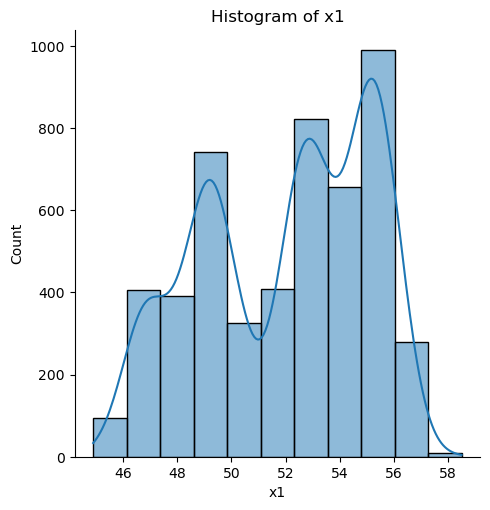

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


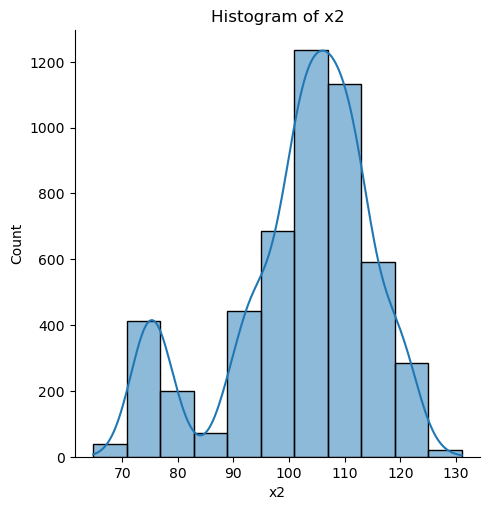

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


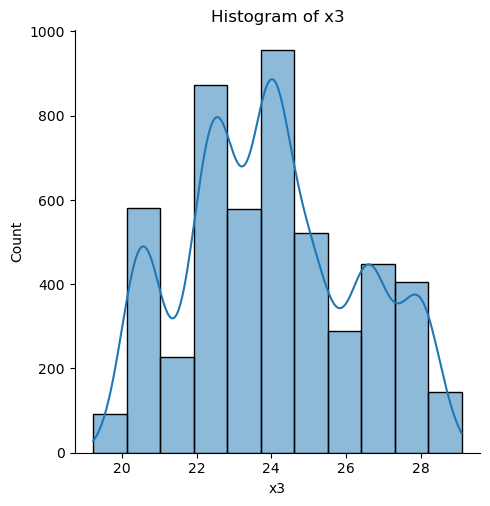

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


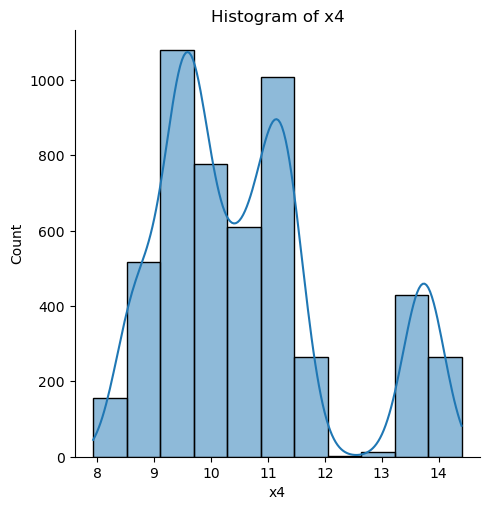

In [22]:
for var in m02_df_features:
    sns.displot(data=m02_df, x=var, kind="hist", kde=True, bins=11)
    plt.title(f"Histogram of {var}")
    plt.show()

##### Machine 02 DF Marginal Distributions for Categorical Variables

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


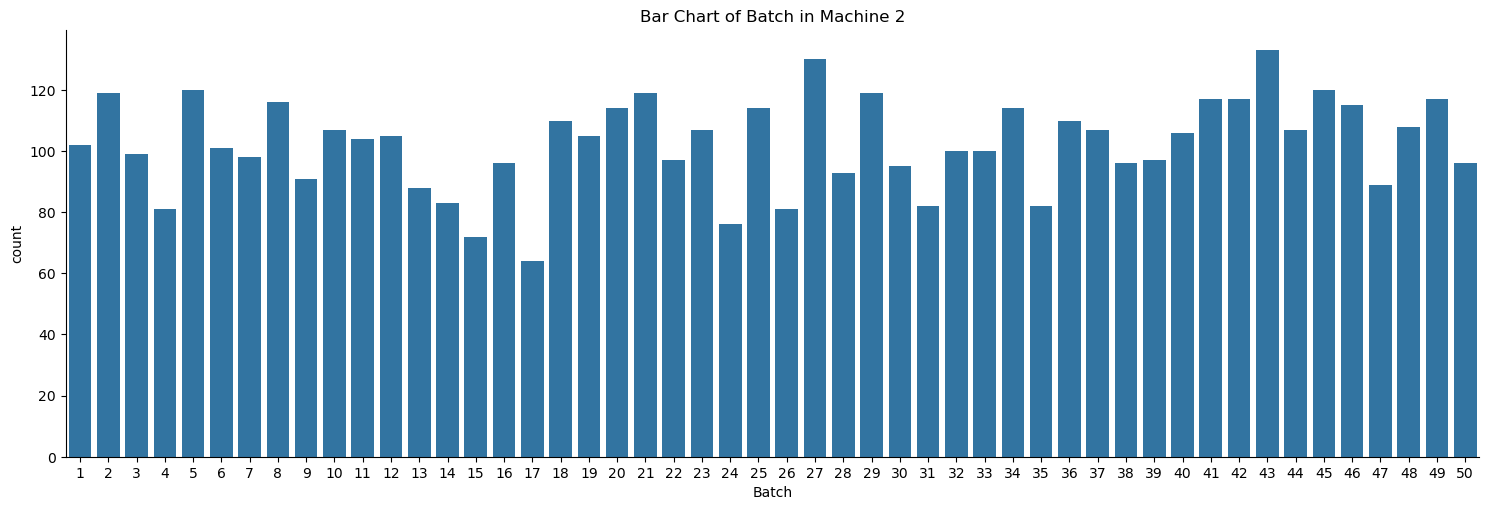

In [23]:
sns.catplot(data=m02_df, x="Batch", kind="count", aspect=3)
plt.title(f"Bar Chart of Batch in Machine 2")
plt.show()

#### For the Machine 03 DF

In [24]:
m03_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4458 entries, 0 to 4457
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4458 non-null   object 
 1   Batch   4458 non-null   int64  
 2   s_id    4458 non-null   int64  
 3   x1      4458 non-null   float64
 4   x2      4458 non-null   float64
 5   x3      4458 non-null   float64
 6   x4      4458 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 243.9+ KB


In [25]:
m03_df.shape

(4458, 7)

The Machine 03 DataFrame has 4458 records and 7 variables: 4 are floats, 2 are integers, and 1 is object (ID variable).

In [26]:
m03_df.nunique()

ID       4458
Batch      41
s_id      141
x1       4458
x2       4458
x3       4458
x4       4458
dtype: int64

I am going to make both Batch and s_id into category variables. This is because Batch refers to a Batch number, which is a group and s_id refers to an ID variable.

In [27]:
m03_df["Batch"] = m03_df.Batch.astype("category")

In [28]:
m03_df["s_id"] = m03_df.s_id.astype("category")

In [29]:
m03_df.isna().sum()

ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64

None of the variables are missing values.

##### Machine 03 DF Marginal Distributions for Continous Variables

In [30]:
m03_df_features = m03_df.select_dtypes("number").columns.to_list()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


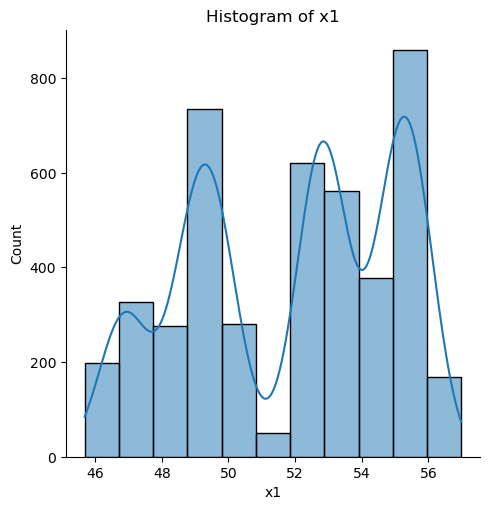

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


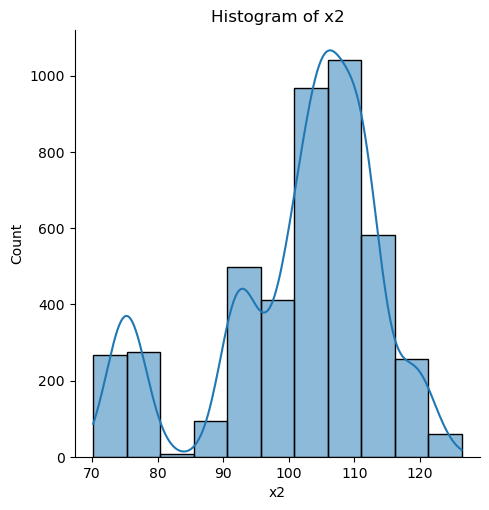

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


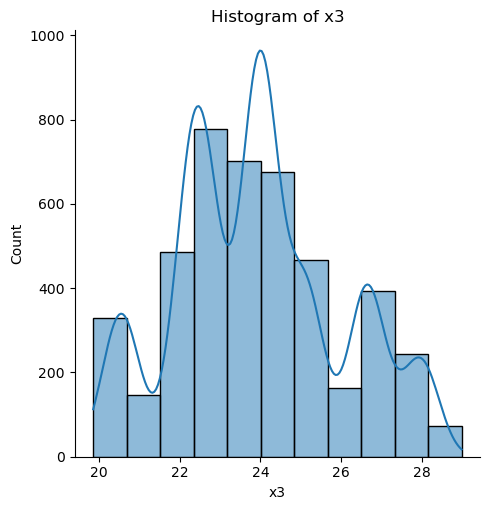

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


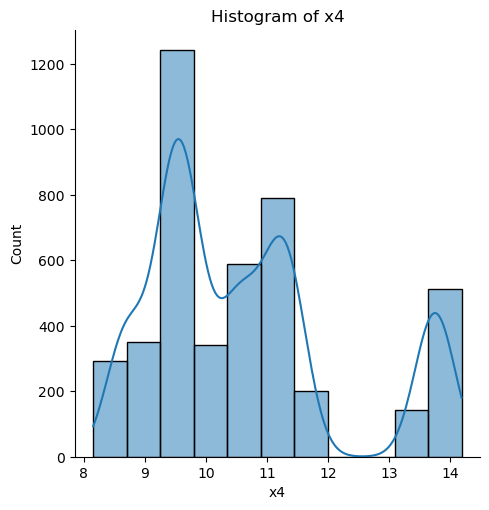

In [31]:
for var in m03_df_features:
    sns.displot(data=m03_df, x=var, kind="hist", kde=True, bins=11)
    plt.title(f"Histogram of {var}")
    plt.show()

##### Machine 02 DF Marginal Distributions for Categorical Variables

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


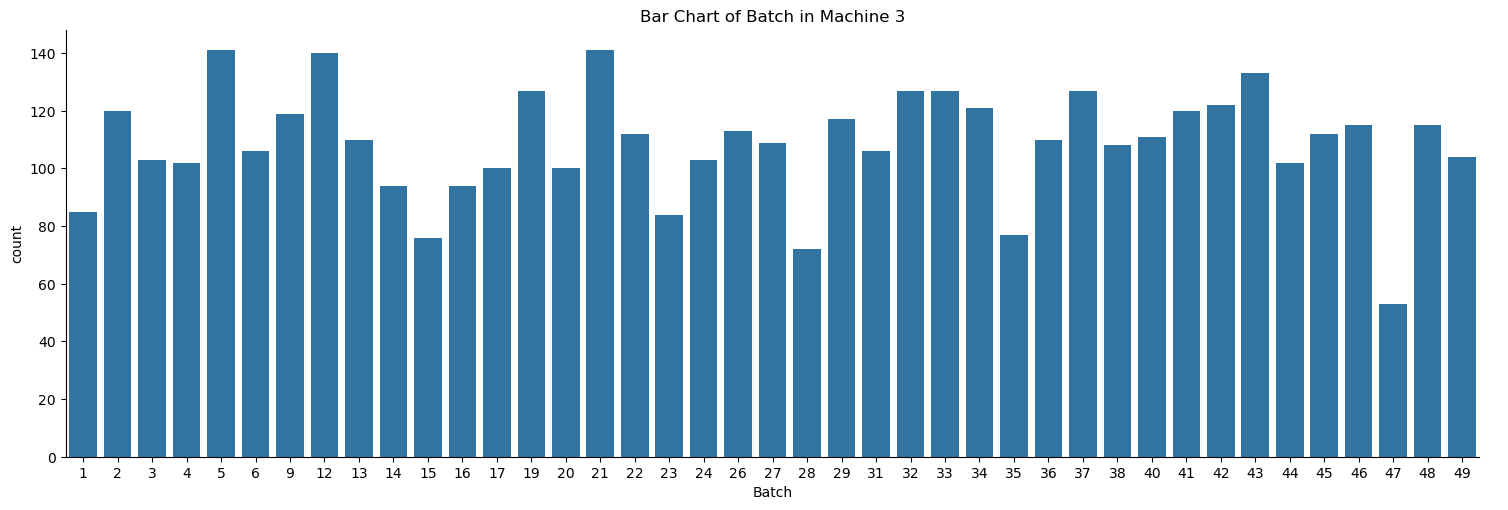

In [32]:
sns.catplot(data=m03_df, x="Batch", kind="count", aspect=3)
plt.title(f"Bar Chart of Batch in Machine 3")
plt.show()

### Combining the data

In [33]:
# concatenate the 3 DataFrames into a single DataFrame which includes the `machine_id` variable
m01_df["machine_id"] = 1
m02_df["machine_id"] = 2
m03_df["machine_id"] = 3

In [34]:
machine_df = pd.concat([m01_df, m02_df, m03_df])

In [35]:
machine_df["Batch"] = machine_df.Batch.astype("category")

In [36]:
machine_df["s_id"] = machine_df.s_id.astype("category")

In [37]:
machine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14729 entries, 0 to 4457
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          14729 non-null  object  
 1   Batch       14729 non-null  category
 2   s_id        14729 non-null  category
 3   x1          14729 non-null  float64 
 4   x2          14729 non-null  float64 
 5   x3          14729 non-null  float64 
 6   x4          14729 non-null  float64 
 7   machine_id  14729 non-null  int64   
dtypes: category(2), float64(4), int64(1), object(1)
memory usage: 856.3+ KB


Melt the data from WIDE to LONG.

In [38]:
id_vars=["ID", "Batch", "s_id", "machine_id"]
val_vars=["x1", "x2", "x3", "x4"]

In [39]:
machine_lf = machine_df.reset_index().rename(columns={"index": "rowid"}).melt(id_vars=id_vars+ ["rowid"], value_vars=val_vars)

In [40]:
machine_lf

ID Batch s_id  machine_id  rowid variable      value
0      B001-M01-S001     1    1           1      0       x1  50.117118
1      B001-M01-S002     1    2           1      1       x1  46.887333
2      B001-M01-S003     1    3           1      2       x1  50.132744
3      B001-M01-S004     1    4           1      3       x1  48.501042
4      B001-M01-S005     1    5           1      4       x1  49.690442
...              ...   ...  ...         ...    ...      ...        ...
58911  B049-M03-S100    49  100           3   4453       x4  13.753264
58912  B049-M03-S101    49  101           3   4454       x4  13.636539
58913  B049-M03-S102    49  102           3   4455       x4  13.678206
58914  B049-M03-S103    49  103           3   4456       x4  13.880084
58915  B049-M03-S104    49  104           3   4457       x4  13.853014

[58916 rows x 7 columns]

#### How many unique values for Batch are associated with each MACHINE (data set)?

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


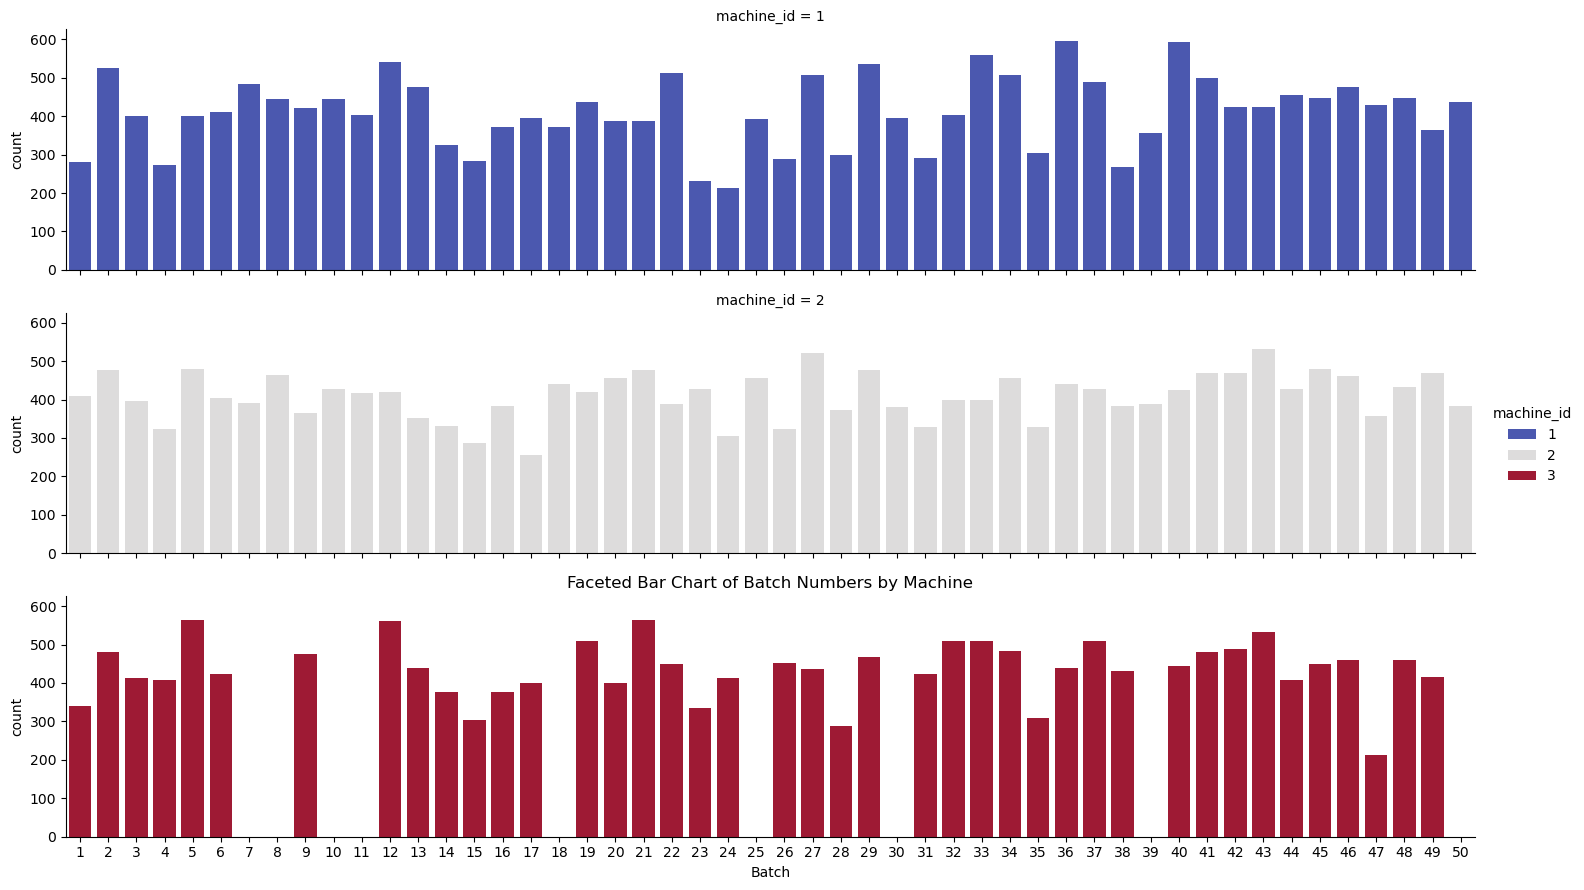

In [41]:
sns.catplot(data=machine_lf, x="Batch", row="machine_id", hue="machine_id", palette="coolwarm", kind="count", aspect=5, height=3)
plt.title("Faceted Bar Chart of Batch Numbers by Machine")

plt.show()

In [42]:
machine_df.groupby("machine_id").aggregate(UniqueVal = ("Batch", "nunique")).reset_index()

machine_id  UniqueVal
0           1         50
1           2         50
2           3         41

Both Machines 1 and 2 have every Batch listed in their datasets. Machine 3 is missing 9 Batch numbers, which are numbers 7, 8, 10, 11, 18, 25, 30, 39, and 50.

#### How many cell phone cases are associated with each Batch value for each MACHINE (data set)?

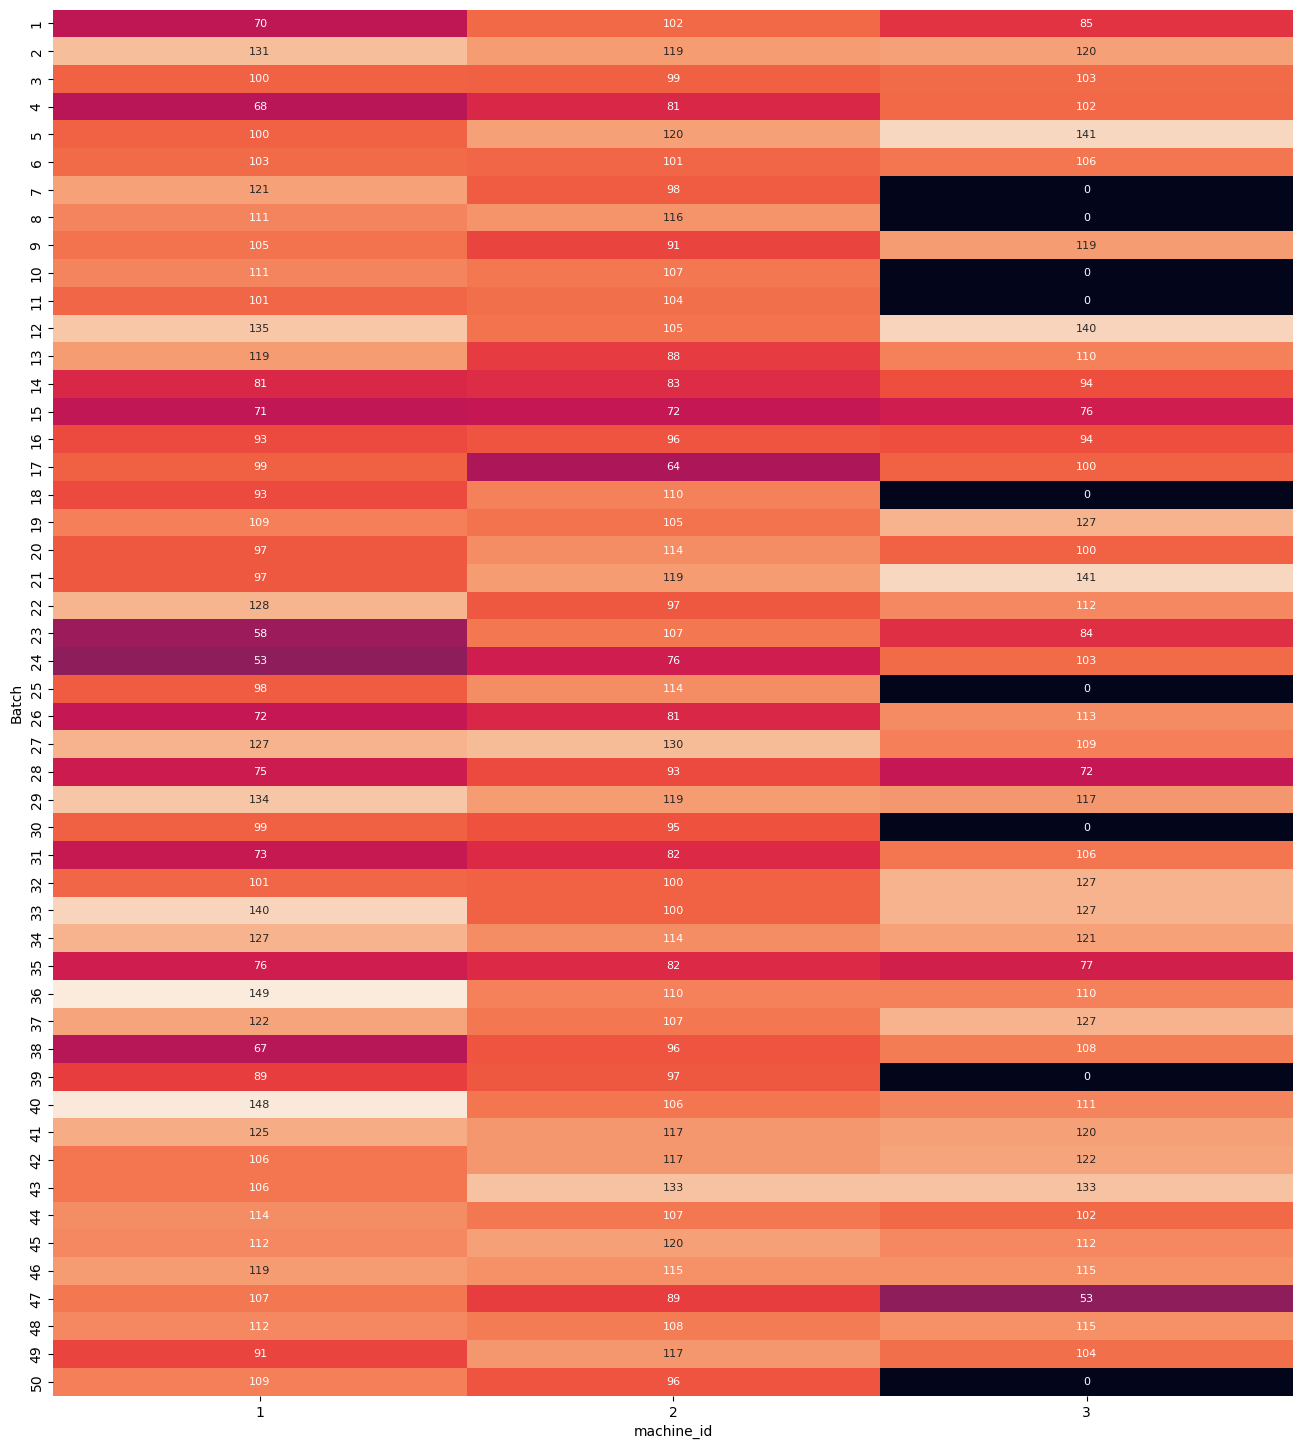

In [43]:
fig, ax = plt.subplots(figsize=(16,18))

sns.heatmap(data=pd.crosstab(machine_df.Batch, machine_df.machine_id), 
            cbar=False, 
            annot=True, 
            annot_kws={"size":8}, fmt="d",
           ax=ax)

plt.show()

On Machine 1, Batch 36 has the most cellphone cases, followed by Batch 40. 

For Machine 2, Batch 43 has the highest count, with Batch 27 coming next. 

On Machine 3, the top Batches are 21 and 5, followed by Batch 12.

#### Do the summary statistics of the OPERATING VARIABLES x1 through x4 vary across the three MACHINES?

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


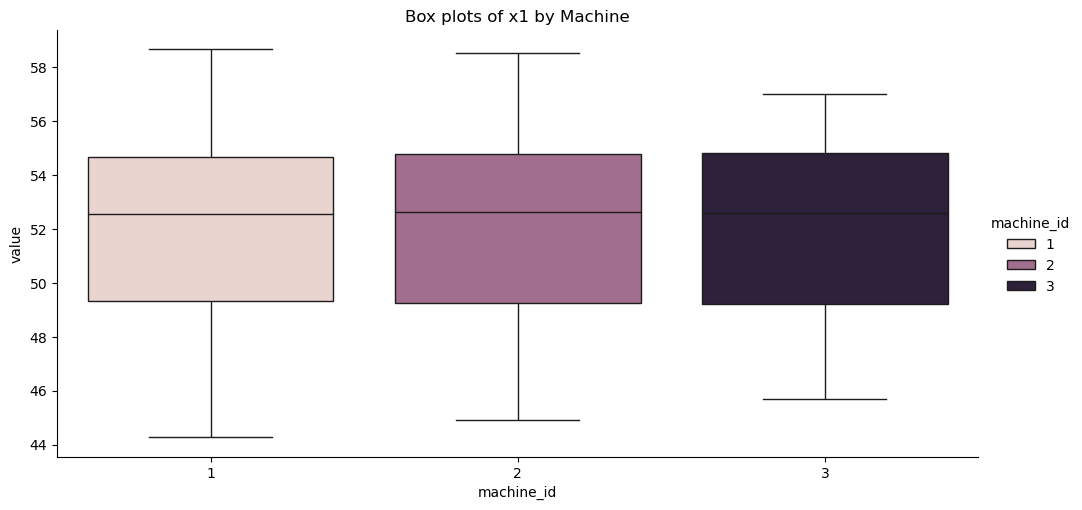

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


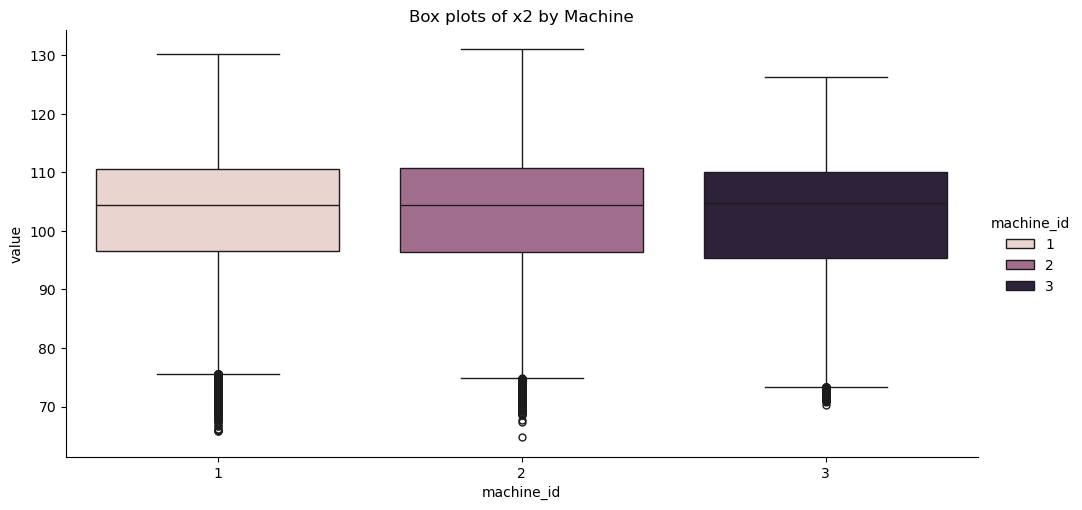

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


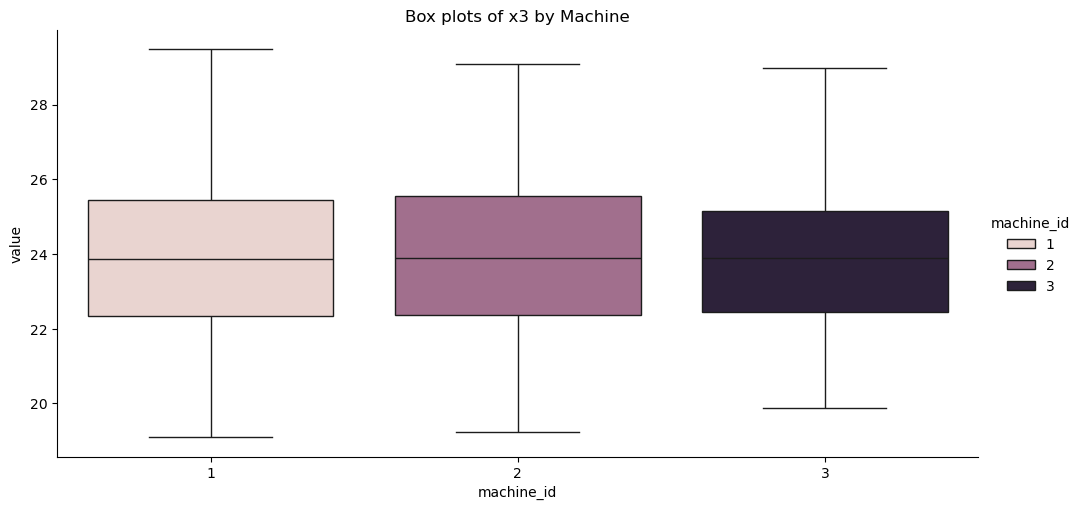

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


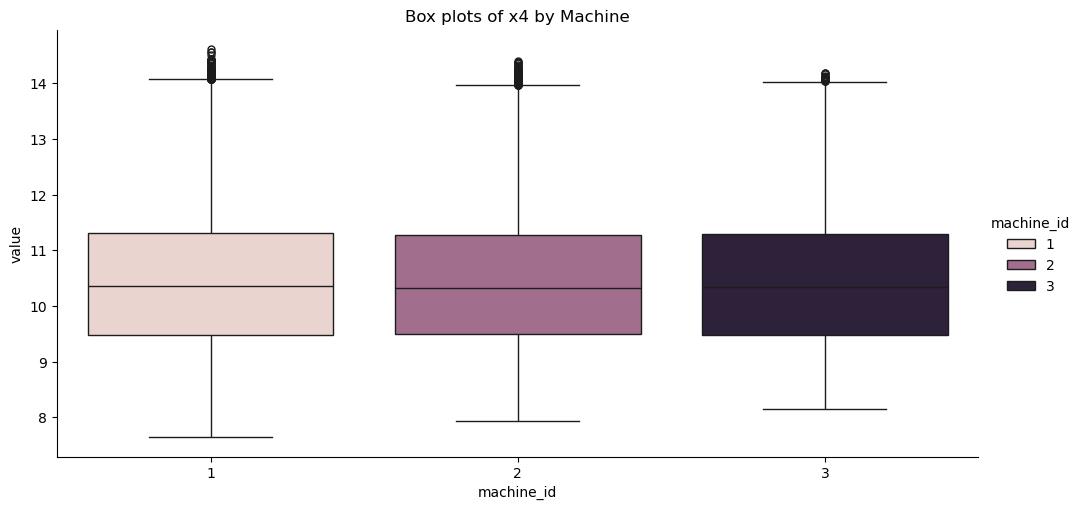

In [44]:
for var in val_vars:
    sns.catplot(data=machine_lf.loc[machine_lf.variable==var,:], x="machine_id", y="value", hue="machine_id", kind="box", aspect=2)
    plt.title(f"Box plots of {var} by Machine")

    plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


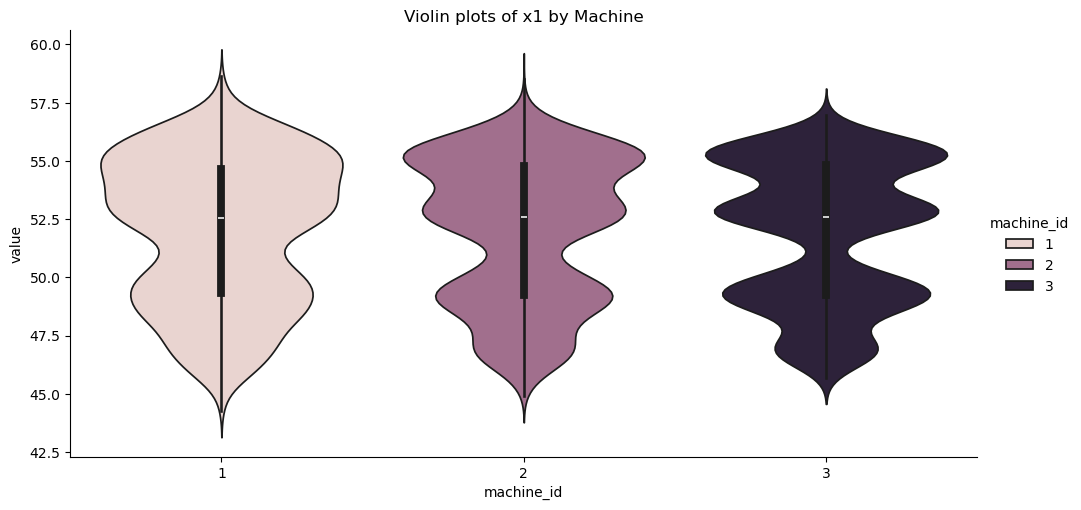

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


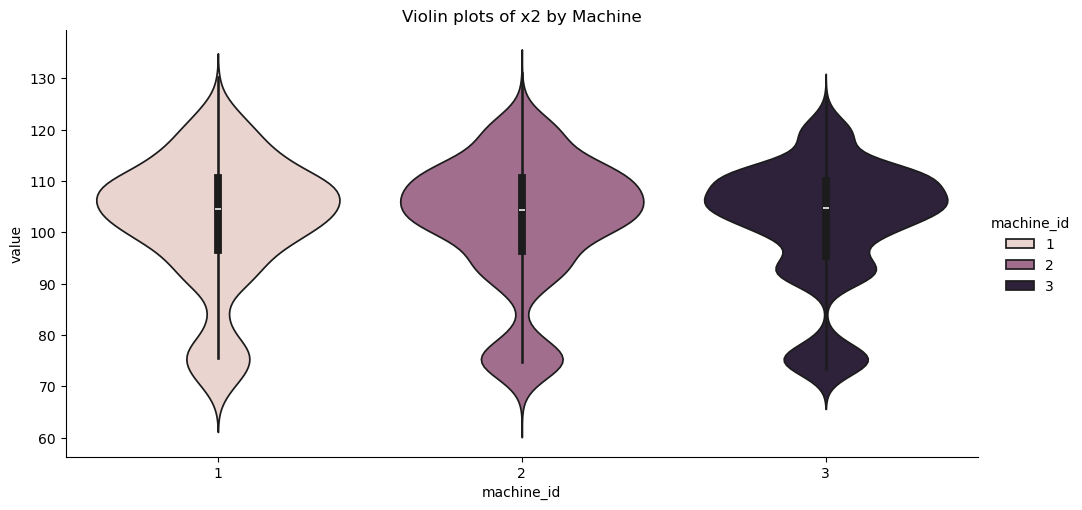

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


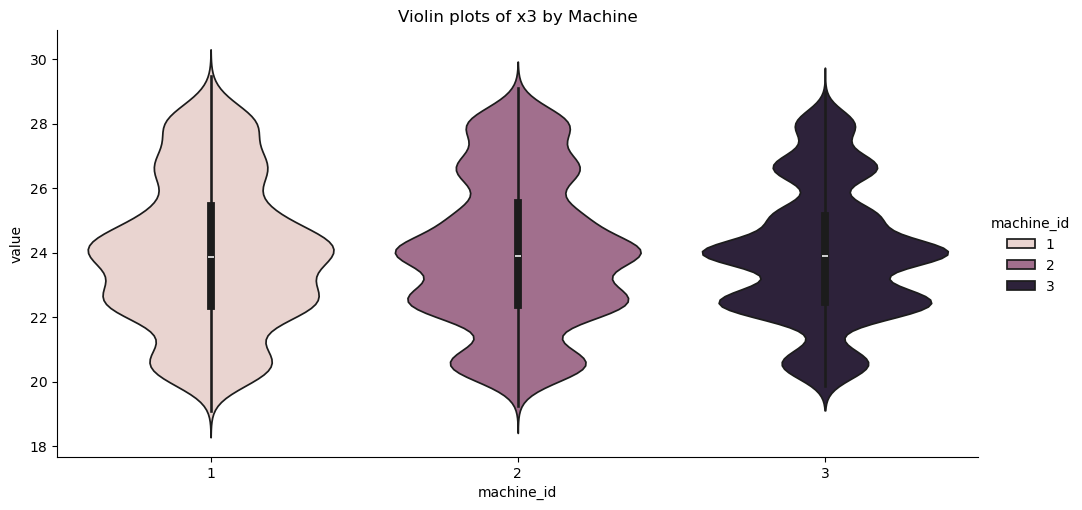

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


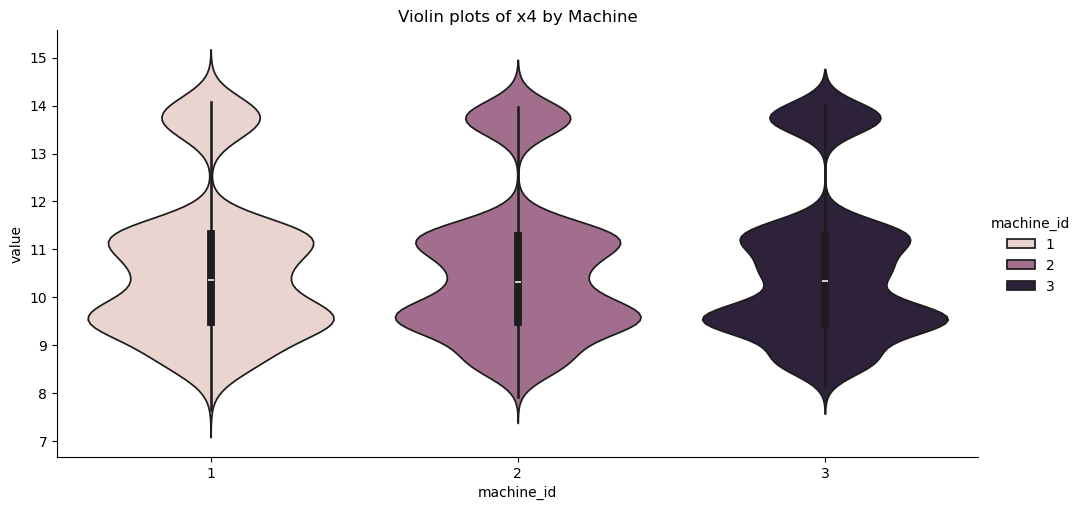

In [45]:
for var in val_vars:
    sns.catplot(data=machine_lf.loc[machine_lf.variable==var,:], x="machine_id", y="value", hue="machine_id", kind="violin", aspect=2)
    plt.title(f"Violin plots of {var} by Machine")

    plt.show()

The boxplots show that the machines have similar medians for each variable (x1–x4), with only minor differences. The violin plots also reveal similar distributions, though Machine 3’s distribution appears slightly different for each variable compared to the other two machines.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


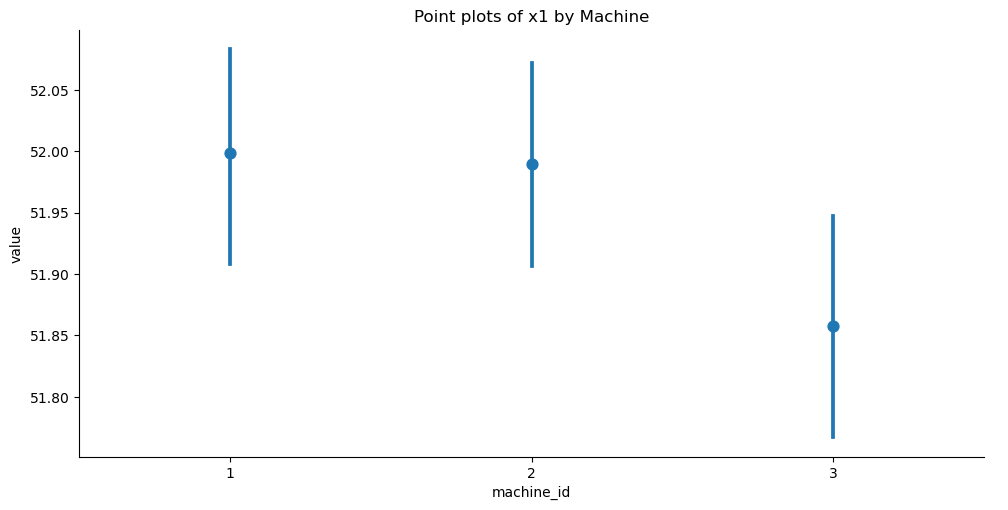

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


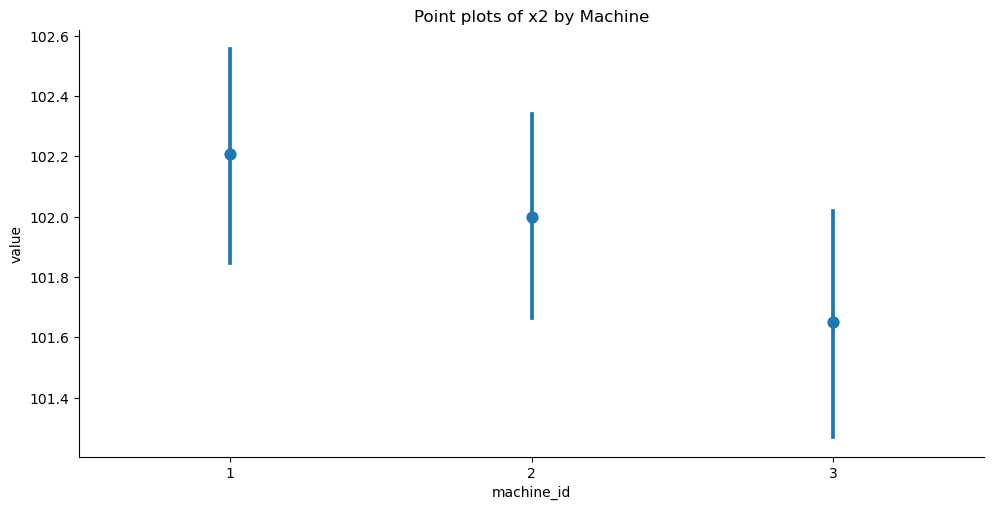

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


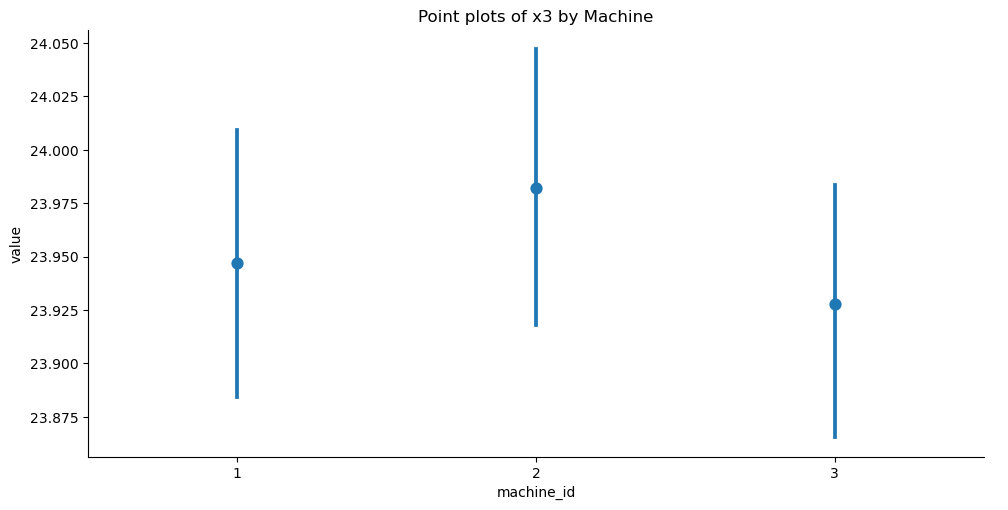

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


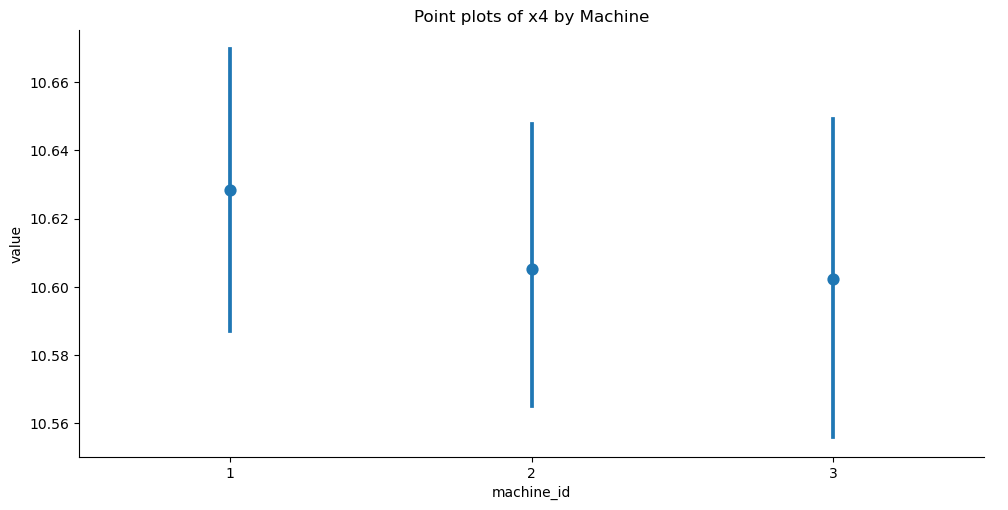

In [46]:
for var in val_vars:
    sns.catplot(data=machine_lf.loc[machine_lf.variable==var,:], x="machine_id", y="value", linestyle="none", kind="point", aspect=2)
    plt.title(f"Point plots of {var} by Machine")

    plt.show()

From the point plot, we can see that the confidence intervals for the means of each variable overlap significantly across the machines. This suggests that there may not be much variation in x1 through x4 between the machines.

#### Do the summary statistics of the OPERATING VARIABLES x1 through x4 vary across the Batch values?

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


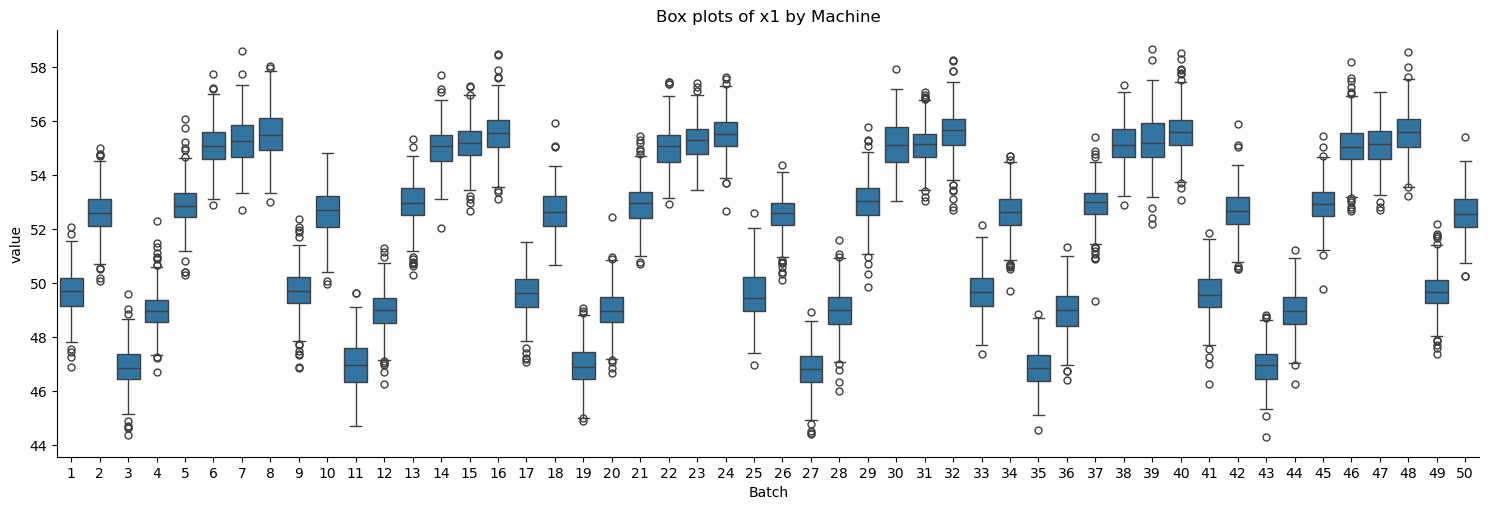

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


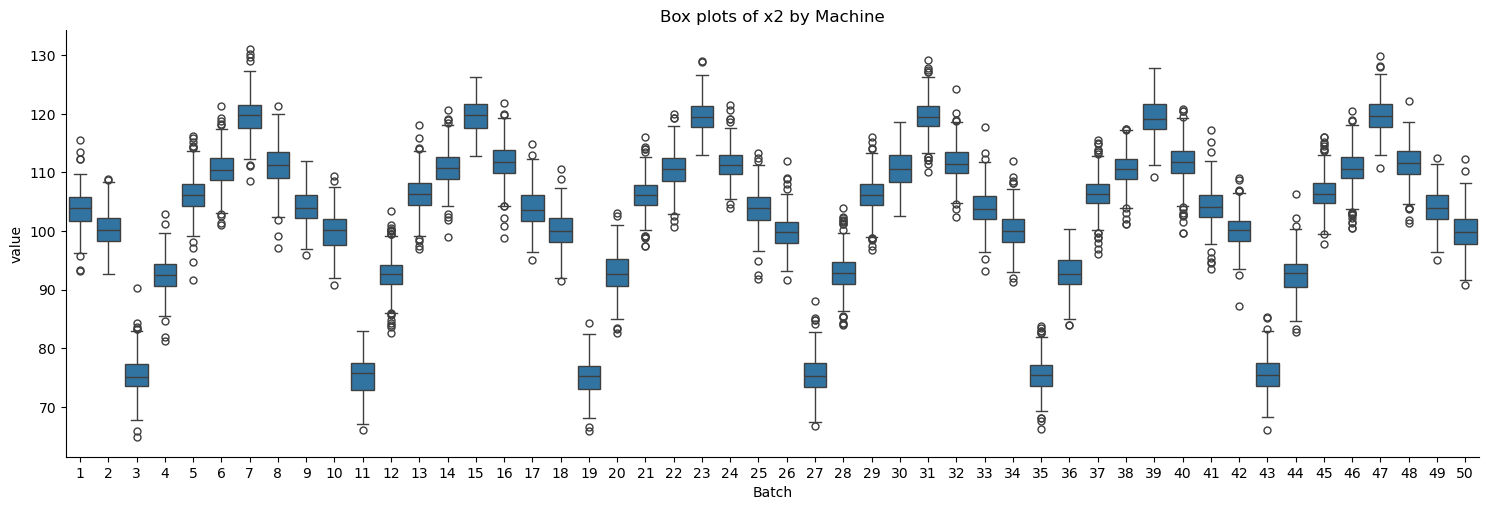

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


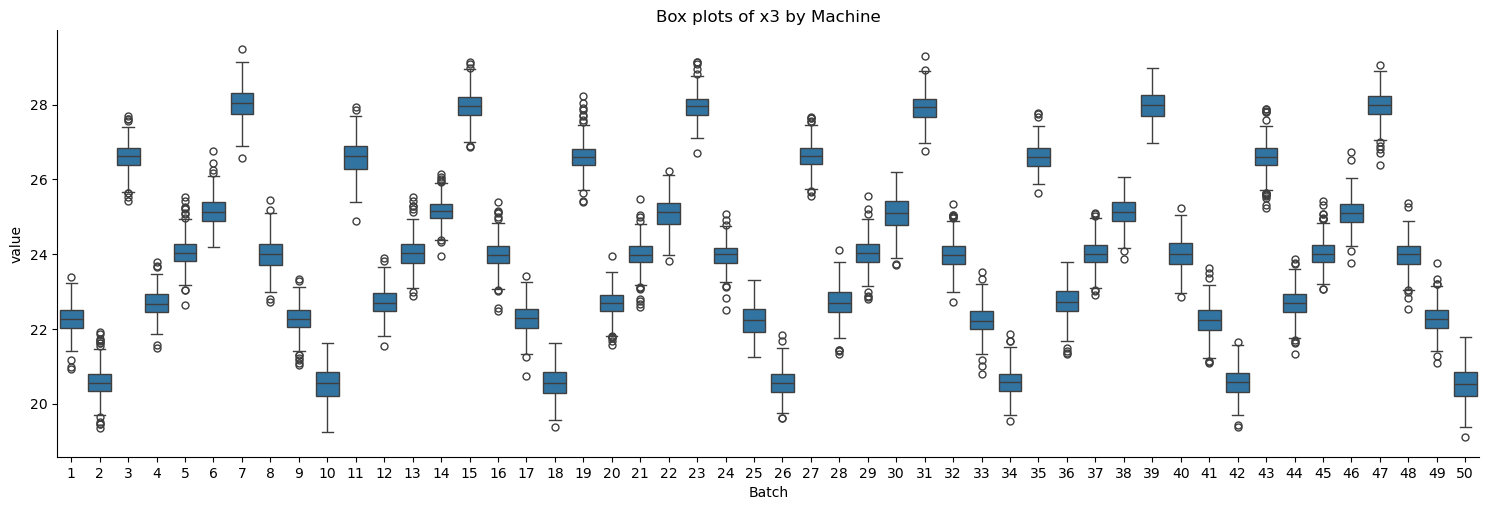

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


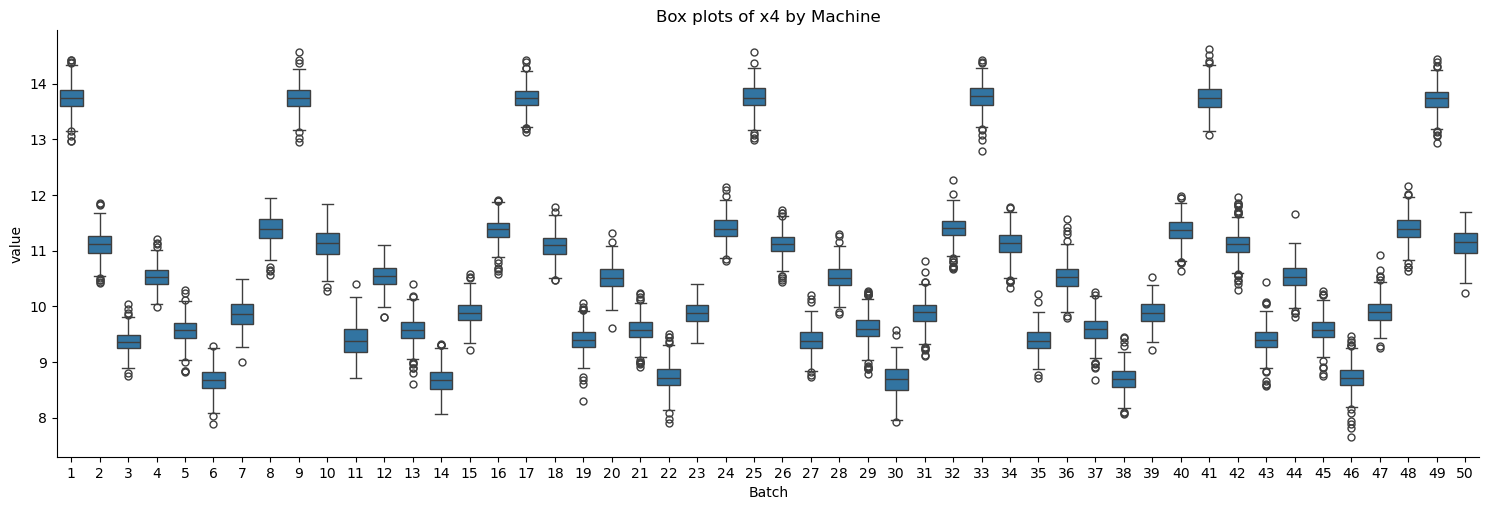

In [47]:
for var in val_vars:
    sns.catplot(data=machine_lf.loc[machine_lf.variable==var,:], x="Batch", y="value", kind="box", aspect=3)
    plt.title(f"Box plots of {var} by Machine")

    plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


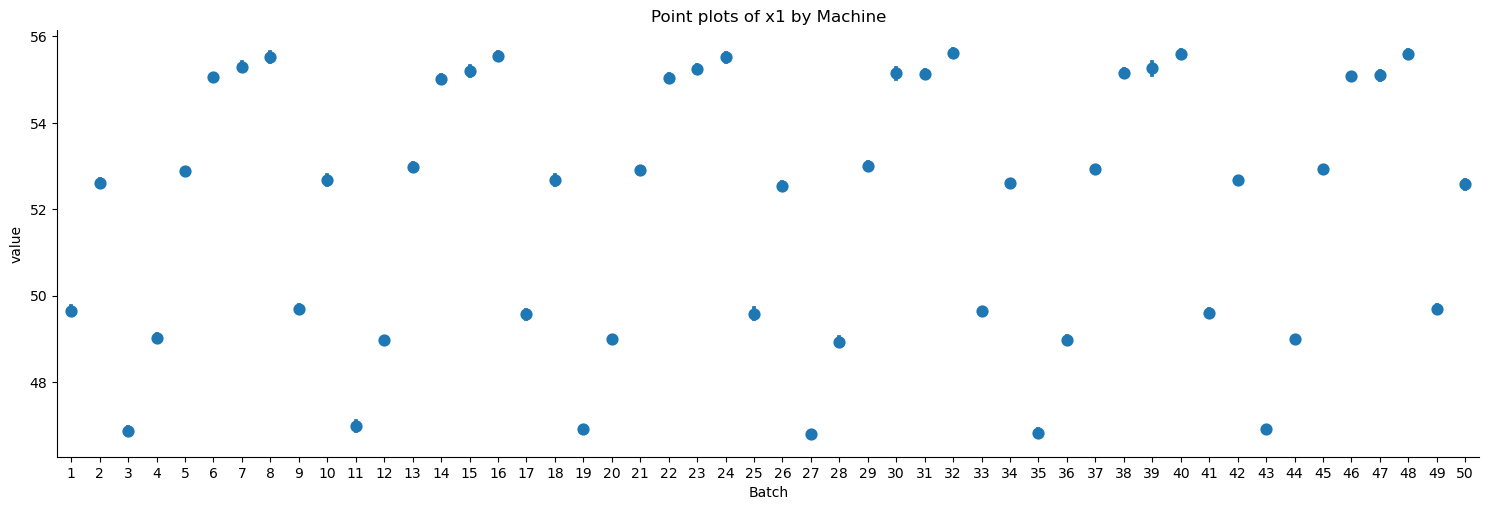

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


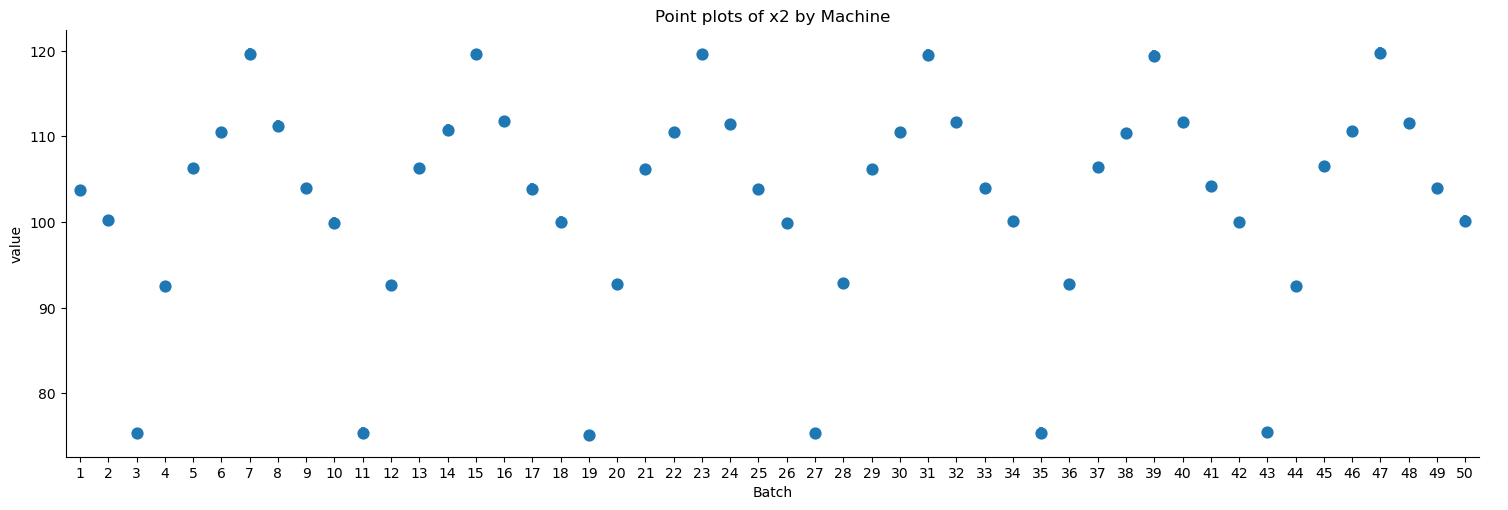

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


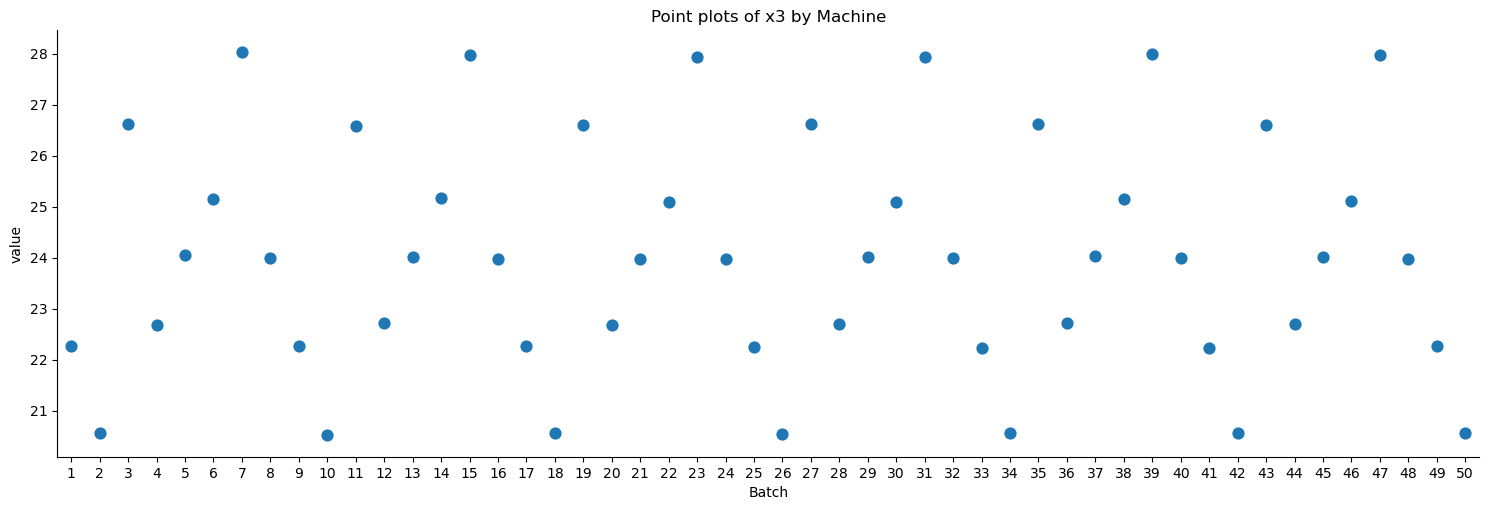

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


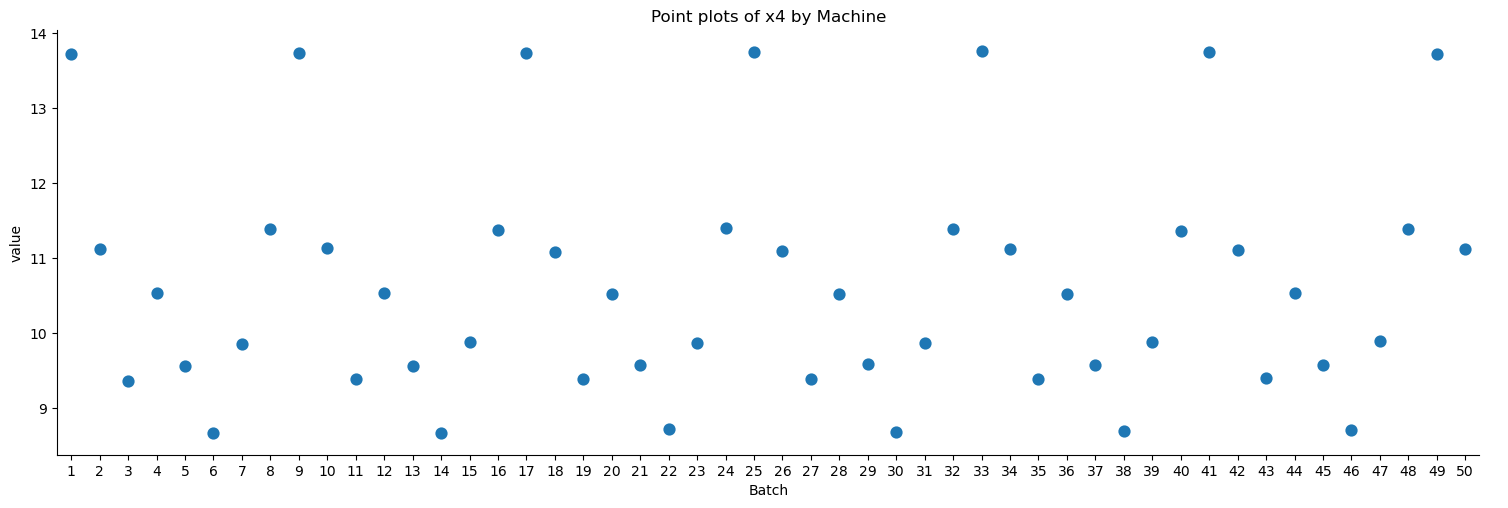

In [48]:
for var in val_vars:
    sns.catplot(data=machine_lf.loc[machine_lf.variable==var,:], x="Batch", y="value", kind="point", aspect=3, linestyle="none")
    plt.title(f"Point plots of {var} by Machine")

    plt.show()

Looking at the boxplots and point plots above, there's a lot of overlap among many of the batches regarding both the median and mean. This suggests that there might not be significant differences between the batches.

#### Do the relationships between the OPERATING VARIABLES x1 through x4 vary across the three MACHINES?


/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


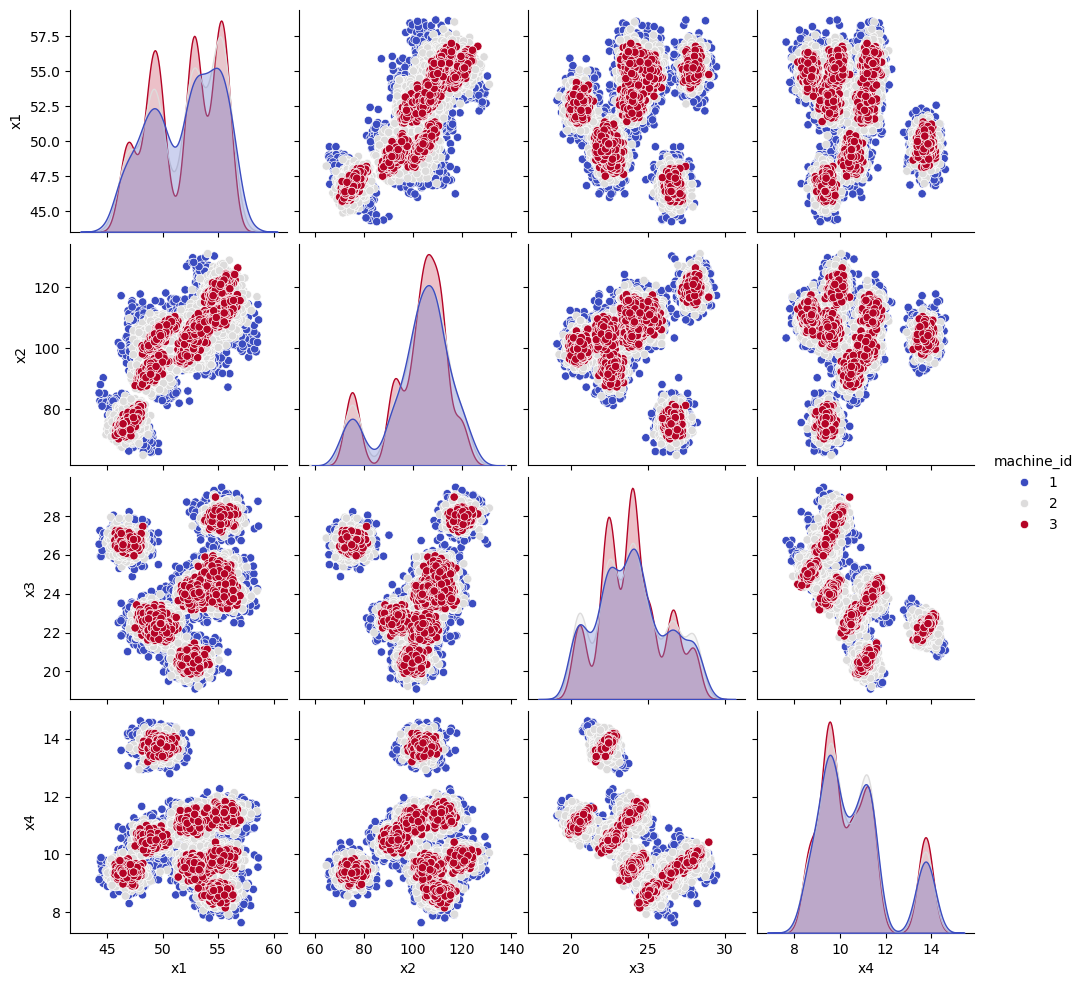

In [49]:
sns.pairplot(data=machine_df, hue="machine_id", diag_kws={"common_norm": False}, palette="coolwarm")
plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


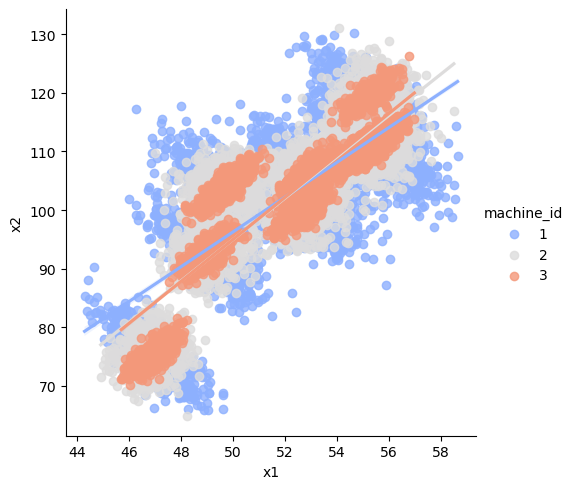

In [50]:
sns.lmplot(data=machine_df, x="x1", y="x2", hue="machine_id", palette="coolwarm")
plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


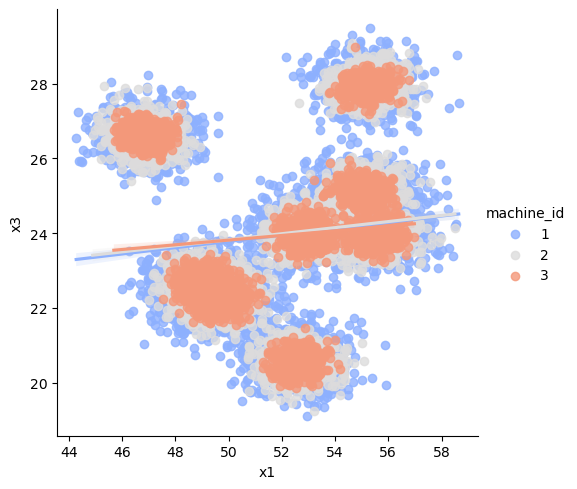

In [51]:
sns.lmplot(data=machine_df, x="x1", y="x3", hue="machine_id", palette="coolwarm")
plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


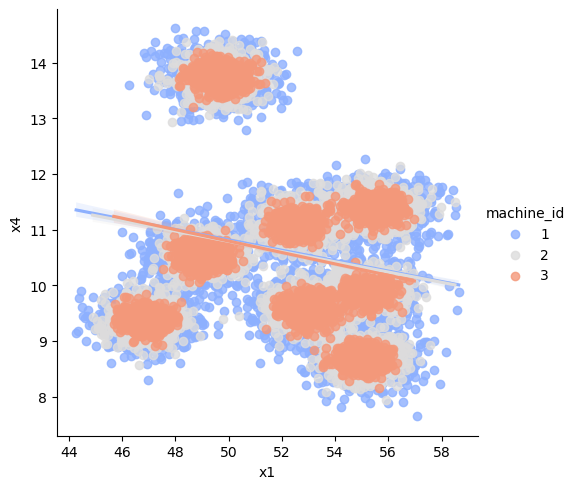

In [52]:
sns.lmplot(data=machine_df, x="x1", y="x4", hue="machine_id", palette="coolwarm")
plt.show()

I don’t think the relationships between x1 through x4 vary across machines. There’s a lot of overlap and clustering in the same areas, no matter the machine.

Also, in the trend plots of x1 with the other variables (x2-x4), the trends look almost parallel, and the machine groups have data scattered throughout.

#### Do the relationships between the OPERATING VARIABLES x1 through x4 vary across the Batch values?

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


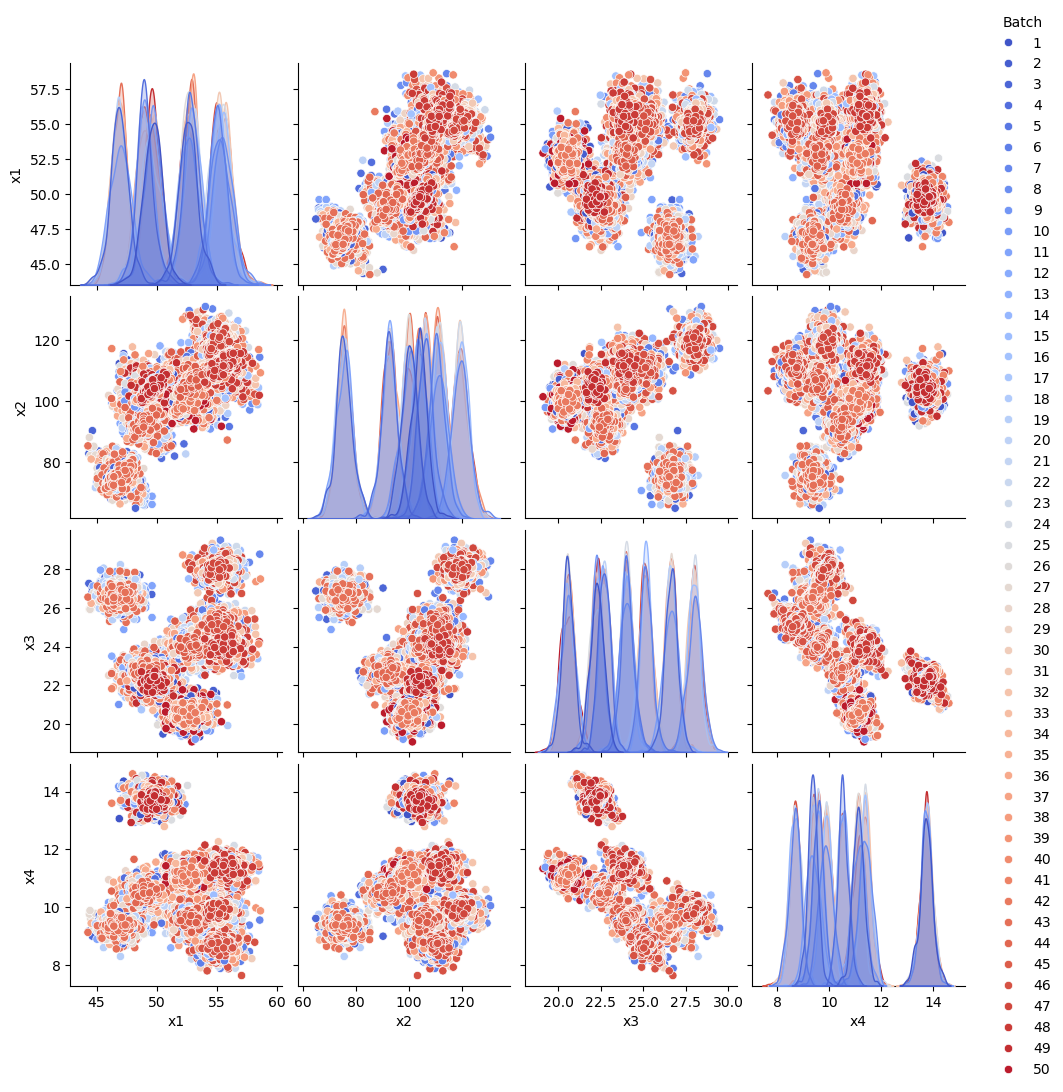

In [53]:
sns.pairplot(data=machine_df.loc[:,["Batch", "x1", "x2", "x3", "x4"]], hue="Batch", diag_kws={"common_norm": False}, palette="coolwarm")
plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


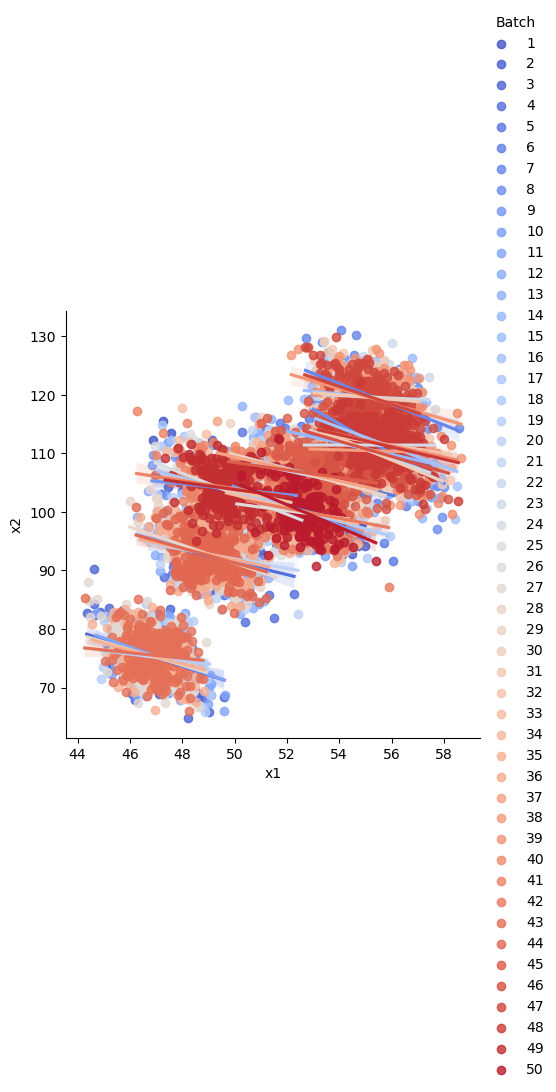

In [54]:
sns.lmplot(data=machine_df, x="x1", y="x2", hue="Batch", palette="coolwarm")
plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


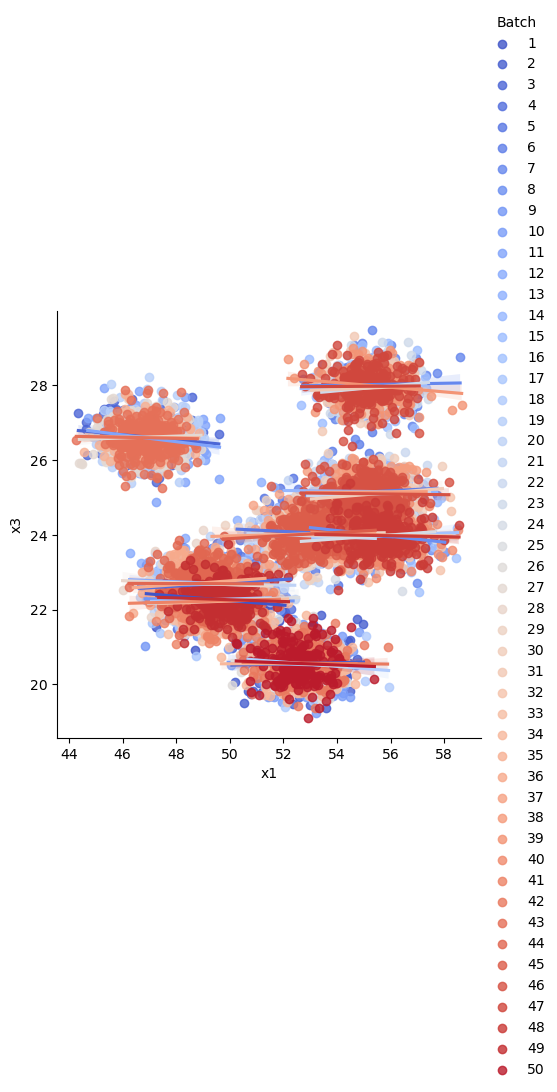

In [55]:
sns.lmplot(data=machine_df, x="x1", y="x3", hue="Batch", palette="coolwarm")
plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


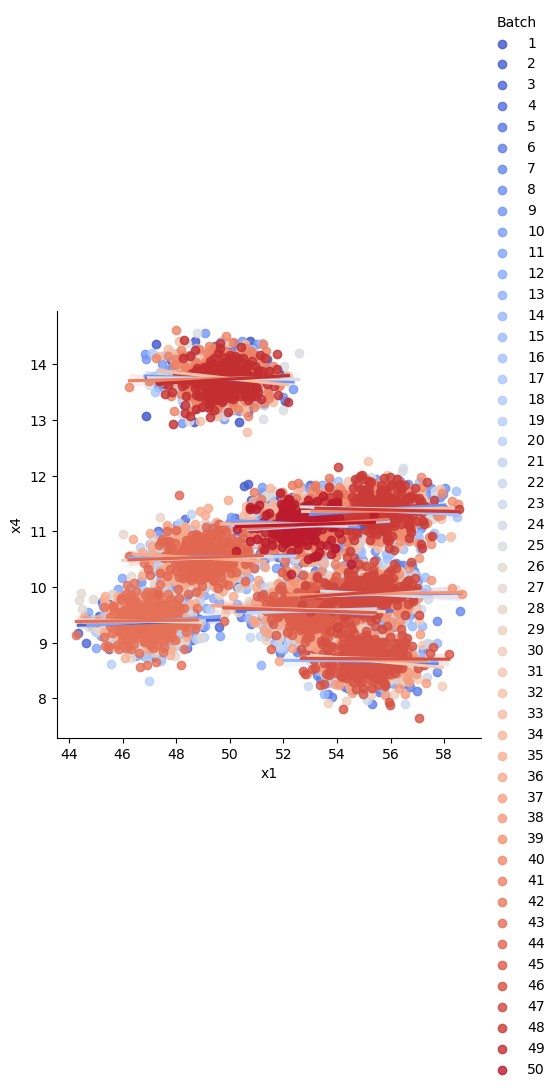

In [56]:
sns.lmplot(data=machine_df, x="x1", y="x4", hue="Batch", palette="coolwarm")
plt.show()

From the pairs plot by Batch numbers, it doesn’t look like the relationship between x1 through x4 changes across Batches. The Batch numbers are spread out pretty evenly without any clear clustering or noticeable pattern for any specific Batch.

In the trend plots between x1 and the other variables (x2-x4), I do see some clustering by Batch, and the trend lines appear similar, though with different intercepts. This could mean that the relationship itself doesn’t vary by Batch, but the baseline level might be different.

## Problem 02

The supplier batch data set file name is provided for you below. You must read in the CSV file and assign the data set to the `batch_df` object. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in the data? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:
* Do the summary statistics for `Density` depend on the `Supplier`?
* Does the average `Density` depend on the `Supplier`?
* How does `Density` relate to `Batch` for each `Supplier`?

After exploring the `batch_df` DataFrame, you **MUST** JOIN/MERGE the `batch_df` DataFrame with the `machine_df` DataFrame. Assign the merged DataFrame to the `dfa` DataFrame.

You can now explore the relationships between the MACHINE OPERATIONAL VARIABLES and the SUPPLIERS! You must use visualizations to explore the following relationships:
* Explore if the summary statistics of the 4 OPERATING VARIABLES `x1` through `x4` vary across `Batch` for each MACHINE given each `Supplier`. Your figures MUST use `Batch` as the x-axis variable.
* Explore if the relationships between the 4 OPERATING VARIABLES `x1` through `x4` vary across `Supplier`.

You may add as many markdown and code cells as you see fit to answer this question.

#### SOLUTION

In [57]:
# define the batch supplier file
batch_file = 'midterm_supplier.csv'

In [58]:
# read in the batch supplier data set
batch_df = pd.read_csv(batch_file)

#### For the Supplier DF

In [59]:
batch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Batch     50 non-null     int64  
 1   Supplier  50 non-null     object 
 2   Density   50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [60]:
batch_df.shape

(50, 3)

The Batch DataFrame has 50 records and 3 variables: 1 float, 1 integer, and 1 is an object (Supplier variable).

In [61]:
batch_df.nunique()

Batch       50
Supplier     2
Density     50
dtype: int64

In [62]:
batch_df.isna().sum()

Batch       0
Supplier    0
Density     0
dtype: int64

None of the variables are missing values.

Since the Batch variable is a category variable in the machine_df, I will also be making the Batch variable a category variable in batch_df.

In [63]:
batch_df["Batch"] = batch_df.Batch.astype("category")

##### Supplier DF Marginal Distributions for Continous Variable (Density)

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


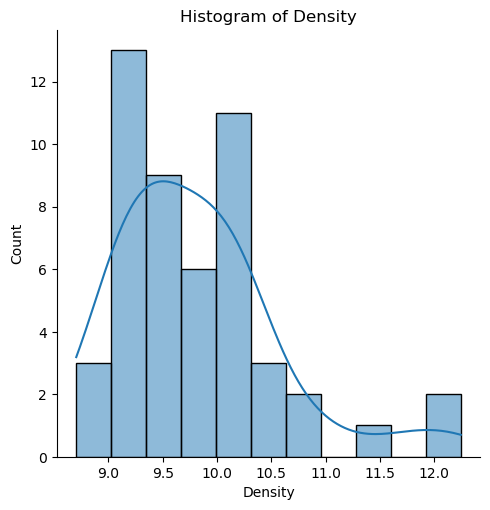

In [64]:
sns.displot(data=batch_df, x="Density", kind="hist", kde=True, bins=11)
plt.title(f"Histogram of Density")
plt.show()

##### Supplier DF Marginal Distributions for the Categorical Variable

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


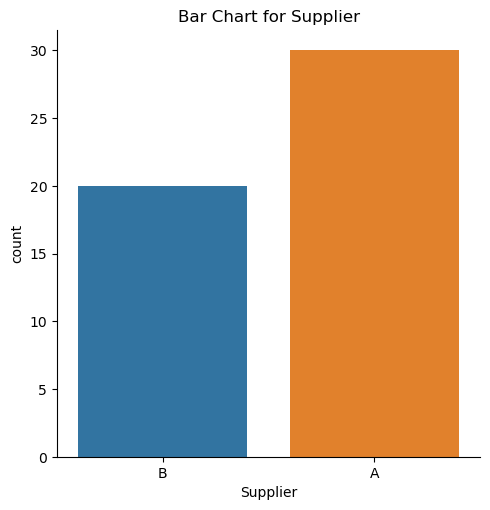

In [65]:
sns.catplot(data=batch_df, x="Supplier", hue="Supplier", kind="count")
plt.title(f"Bar Chart for Supplier") 
plt.show()

#### Do the summary statistics for Density depend on the Supplier?

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


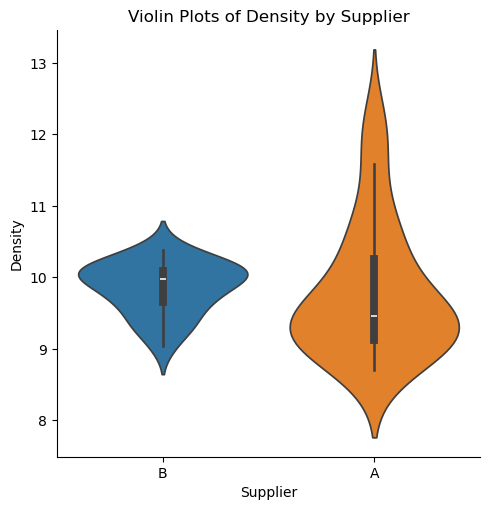

In [66]:
sns.catplot(data=batch_df, x="Supplier", y="Density", hue="Supplier", kind="violin")
plt.title("Violin Plots of Density by Supplier")

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


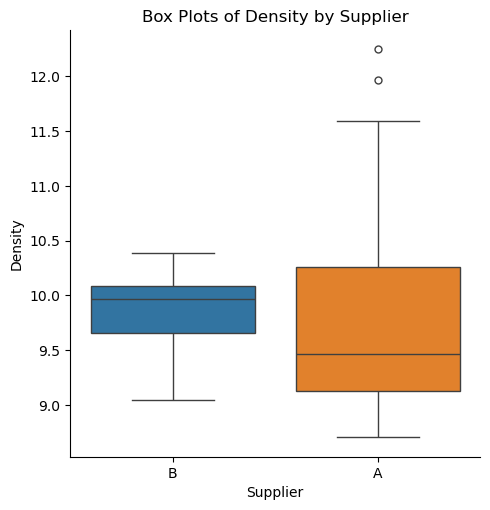

In [67]:
sns.catplot(data=batch_df, x="Supplier", y="Density", hue="Supplier", kind="box")
plt.title("Box Plots of Density by Supplier")

plt.show()

The medians don’t overlap, and the distributions in the violin plot show some slight differences.

We notice that there are significantly more lower densities (below 9) and higher densities (above 11) in the data from Supplier A. This makes me think that the summary statistics for density might depend on the Supplier. I’ll check the point plot to confirm!

#### Does the average Density depend on the Supplier?

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


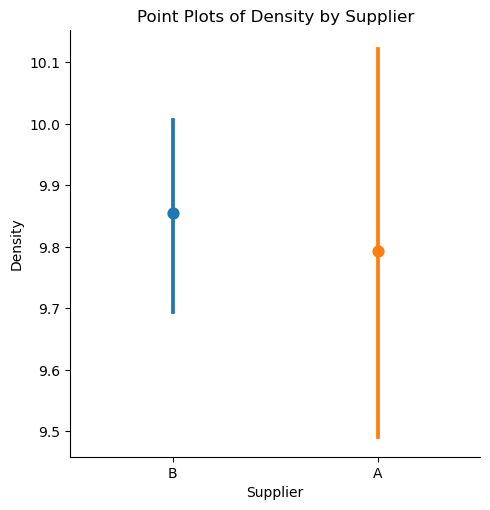

In [68]:
sns.catplot(data=batch_df, x="Supplier", y="Density", hue="Supplier", kind="point", linestyle="none")
plt.title("Point Plots of Density by Supplier")

plt.show()

When I examine the point plots, I see that the confidence intervals overlap between both Suppliers, which suggests that the means may not be statistically significantly different from each other. This indicates that the average might not depend on the Suppliers.

#### How does Density relate to Batch for each Supplier?

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


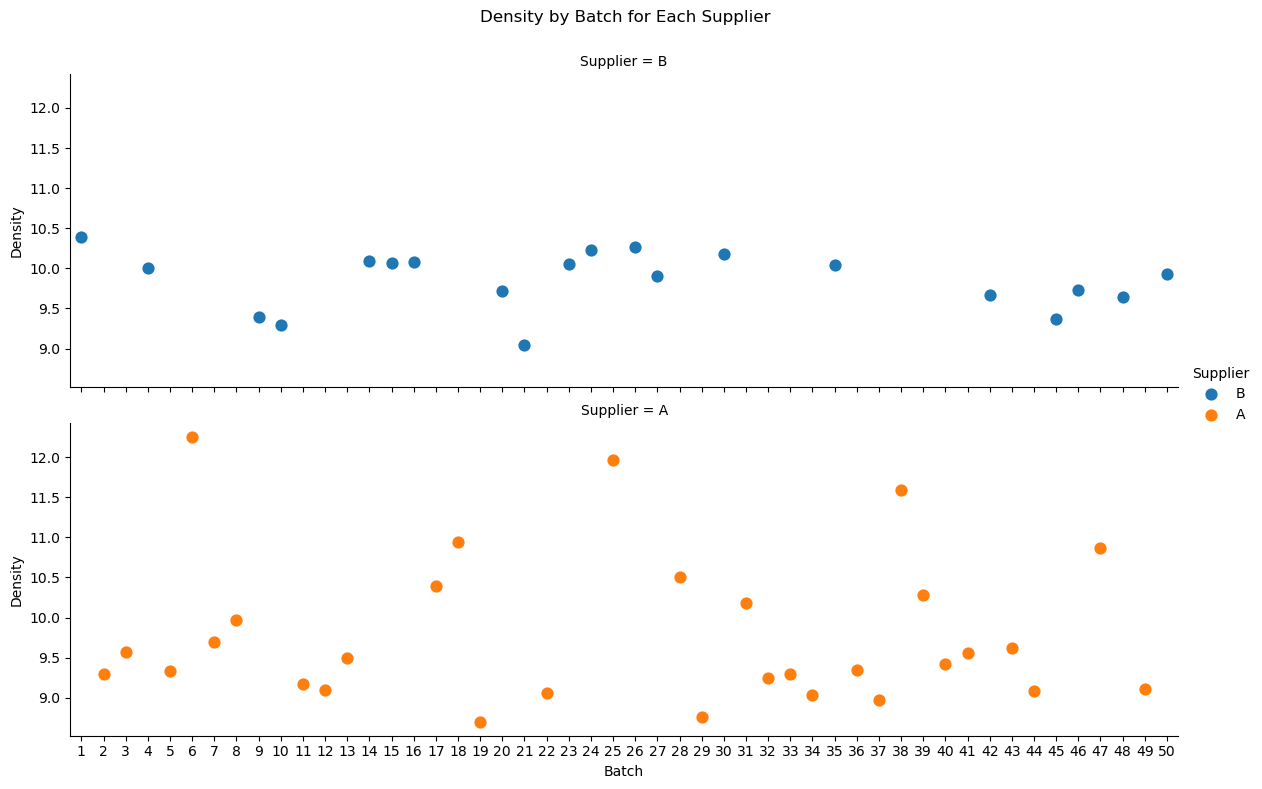

In [69]:
sns.catplot(data=batch_df, x='Batch', y='Density', row='Supplier', kind='point', hue="Supplier", height=4, aspect=3, linestyle="none")
plt.subplots_adjust(top=0.9)
plt.suptitle('Density by Batch for Each Supplier')
plt.show()

Looking at the point plot above, we can see that for Supplier B, the averages overlap around 10 for many batches. In contrast, Supplier A shows a wider range of averages, with the highest reaching over 12 for Batch number 6.

For Supplier B, the density averages appear fairly consistent, as there’s significant overlap among many of the batch averages.

For Supplier A, while some batch averages overlap between 9 and 9.5, there are also several batches with averages above 10. This suggests that the densities might differ among the batches in Supplier A.

### Merging Data

In [70]:
# merge the batch supplier data set with the (concatenated) machine data set
dfa = pd.merge(machine_df, batch_df, on="Batch", how="inner")

In [71]:
dfa

ID Batch s_id         x1          x2         x3         x4  \
0      B001-M01-S001     1    1  50.117118  102.167346  22.067812  13.889524   
1      B001-M01-S002     1    2  46.887333  112.266102  23.197330  13.064709   
2      B001-M01-S003     1    3  50.132744  103.674908  22.319933  13.647482   
3      B001-M01-S004     1    4  48.501042  107.143156  22.162947  14.077758   
4      B001-M01-S005     1    5  49.690442  102.120283  22.248696  13.728666   
...              ...   ...  ...        ...         ...        ...        ...   
14724  B050-M02-S092    50   92  52.690936   95.050804  20.324674  10.963370   
14725  B050-M02-S093    50   93  52.348015   97.863144  20.884779  11.156604   
14726  B050-M02-S094    50   94  52.187241   99.887013  20.439142  11.303222   
14727  B050-M02-S095    50   95  52.875621  101.572057  20.648029  11.084512   
14728  B050-M02-S096    50   96  52.491445   96.744458  20.814762  10.886910   

       machine_id Supplier    Density  
0               1        B  10.388587  
1               1        B  10.388587  
2               1        B  10.388587  
3               1        B  10.388587  
4               1        B  10.388587  
...           ...      ...        ...  
14724           2        B   9.935676  
14725           2        B   9.935676  
14726           2        B   9.935676  
14727           2        B   9.935676  
14728           2        B   9.935676  

[14729 rows x 10 columns]

#### Explore if the summary statistics of the 4 OPERATING VARIABLES x1 through x4 vary across Batch for each MACHINE given each Supplier. 
Your figures MUST use Batch as the x-axis variable.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


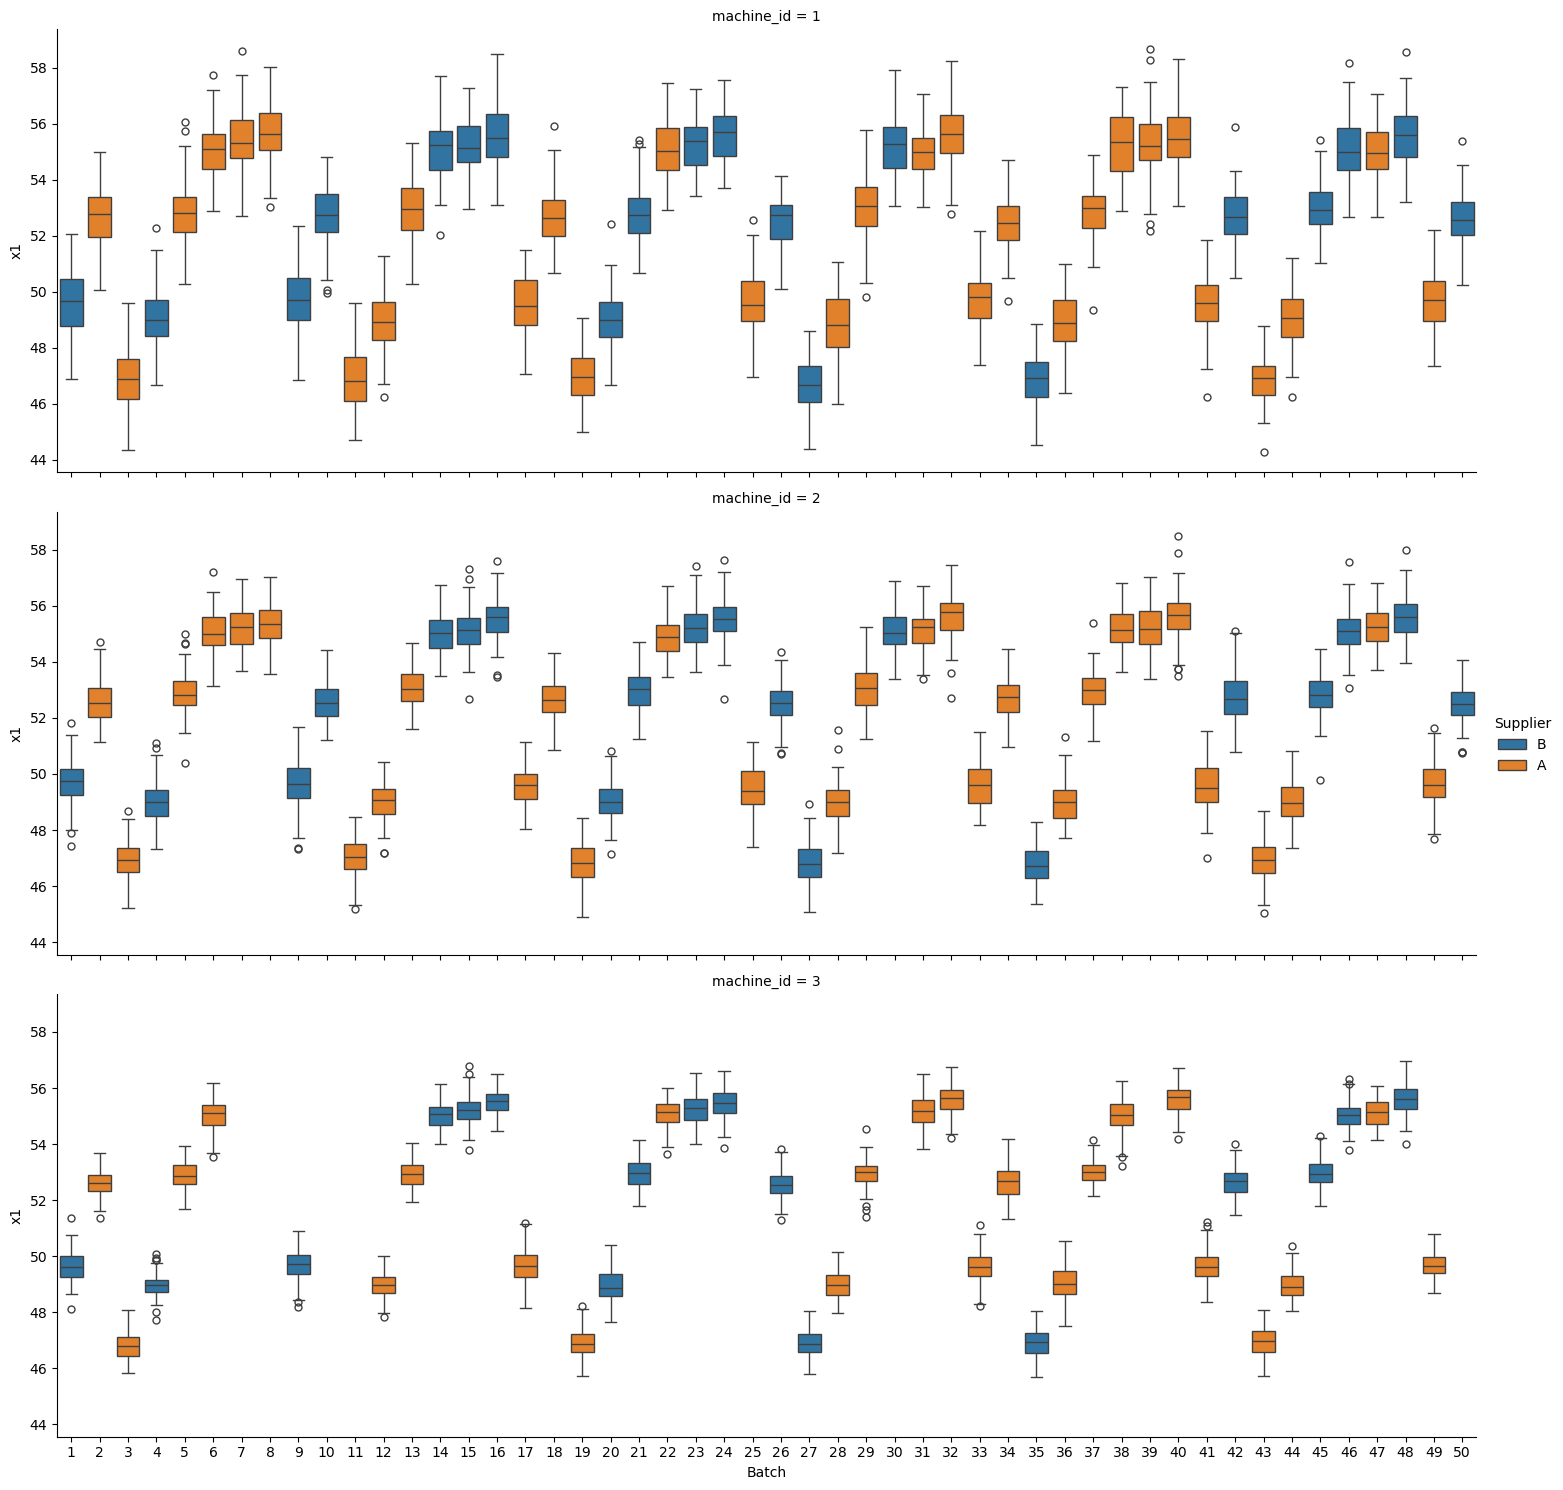

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


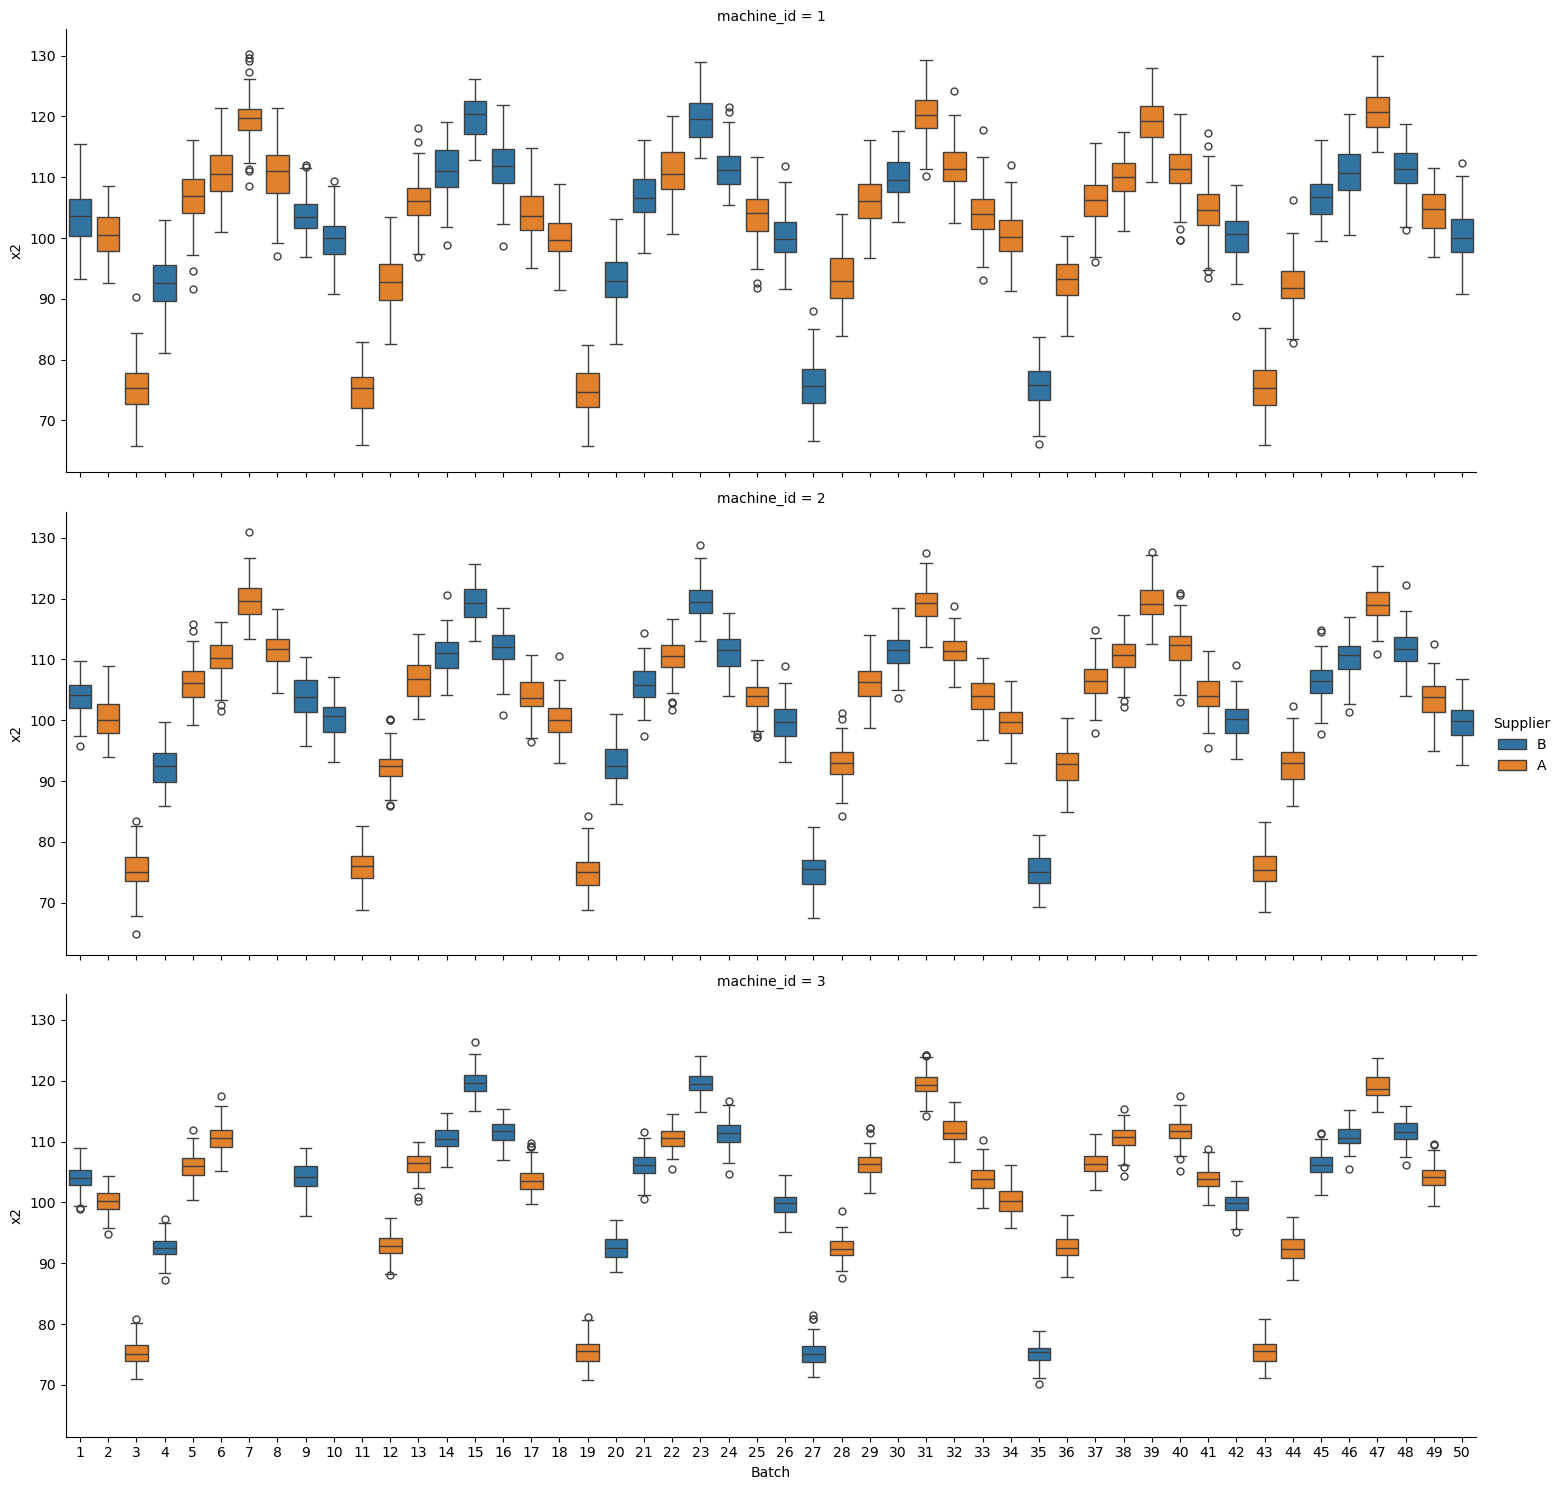

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


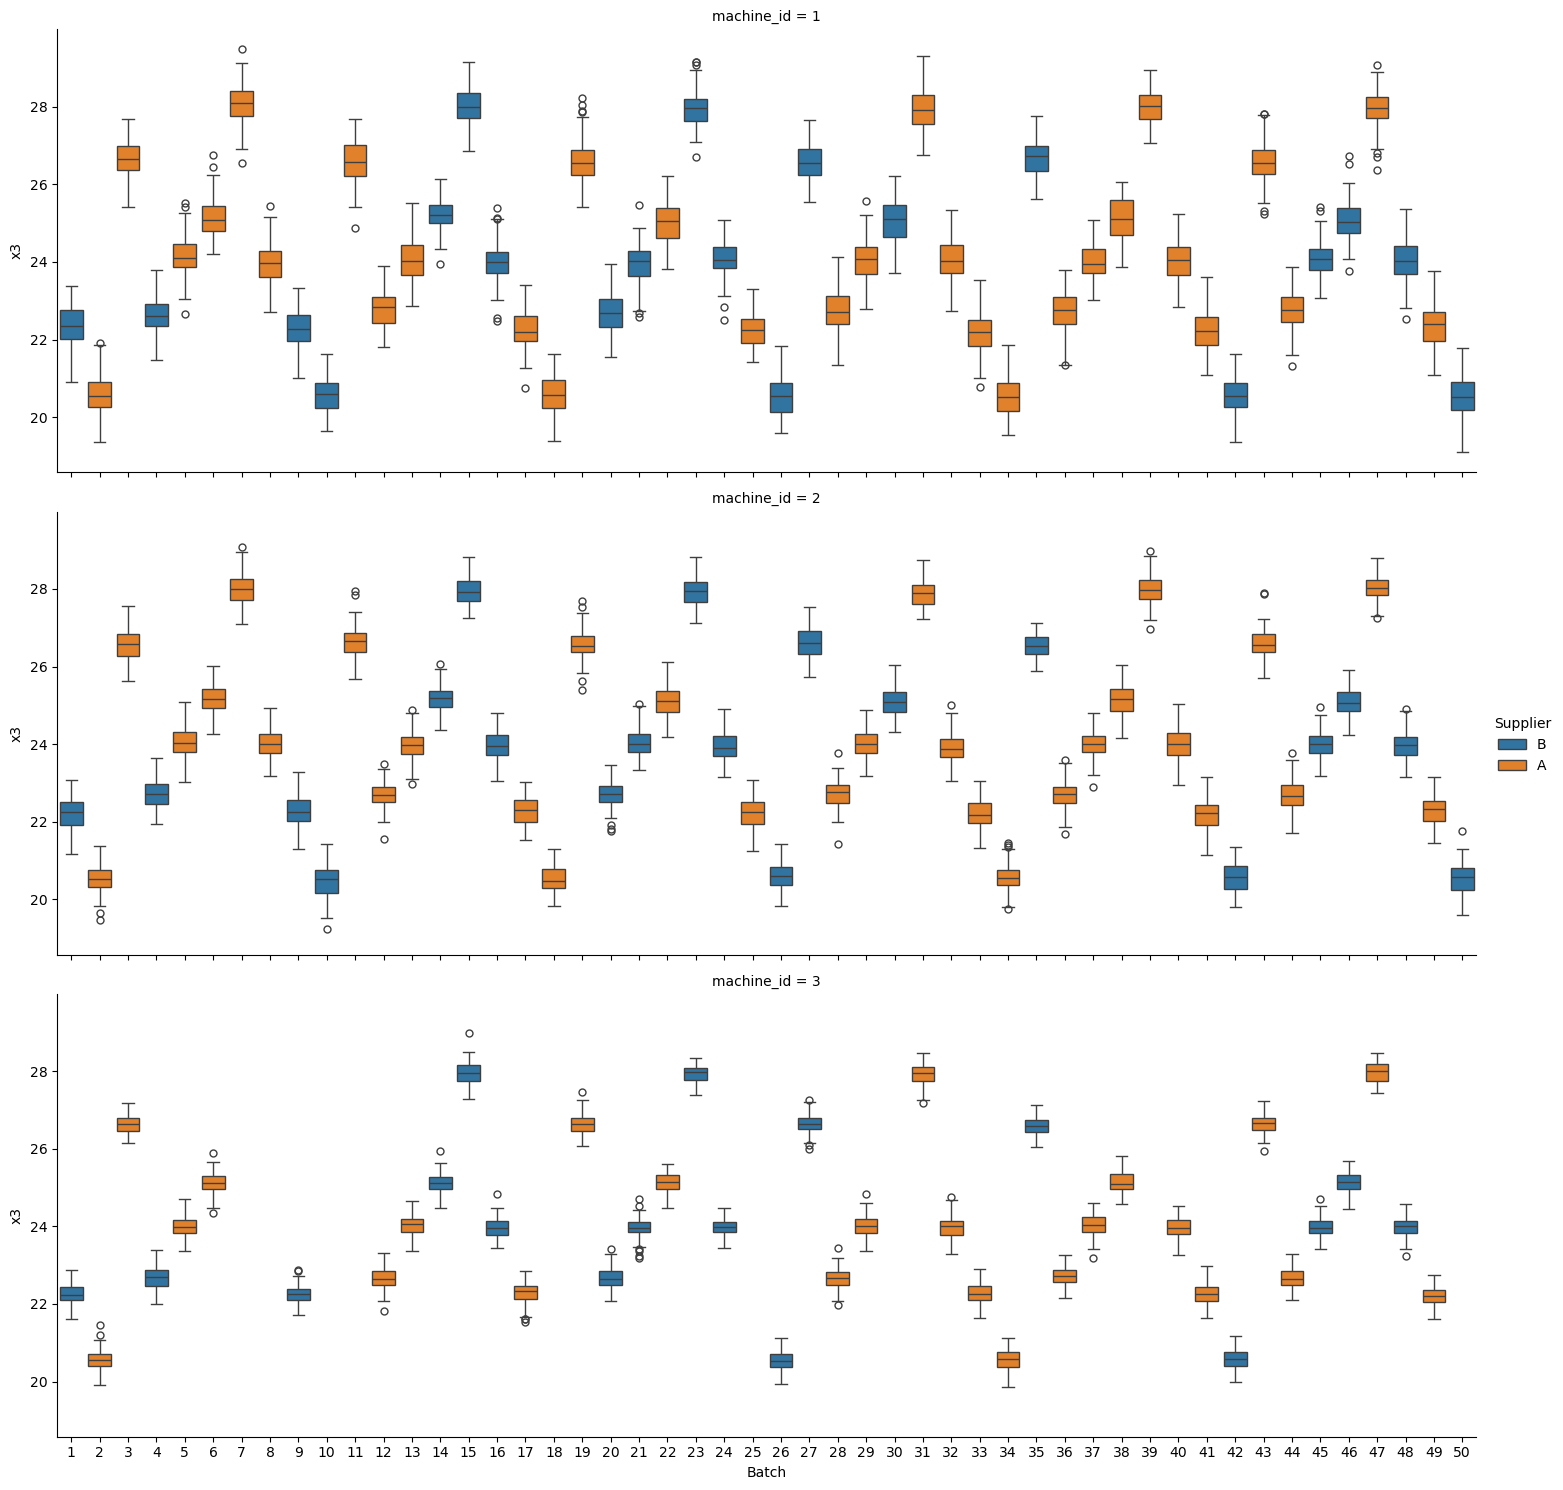

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


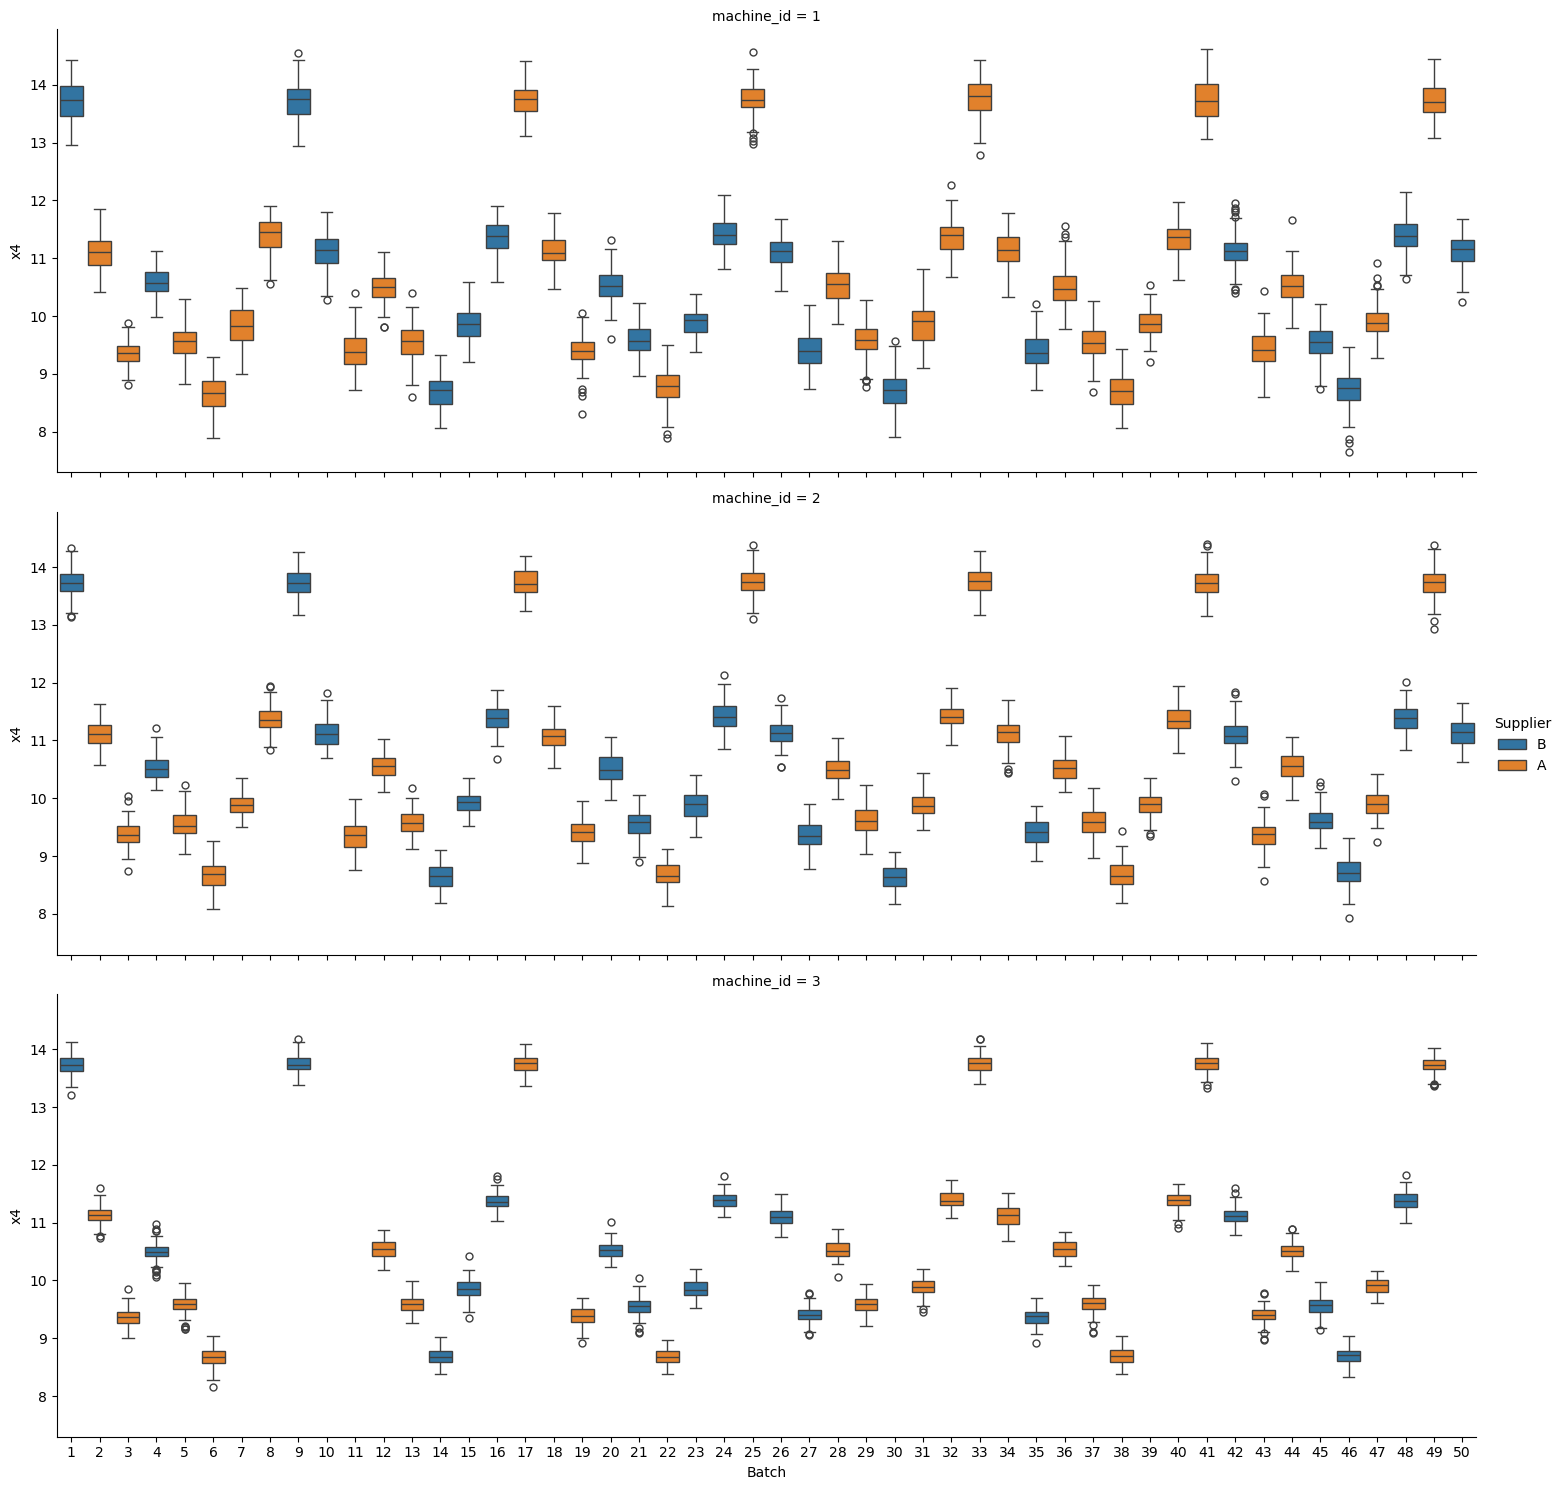

In [72]:
for var in val_vars:
    sns.catplot(data=dfa, x="Batch", y=var, hue="Supplier", row="machine_id", kind="box", aspect=3)

    plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


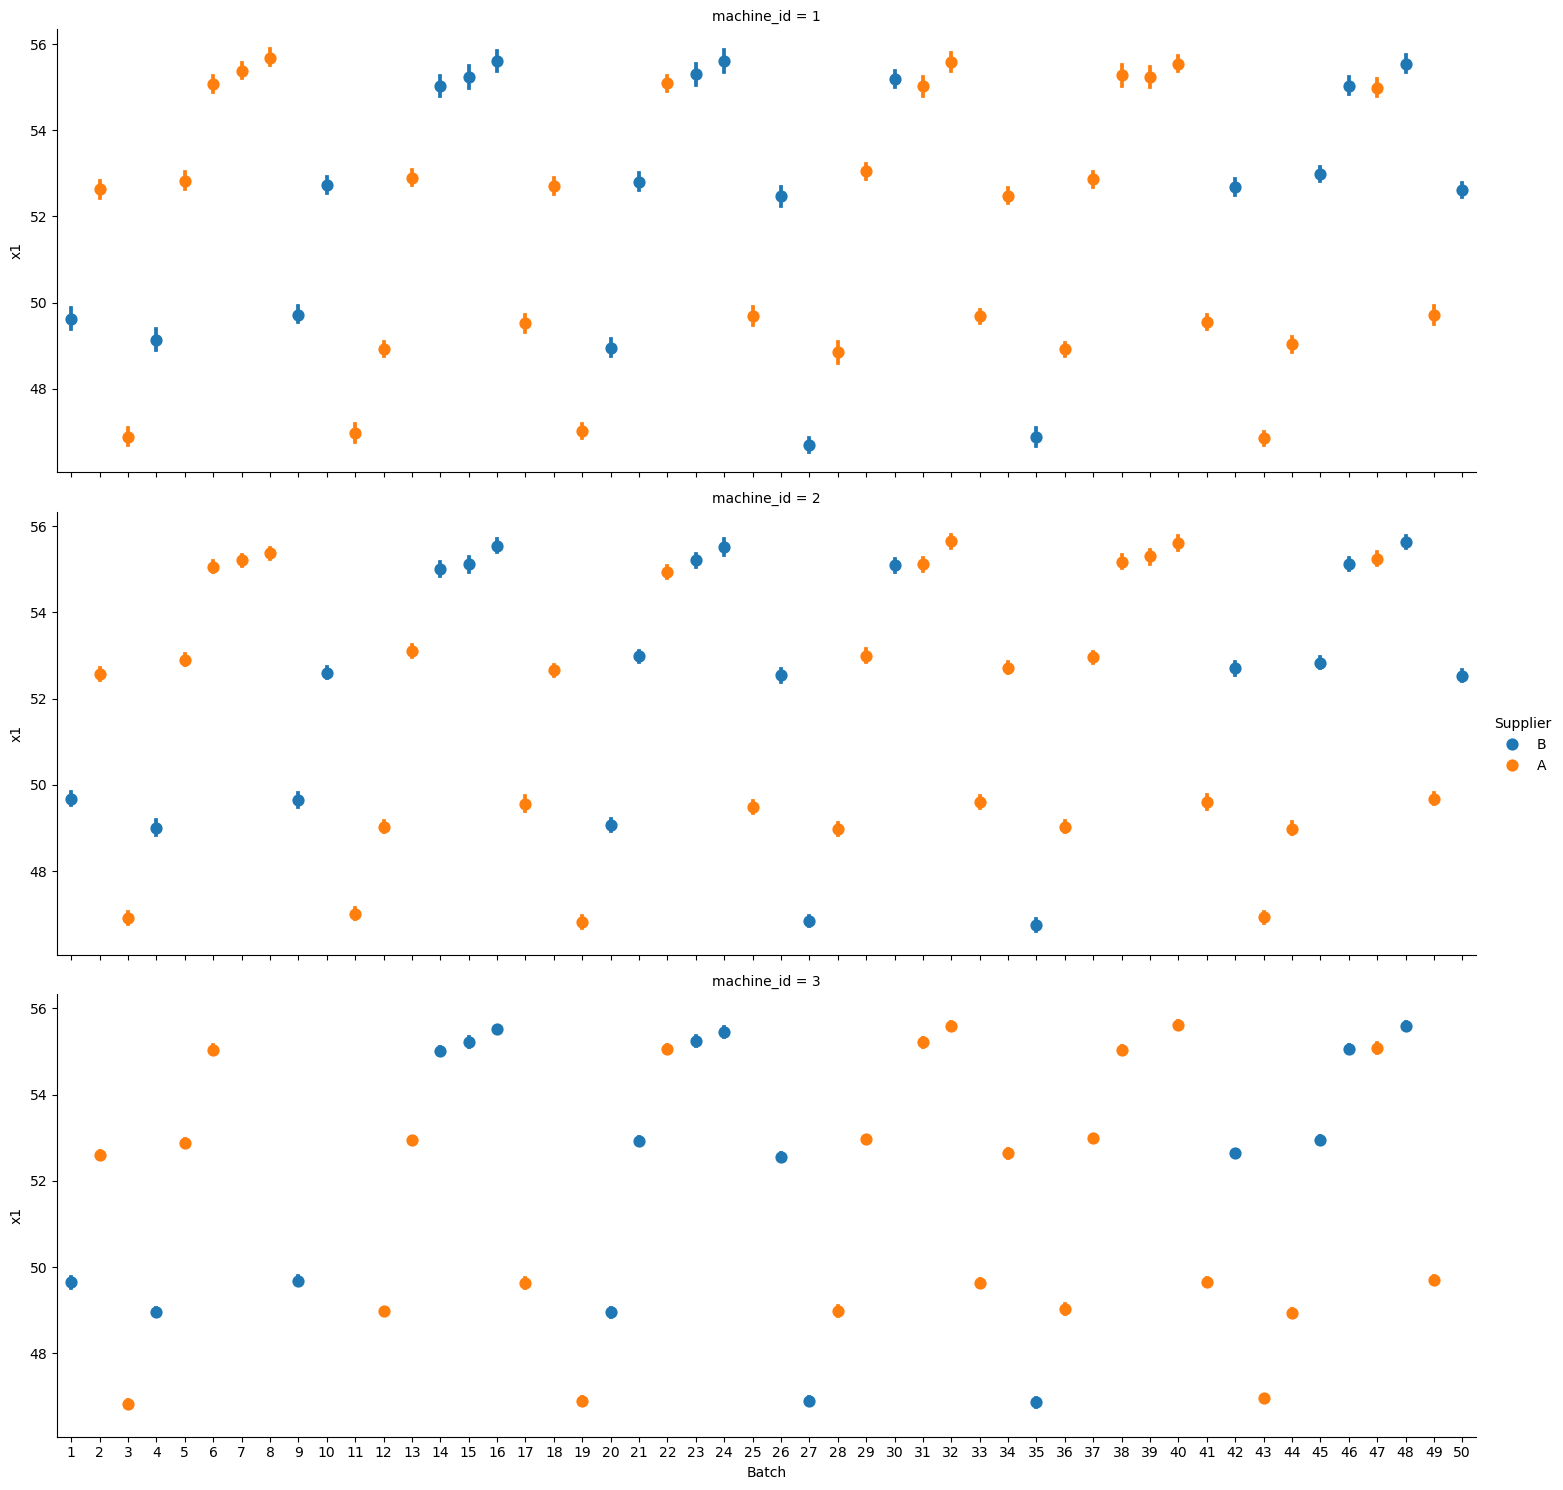

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


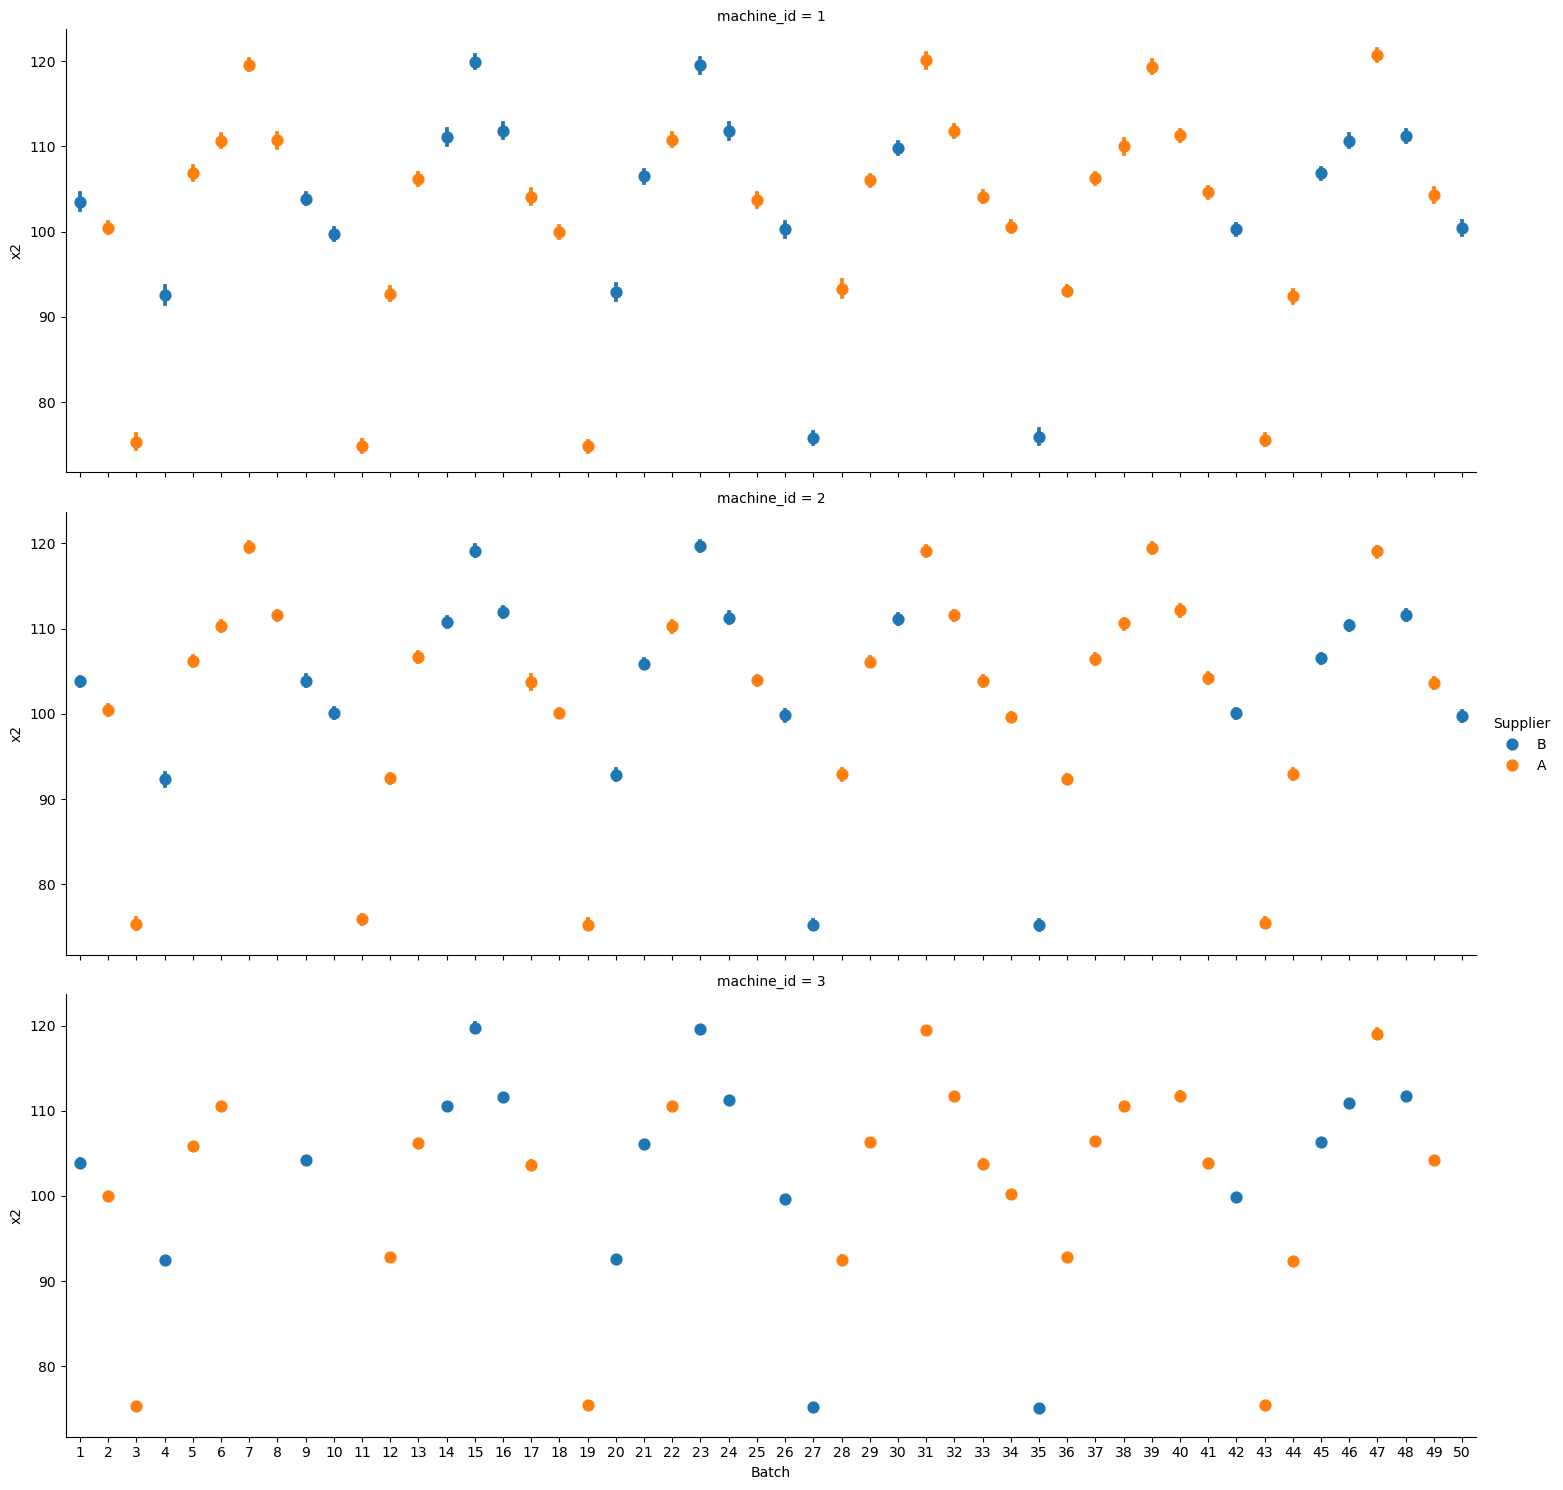

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


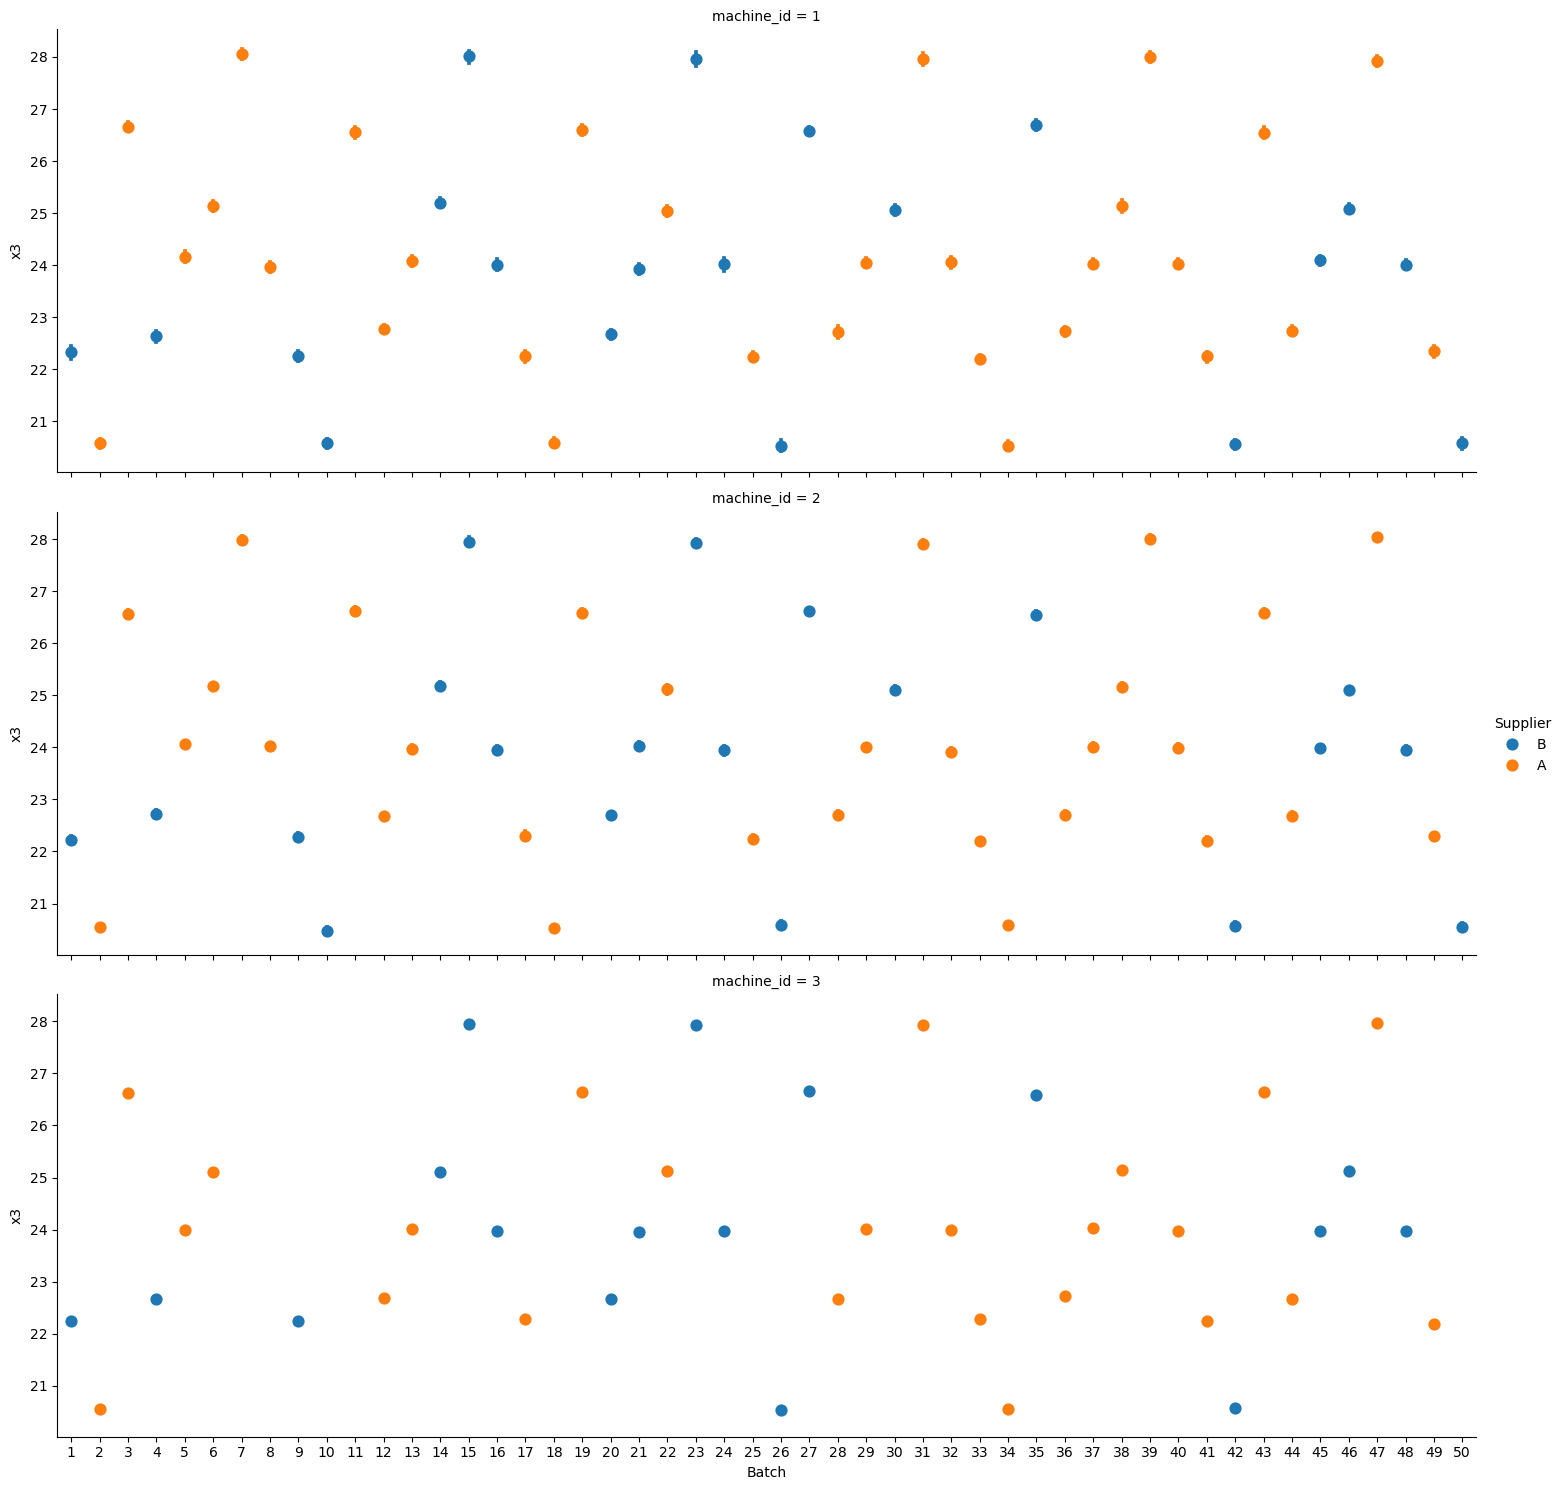

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


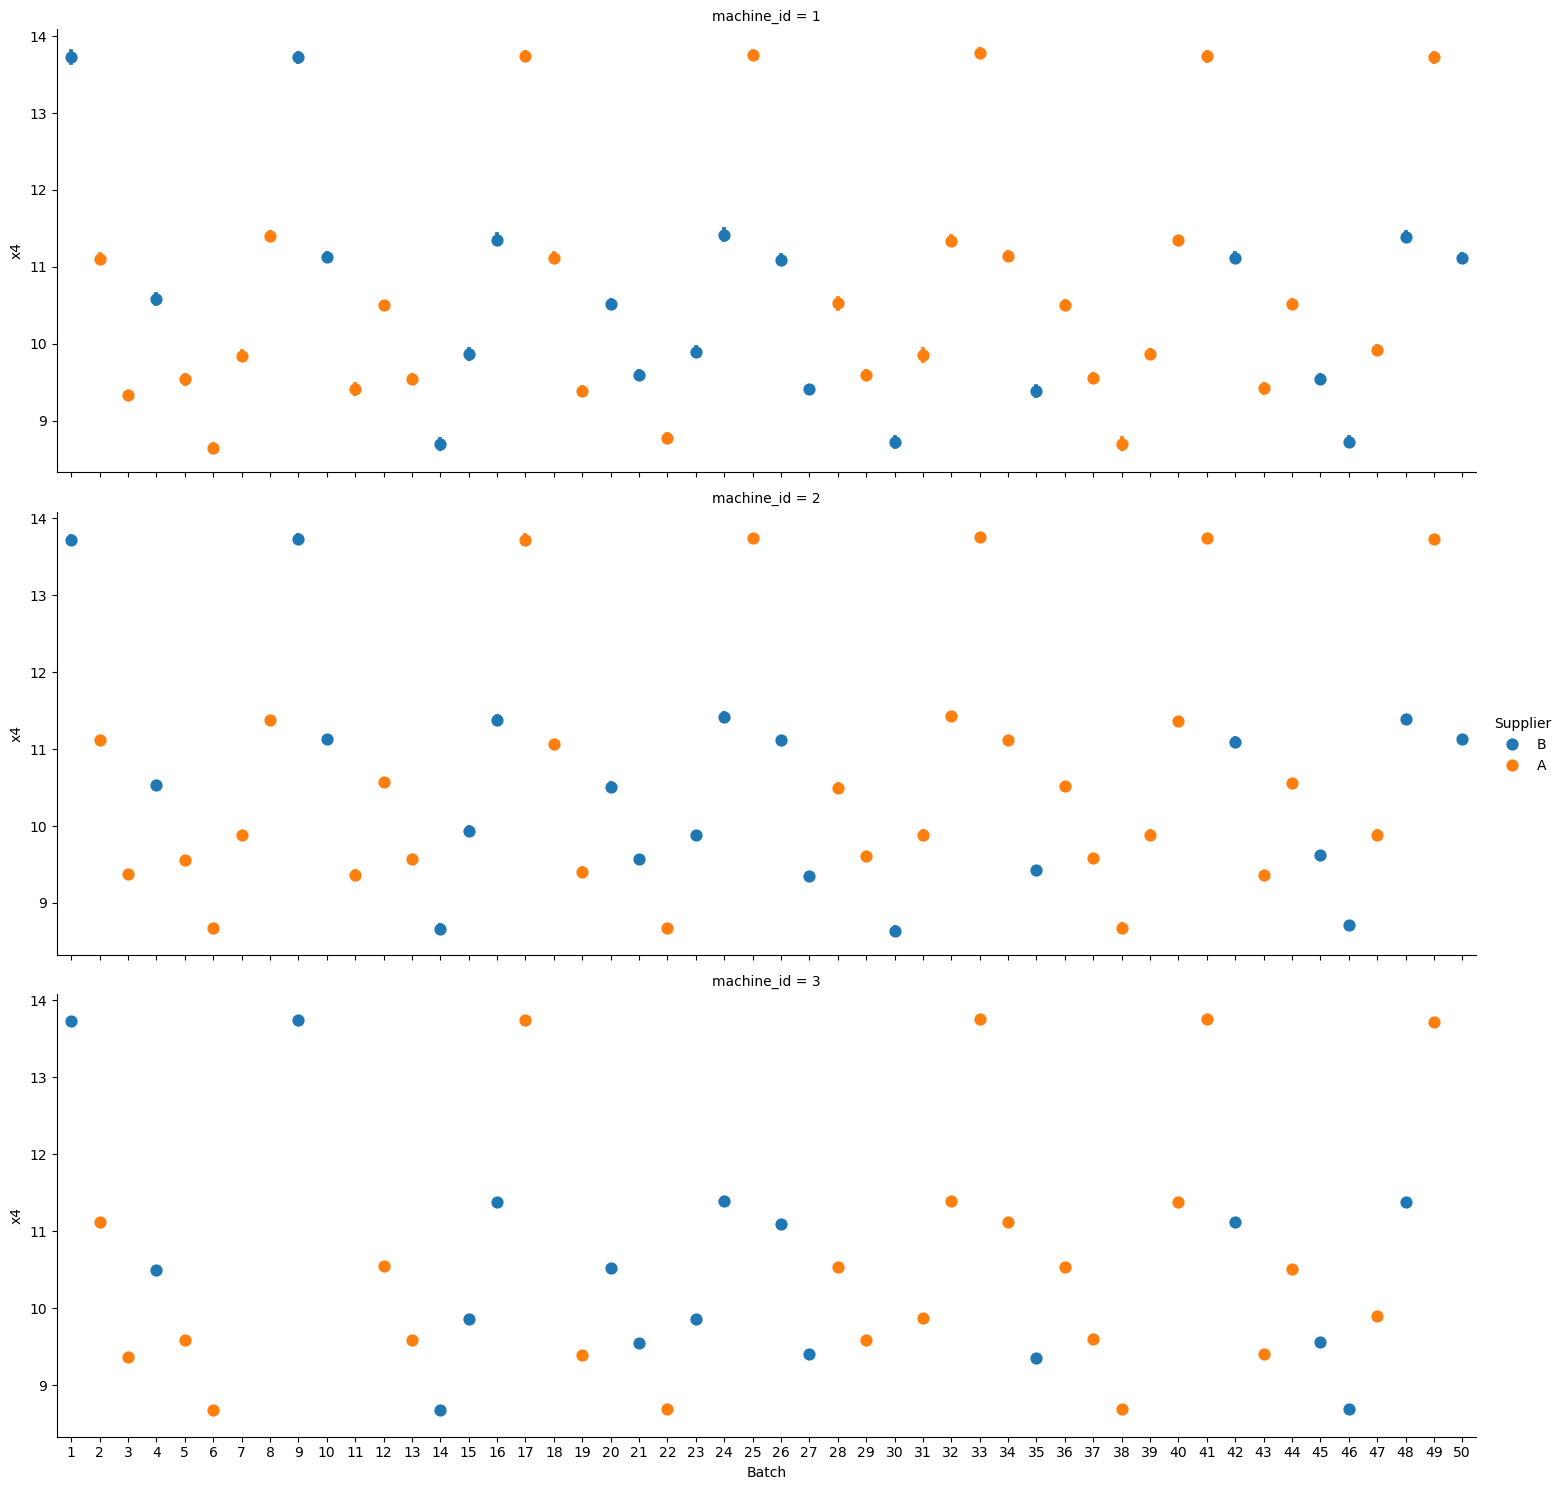

In [73]:
for var in val_vars:
    sns.catplot(data=dfa, x="Batch", y=var, hue="Supplier", row="machine_id", kind="point", aspect=3, linestyle="none")

    plt.show()

For some batches, I notice differences in the summary statistics (median and means) since some Batches don’t overlap.

One interesting observation from the boxplots and point plots is that in Machines 1 and 2, the statistics start to overlap every eight batches. For instance, in the point plot for x2 in both Machine 1 and 2, Batch 3 has a low average, but that average begins to overlap with Batch 11, and then continues to do so with Batches 19, 27, 35, and 43. These batch averages overlap, and each one is eight batches apart.

I believe this pattern holds for all variables (x1 through x4) in Machines 1 and 2.

Additionally, I notice that certain patterns repeat, and I can definitely see an upside-down V shape occurring multiple times.

#### Explore if the relationships between the 4 OPERATING VARIABLES x1 through x4 vary across Supplier.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


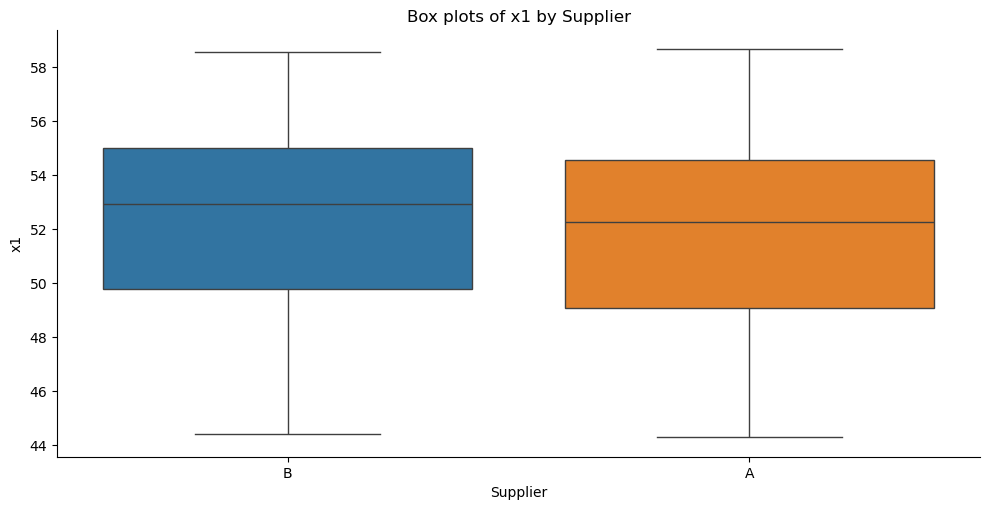

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


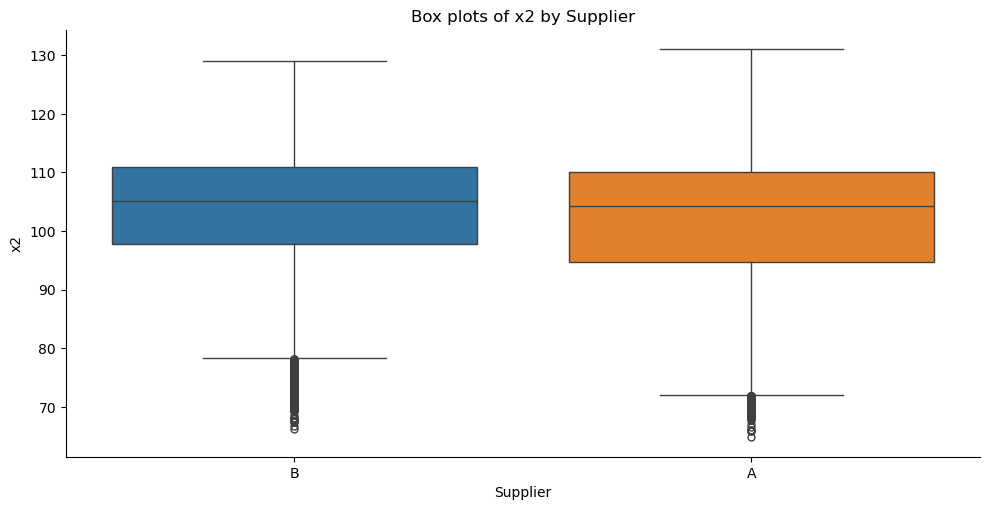

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


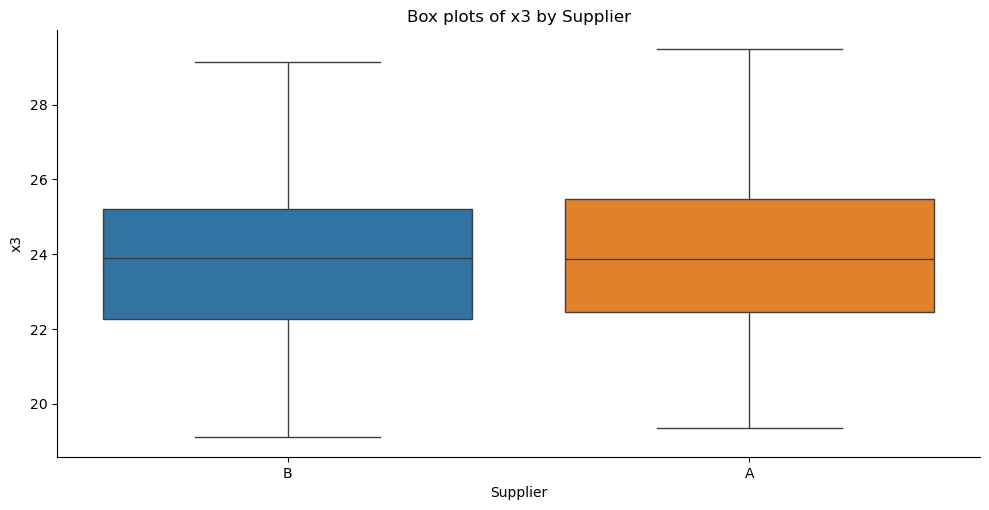

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


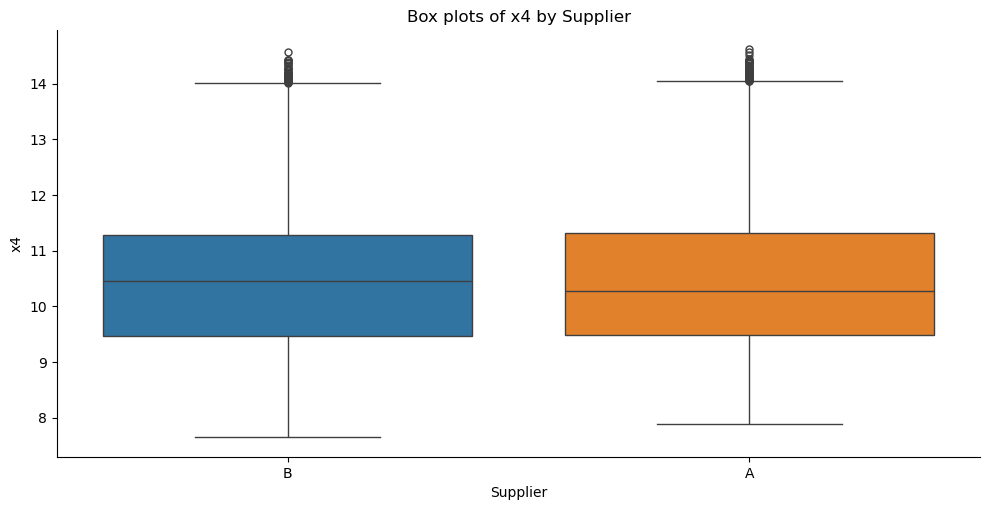

In [74]:
for var in val_vars:
    sns.catplot(data=dfa, x="Supplier", y=var, hue="Supplier", kind="box", aspect=2)
    plt.title(f"Box plots of {var} by Supplier")

    plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


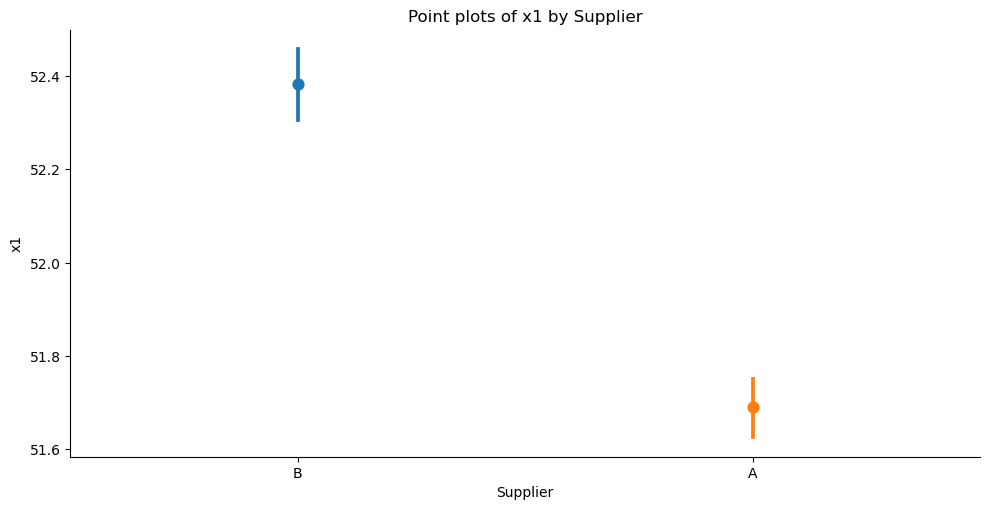

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


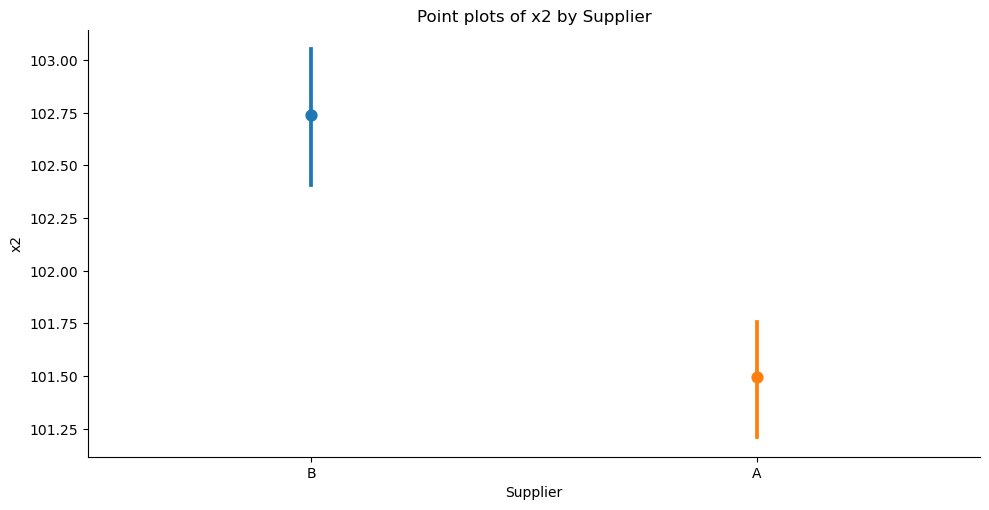

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


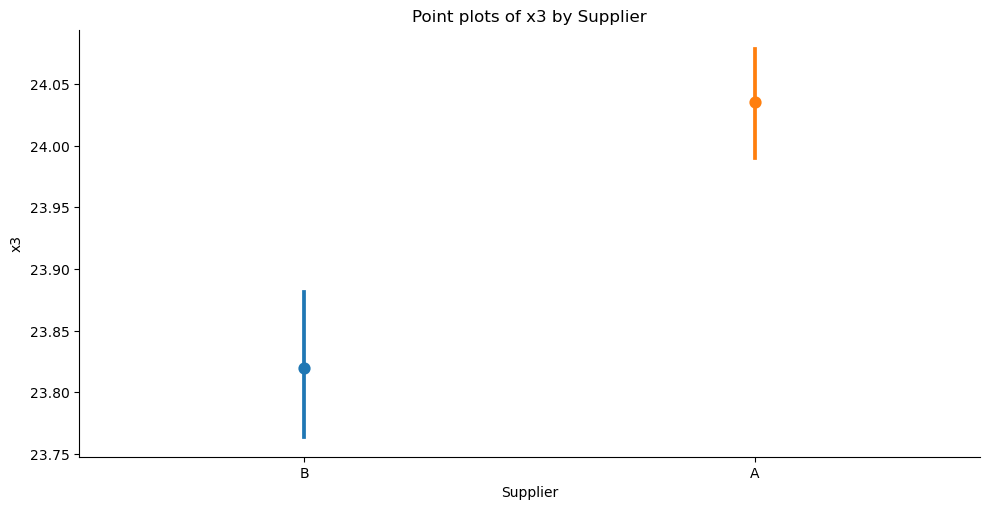

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


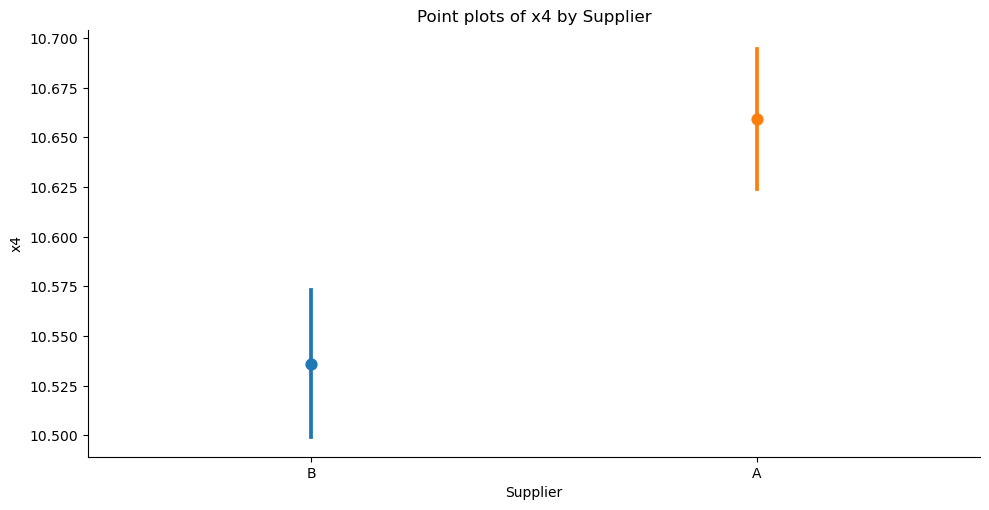

In [75]:
for var in val_vars:
    sns.catplot(data=dfa, x="Supplier", y=var, hue="Supplier", kind="point", aspect=2)
    plt.title(f"Point plots of {var} by Supplier")

    plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


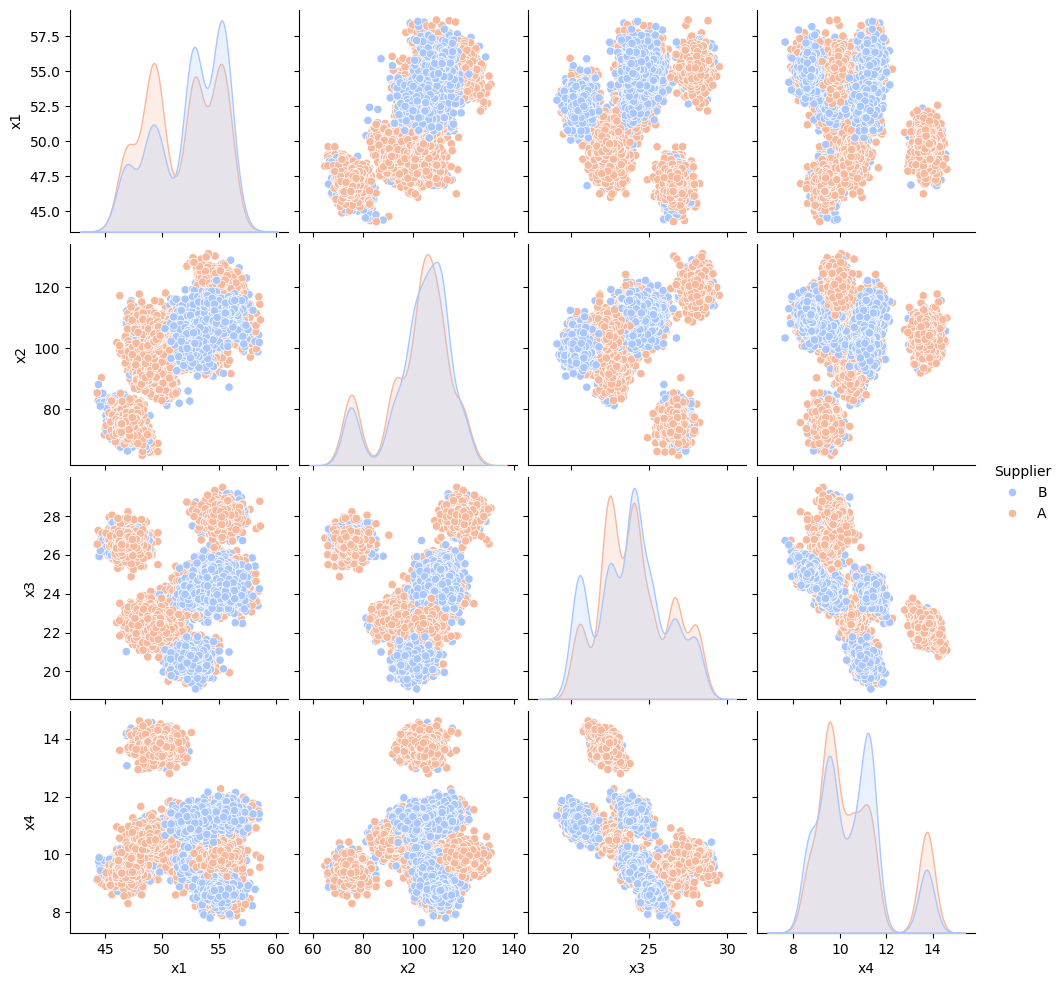

In [76]:
sns.pairplot(data=dfa.loc[:,["Supplier", "x1", "x2", "x3", "x4"]], hue="Supplier", diag_kws={"common_norm": False}, palette="coolwarm")
plt.show()

I believe that x1 through x4 vary across Suppliers.

In the boxplots, we see that while the boxes overlap, the point plots show that the averages and confidence intervals never overlap between Supplier groups for any of the variables.

Finally, the pairplots reveal clustering of the Supplier groups in each scatterplot comparing two variables.

For instance, when comparing x1 to x2, Supplier A is clustered at lower x1 values, while Supplier B is clustered at higher x1 values. Similarly, when comparing x4 to x2, we find that higher x4 values are only present in the Supplier A group.

## Problem 03

The DROP TEST result data set file name is provided for you below. You must read in the CSV file and assign the dta set to the `test_df` object. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in the data? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:
* Count the number of times each unique value of `Result` occurs for each `test_group_id` value.

After exploring the `test_df` DataFrame, you **MUST** JOIN/MERGE the `test_df` DataFrame with the `dfa` DataFrame. Assign the merged DataFrame to the `dfb` DataFrame. You **MUST** answer the following:
* How many rows remain using the DEFAULT joining procedure?

You may add as many markdown and code cells as you see fit to answer this question. 

#### SOLUTION

In [77]:
# define the test data set file name
test_file = 'midterm_test.csv'

In [78]:
# read in the test data set
test_df = pd.read_csv(test_file)

#### For the Test DF

In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1412 non-null   object
 1   test_group_id  1412 non-null   object
 2   Result         1412 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ KB


In [80]:
test_df.shape

(1412, 3)

The Test DataFrame has 1412 records and 3 variables: 1 integer, and 2 object variables (ID and test_group_id).

In [81]:
test_df.nunique()

ID               1412
test_group_id     141
Result              2
dtype: int64

In [82]:
test_df.isna().sum()

ID               0
test_group_id    0
Result           0
dtype: int64

None of the variables are missing values.

In [83]:
test_df.dtypes

ID               object
test_group_id    object
Result            int64
dtype: object

In [84]:
test_df

ID test_group_id  Result
0     B001-M01-S056           A-0       1
1     B001-M01-S002           A-0       1
2     B001-M01-S049           A-0       1
3     B001-M01-S030           A-0       0
4     B001-M01-S048           A-0       1
...             ...           ...     ...
1407  B049-M03-S026           K-5       1
1408  B049-M03-S008           K-5       1
1409  B049-M03-S041           K-5       1
1410  B049-M03-S061           K-5       1
1411  B049-M03-S051           K-5       1

[1412 rows x 3 columns]

##### Test DF Marginal Distributions for the Result variables

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


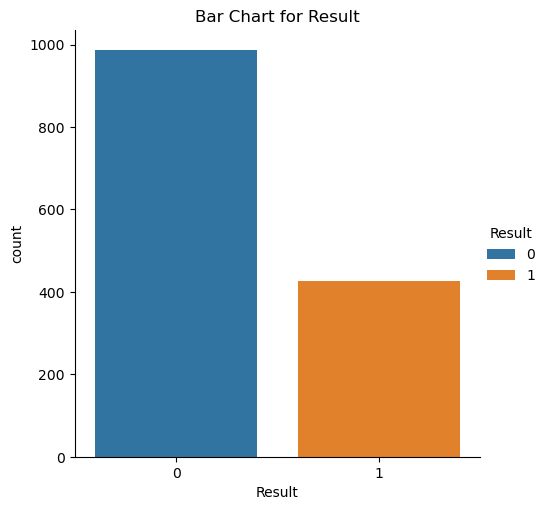

In [85]:
sns.catplot(data=test_df, x="Result", hue="Result", kind="count")
plt.title(f"Bar Chart for Result")
plt.show()

I did not do any marginal distribution visualizations for the ID or the test_group_id variables because they are object variables but they have over 140 unique values, which would be too much to display.

#### Count the number of times each unique value of Result occurs for each test_group_id value.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


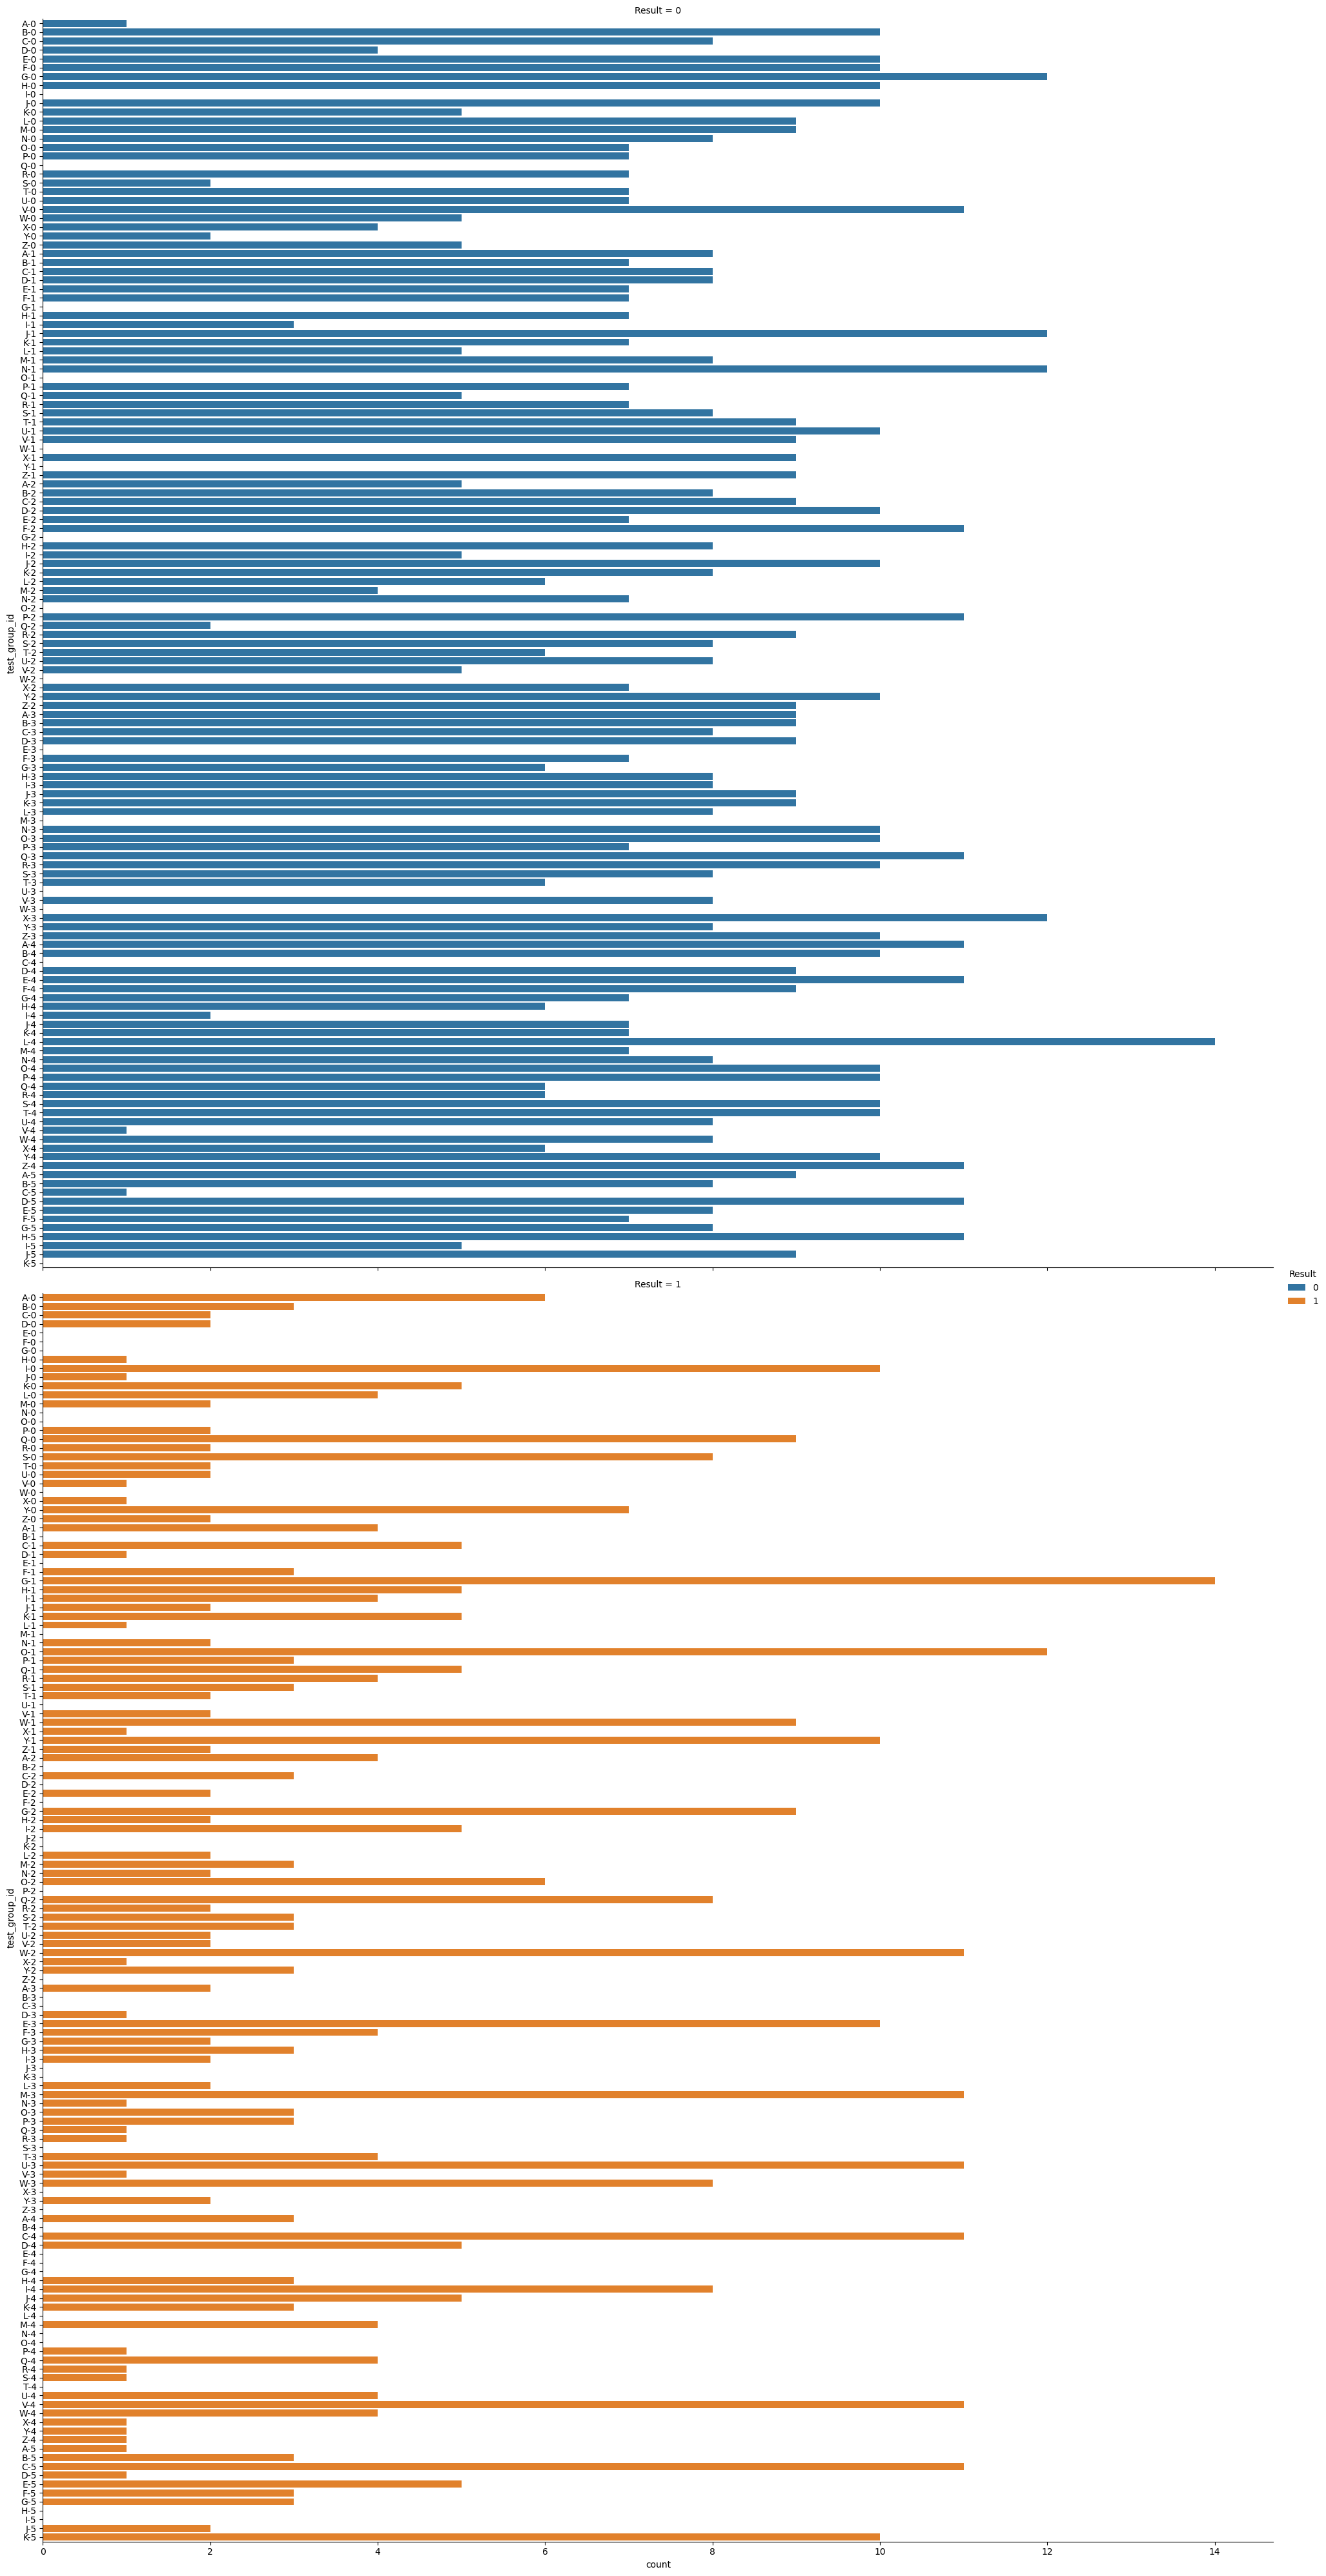

In [86]:
sns.catplot(data=test_df, y="test_group_id", row="Result", hue="Result", kind="count", height=20)

plt.show()

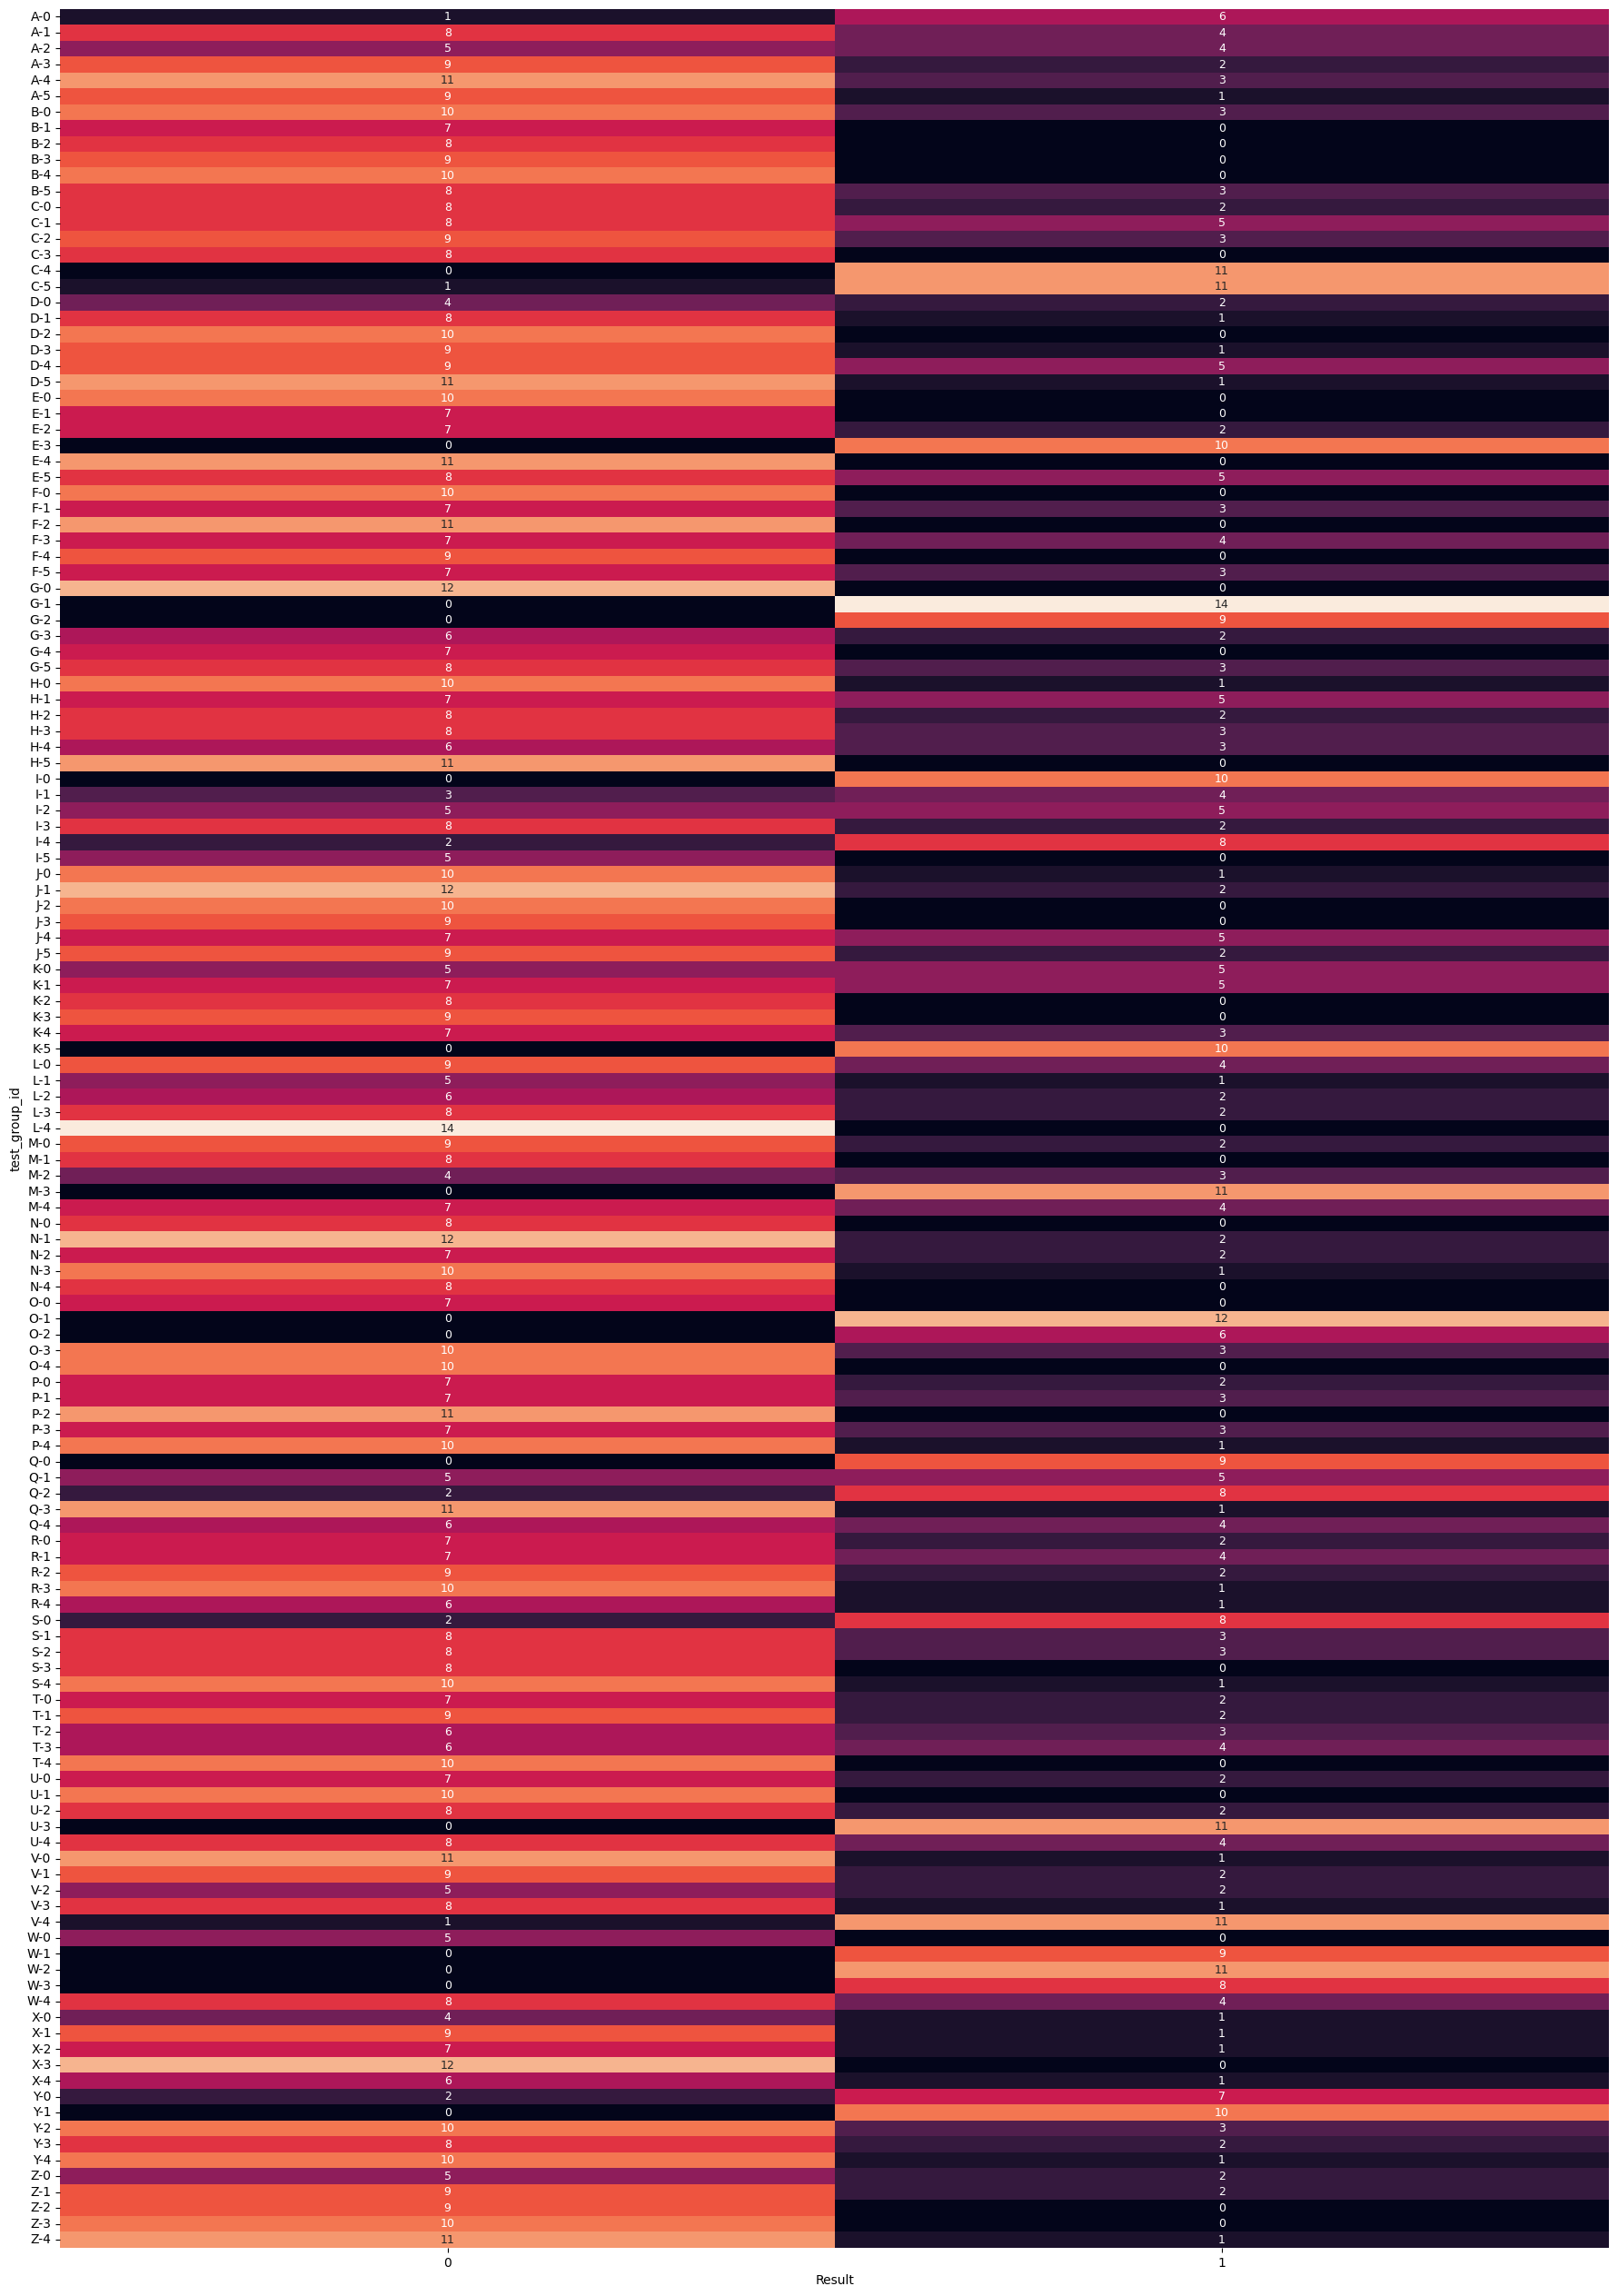

In [87]:
fig, ax = plt.subplots(figsize=(22,32))

sns.heatmap(data=pd.crosstab(test_df.test_group_id, test_df.Result), 
            annot=True,
            annot_kws={"size":9},
            cbar=False,
            ax=ax)

plt.show()

From the heatmap above, we see that a lot of the test_group_ids passed more than they failed. 

In [88]:
# merge test_df with the dfa object
dfb = pd.merge(dfa, test_df, on="ID")

In [89]:
dfb

ID Batch s_id         x1          x2         x3         x4  \
0     B001-M01-S002     1    2  46.887333  112.266102  23.197330  13.064709   
1     B001-M01-S024     1   24  51.531574  100.207219  22.281345  13.796810   
2     B001-M01-S030     1   30  48.306819  109.445722  22.910858  13.839830   
3     B001-M01-S038     1   38  52.058573   93.272568  21.937216  13.332882   
4     B001-M01-S048     1   48  50.564504  109.184587  22.083064  13.954942   
...             ...   ...  ...        ...         ...        ...        ...   
1407  B050-M02-S033    50   33  52.139310  101.869648  20.802603  10.803831   
1408  B050-M02-S064    50   64  52.048377   98.445039  21.305935  11.142095   
1409  B050-M02-S065    50   65  52.116809  101.042307  20.695658  11.051621   
1410  B050-M02-S073    50   73  52.484297  101.426409  20.506720  11.032949   
1411  B050-M02-S092    50   92  52.690936   95.050804  20.324674  10.963370   

      machine_id Supplier    Density test_group_id  Result  
0              1        B  10.388587           A-0       1  
1              1        B  10.388587           A-0       1  
2              1        B  10.388587           A-0       0  
3              1        B  10.388587           A-0       1  
4              1        B  10.388587           A-0       1  
...          ...      ...        ...           ...     ...  
1407           2        B   9.935676           V-3       1  
1408           2        B   9.935676           V-3       0  
1409           2        B   9.935676           V-3       0  
1410           2        B   9.935676           V-3       0  
1411           2        B   9.935676           V-3       0  

[1412 rows x 12 columns]

The dfa dataframe has 14729 rows and the test_df has 1412 rows.

After merging dfa and test_df, there are now only 1412 rows. I used the default joining method, which is INNER JOIN.

## Problem 04

You must now examine the merged `dfb` object and answer the following:

* Count the number of times each unique value of `Result` occurs for each value of `machine_id`.
* Count the number of times each unique value of `Result` occurs for each value of `Supplier`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id` and `Supplier`.
* Calculate the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id`.
* Visualize the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id` and for each unique value of `Supplier`.

*HINT*: Remember that a FAILED test is encoded as `Result == 1`. How can you calculate the PROPORTION of times `Result == 1`?

Add as many cells as you see fit to answer this question.

#### SOLUTION

#### Count the number of times each unique value of `Result` occurs for each value of `machine_id`.

In [90]:
res_mach = dfb.groupby(["machine_id", "Result"]).aggregate(Count=("Result", "count")).reset_index()

In [91]:
res_mach

machine_id  Result  Count
0           1       0    333
1           1       1    159
2           2       0    342
3           2       1    147
4           3       0    311
5           3       1    120

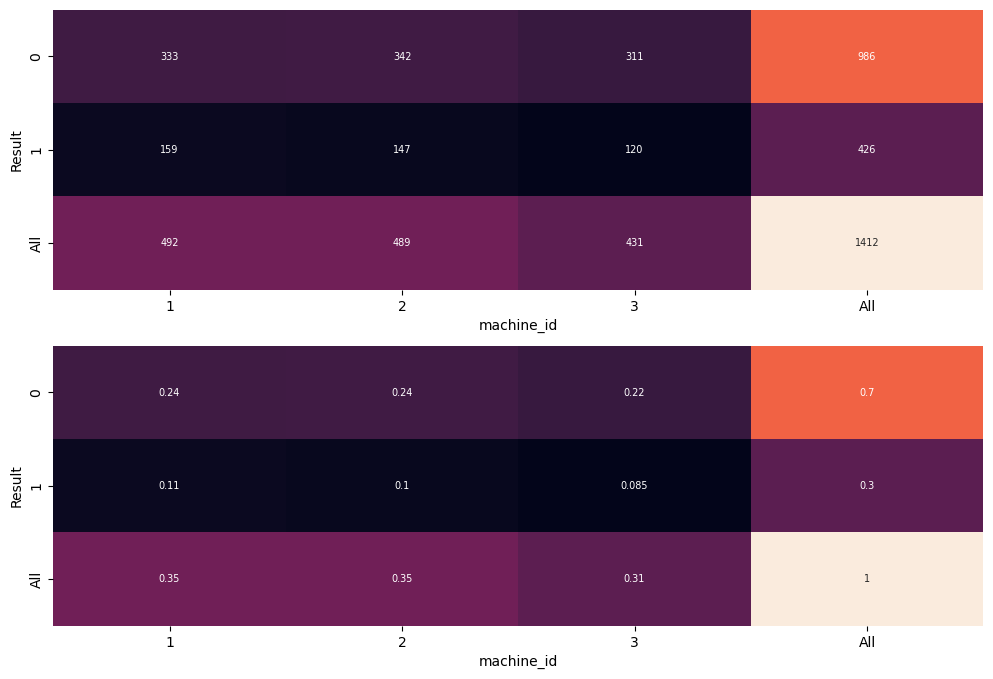

In [92]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

sns.heatmap(data=pd.crosstab(dfb.Result, dfb.machine_id, margins=True),
            annot=True,
            annot_kws={"size":7},
            fmt="d",
            cbar=False,
            ax=ax[0])

sns.heatmap(data=pd.crosstab(dfb.Result, dfb.machine_id, normalize=True, margins=True),
            annot=True,
            annot_kws={"size":7},
            cbar=False,
            ax=ax[1])

plt.show()

Out of the 986 cell phones that passed the drop test (Results=0), they are nearly evenly distributed across the three machines, with each machine having around 311 to 333 phones.

For the 426 cell phones that failed the drop test (Results=1), they are also fairly evenly spread across the machines, with approximately 120 to 160 phones per machine.

Overall, all three machines had a higher number of cell phones that passed the drop test compared to those that failed.

#### Count the number of times each unique value of `Result` occurs for each value of `Supplier`.

In [93]:
res_sup = dfb.groupby(["Supplier", "Result"]).aggregate(Count=("Result", "count")).reset_index()

In [94]:
res_sup

Supplier  Result  Count
0        A       0    588
1        A       1    290
2        B       0    398
3        B       1    136

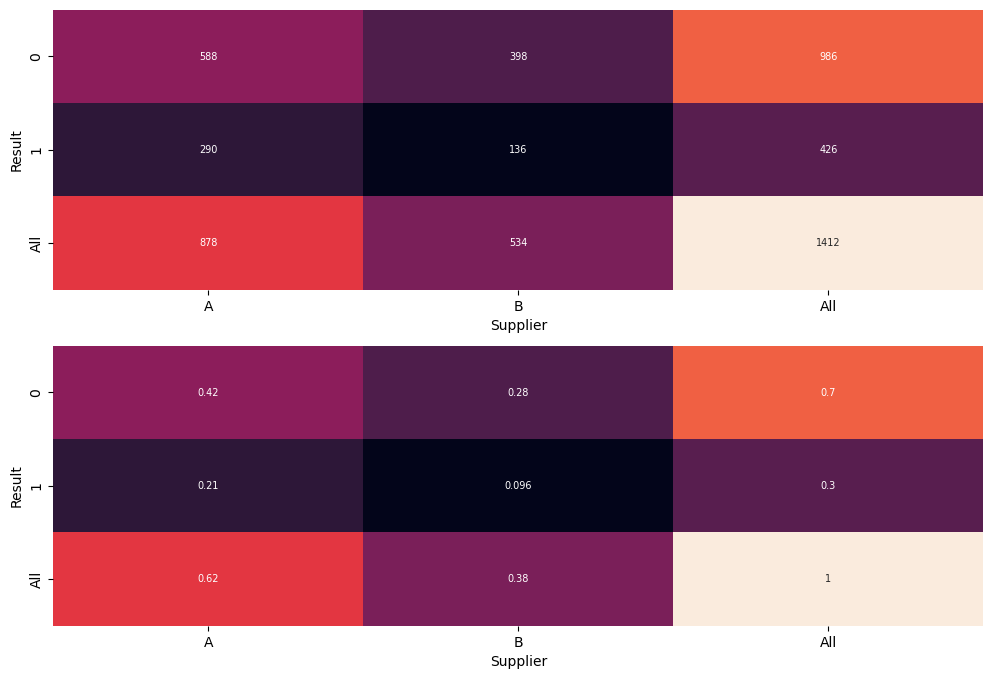

In [95]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

sns.heatmap(data=pd.crosstab(dfb.Result, dfb.Supplier, margins=True),
            annot=True,
            annot_kws={"size":7},
            fmt="d",
            cbar=False,
            ax=ax[0])

sns.heatmap(data=pd.crosstab(dfb.Result, dfb.Supplier, normalize=True, margins=True),
            annot=True,
            annot_kws={"size":7},
            cbar=False,
            ax=ax[1])

plt.show()

Overall, Supplier A had more cell phones that were tested in the drop test compared to Supplier B, with totals of 878 and 534, respectively.

Among the 986 phones that passed the drop test, 588 were from Supplier A, while 398 were from Supplier B. In terms of failures, out of the 426 phones that didn’t pass, 290 were from Supplier A and 136 were from Supplier B.

Both Suppliers had roughly twice as many cell phones that passed the drop test compared to those that failed (A: 588/290 vs B: 398/136).

#### Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id`.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


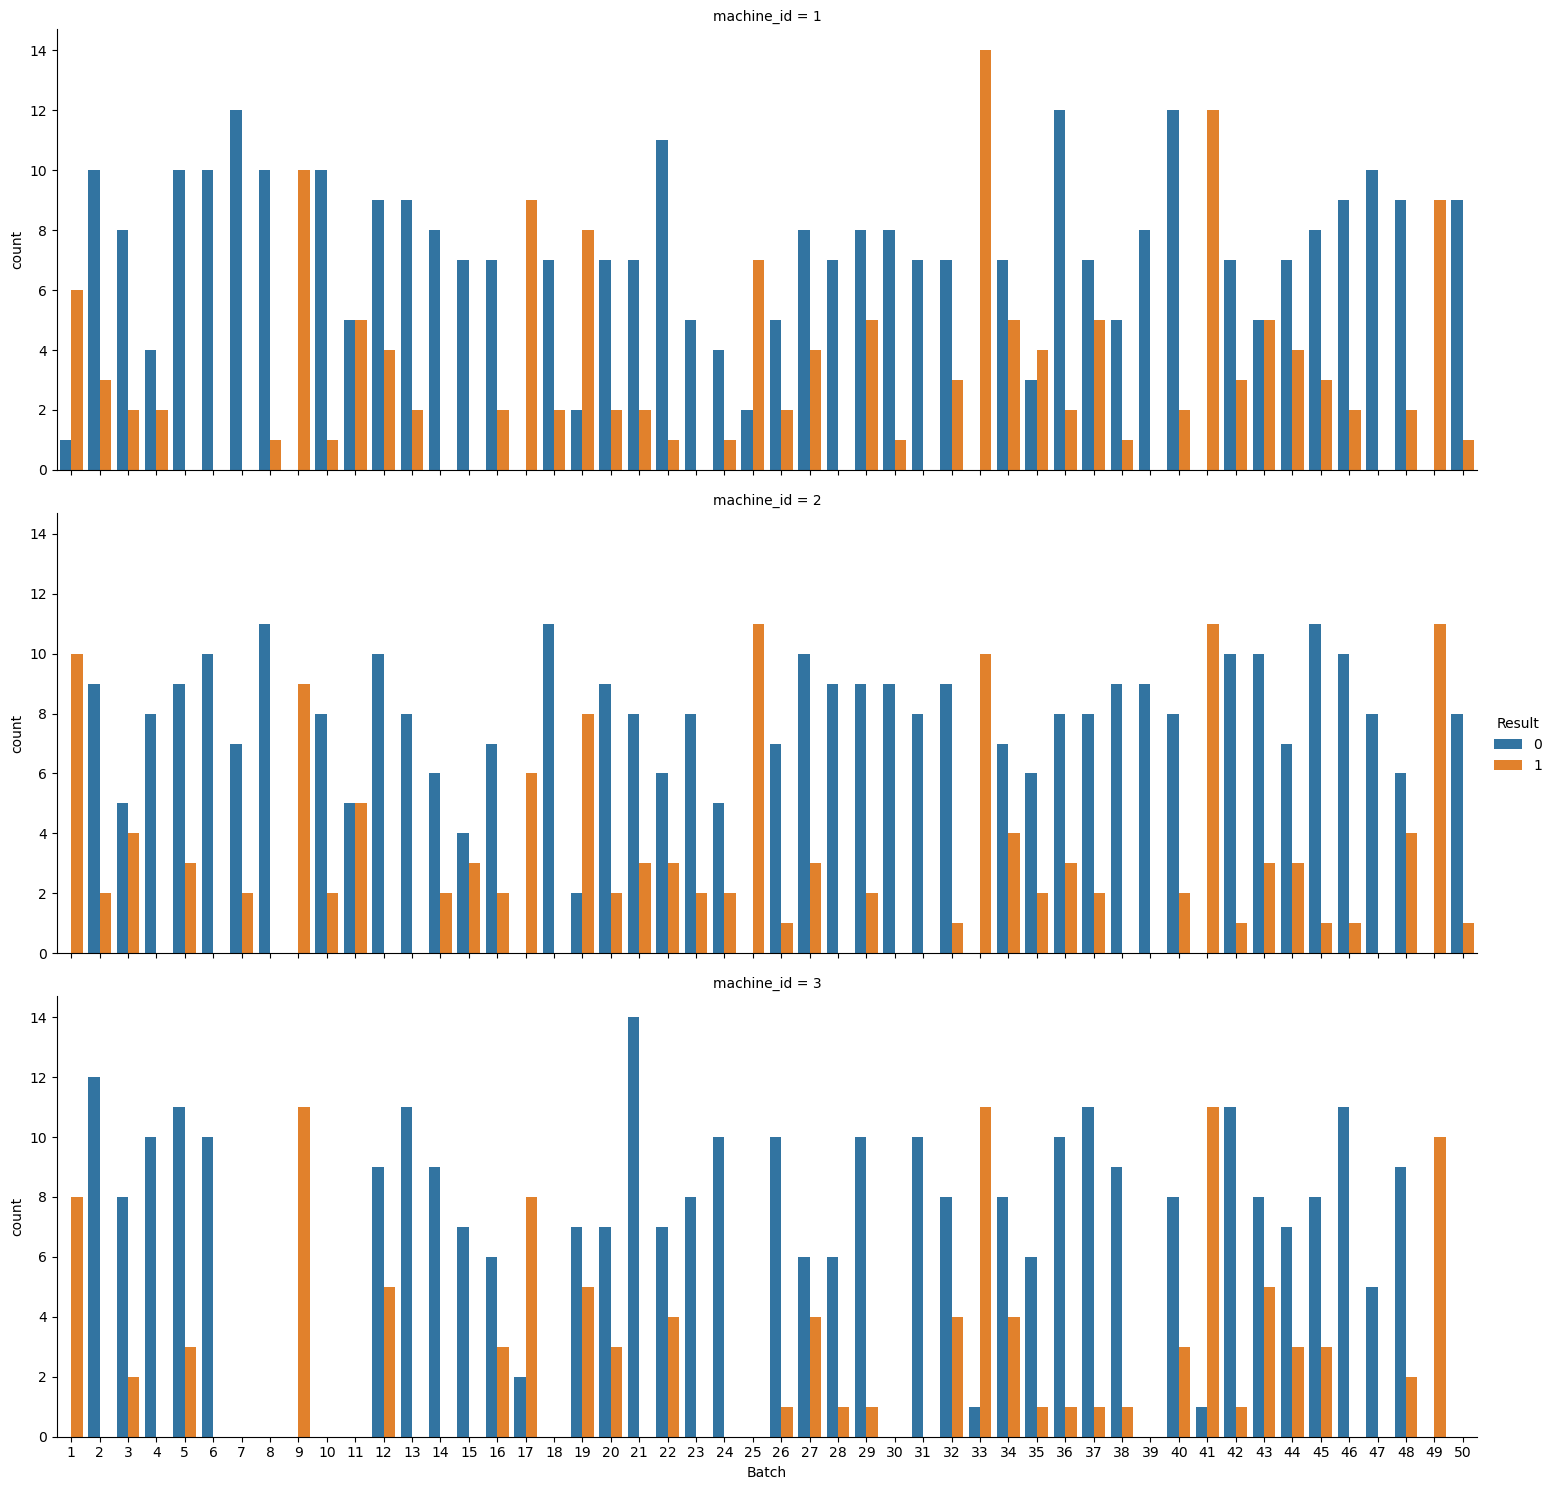

In [96]:
sns.catplot(data=dfb, x="Batch", hue="Result", row="machine_id", kind="count", aspect=3)

plt.show()

In the Bar Charts separted by Machine, we see that most Batches have passed the drop test rather than failed. 

We see that Batch 9, 17, 33, 41, and 49 has more fails than passes. 

#### Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id` and `Supplier`.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


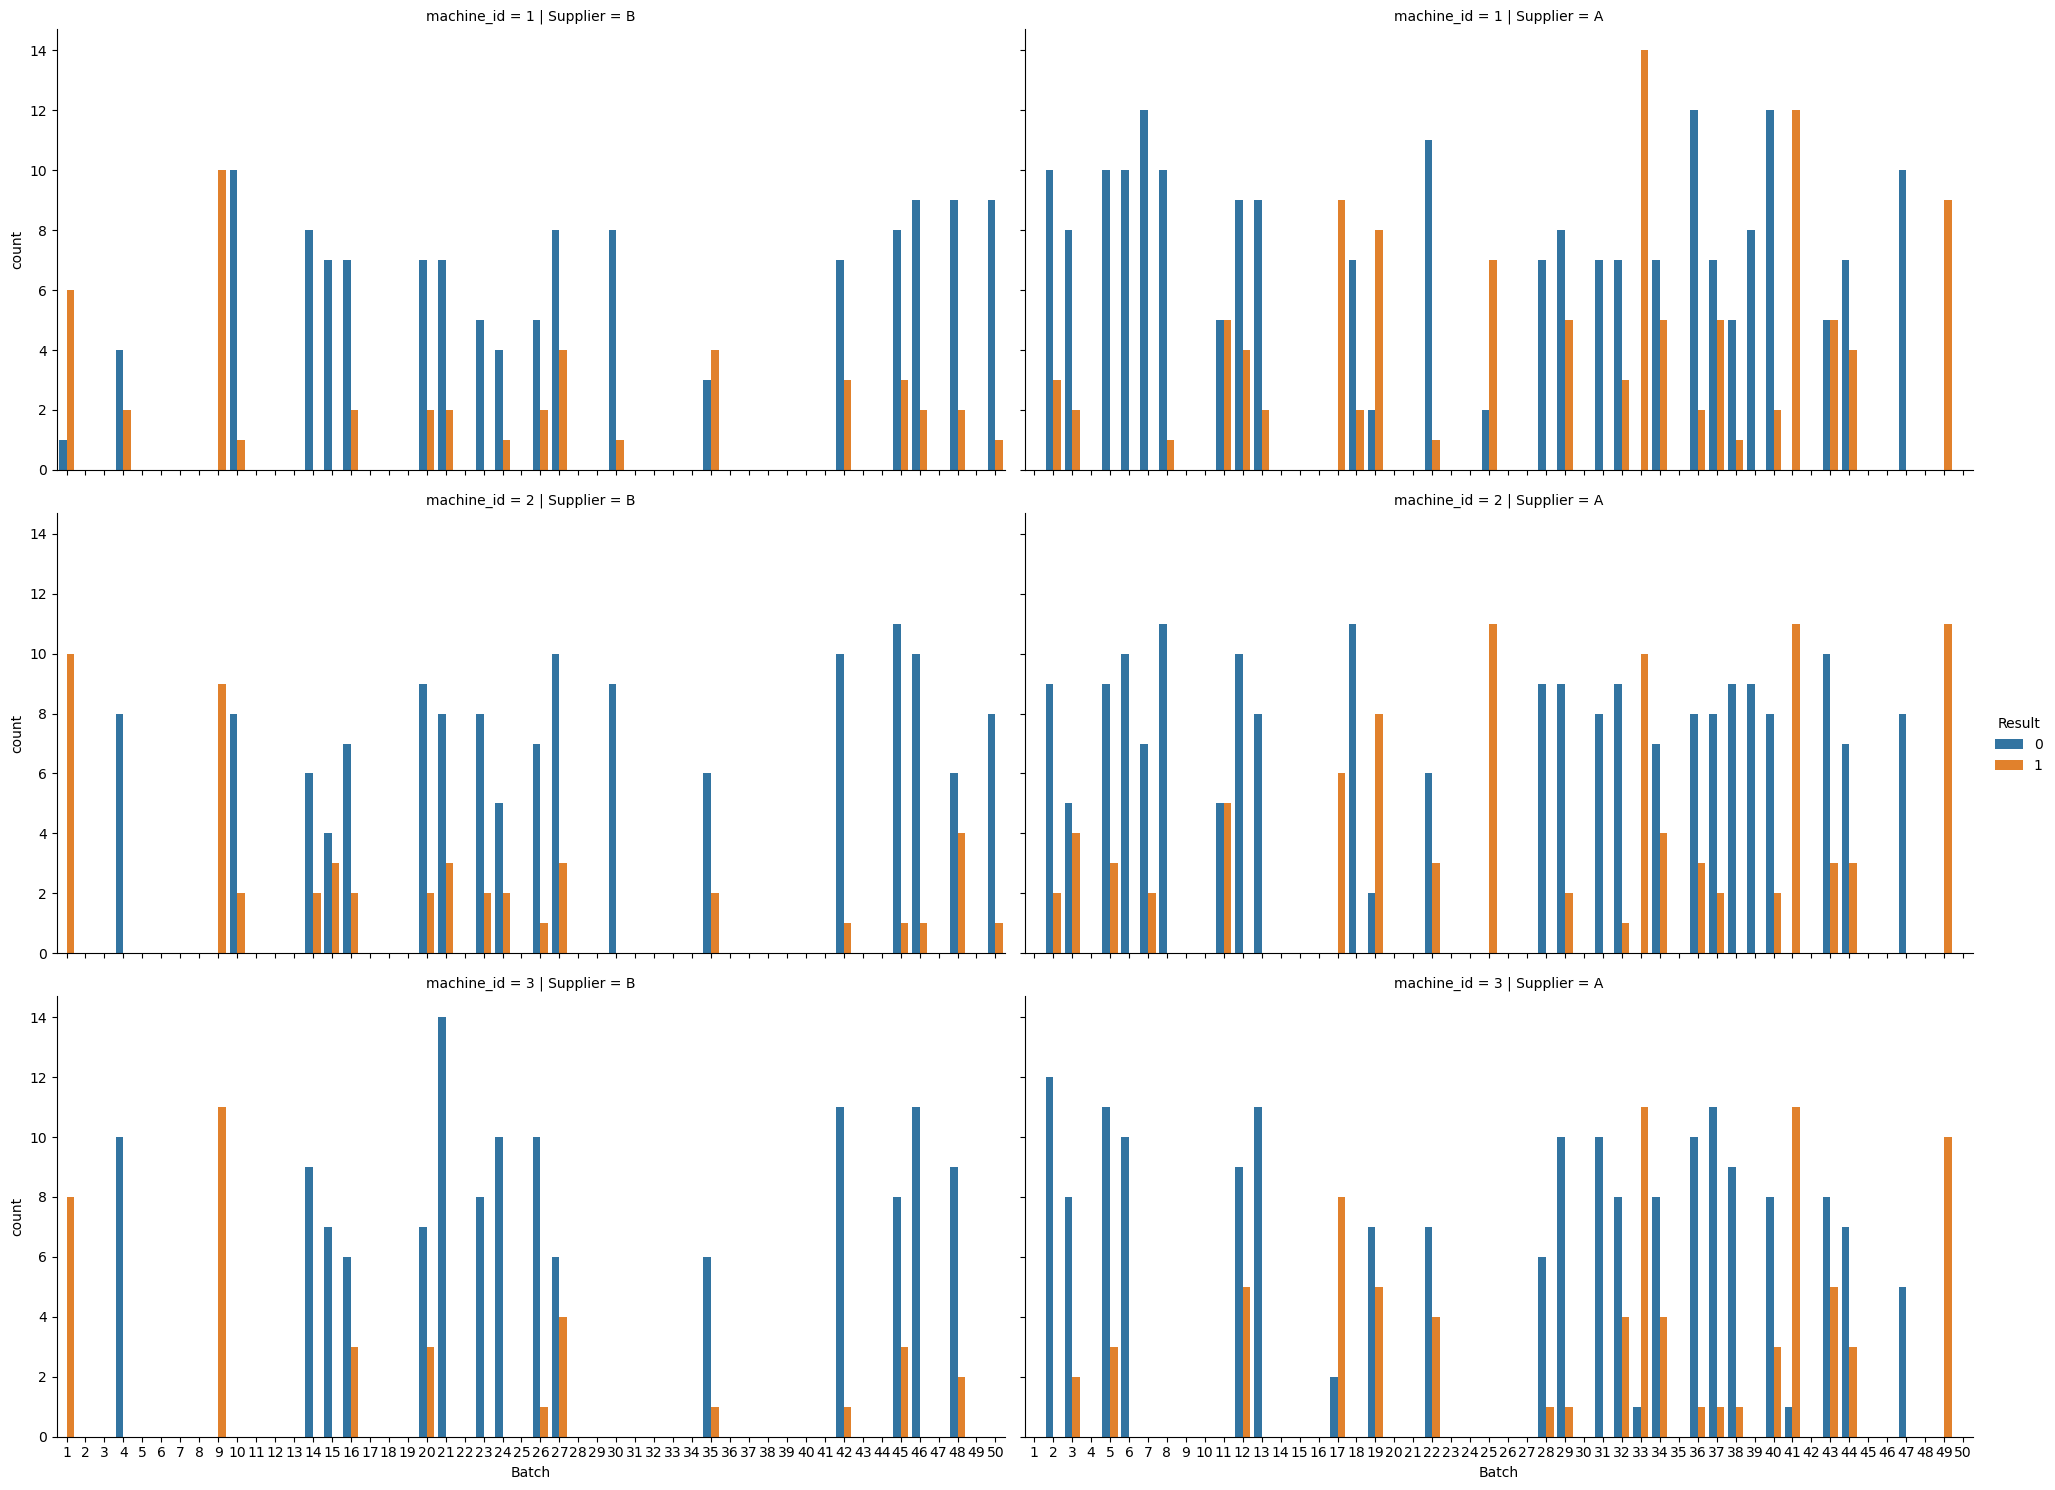

In [97]:
sns.catplot(data=dfb, x="Batch", hue="Result", row="machine_id", col="Supplier", kind="count", aspect=2)

plt.show()

In Supplier B, there are significantly more batches that passed the drop test compared to those that failed, with Batches 1 and 9 being the only ones that failed across all machines.

Similarly, in Supplier A, most batches also passed the drop test across all machines. However, we observe that Batches 17, 33, 41, and 49 have more failures than passes across all machines.

#### Calculate the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id`.

In [98]:
def calculate_fail_proportion(var_list, df):
    cell_prop = df.groupby(var_list + ["Result"]).aggregate(counts=("Result", "count")).reset_index()
    cell_prop2 = cell_prop.groupby(var_list).aggregate(totals=("counts", "sum")).reset_index()
    cell_prop_full = pd.merge(cell_prop, cell_prop2, on=var_list)
    cell_prop_full["proportion"] = cell_prop_full["counts"] / cell_prop_full["totals"]
    cell_prop_full["proportion"].fillna(0, inplace=True)
    
    return cell_prop_full.loc[cell_prop_full["Result"] == 1, :].copy()

In [99]:
fail_batch_mach = calculate_fail_proportion(var_list=['Batch', 'machine_id'], df=dfb)

In [100]:
fail_batch_mach

Batch  machine_id  Result  counts  totals  proportion
1       1           1       1       6       7    0.857143
3       1           2       1      10      10    1.000000
5       1           3       1       8       8    1.000000
7       2           1       1       3      13    0.230769
9       2           2       1       2      11    0.181818
..    ...         ...     ...     ...     ...         ...
291    49           2       1      11      11    1.000000
293    49           3       1      10      10    1.000000
295    50           1       1       1      10    0.100000
297    50           2       1       1       9    0.111111
299    50           3       1       0       0    0.000000

[150 rows x 6 columns]

Also looking at the proportion but stratified by Supplier as well!!

In [101]:
fail_batch_mach_sup = calculate_fail_proportion(var_list=['Batch', 'machine_id', "Supplier"], df=dfb)

In [102]:
fail_batch_mach_sup

Batch  machine_id Supplier  Result  counts  totals  proportion
1       1           1        A       1       0       0    0.000000
3       1           1        B       1       6       7    0.857143
5       1           2        A       1       0       0    0.000000
7       1           2        B       1      10      10    1.000000
9       1           3        A       1       0       0    0.000000
..    ...         ...      ...     ...     ...     ...         ...
591    50           1        B       1       1      10    0.100000
593    50           2        A       1       0       0    0.000000
595    50           2        B       1       1       9    0.111111
597    50           3        A       1       0       0    0.000000
599    50           3        B       1       0       0    0.000000

[300 rows x 7 columns]

#### Visualize the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id` and for each unique value of `Supplier`.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


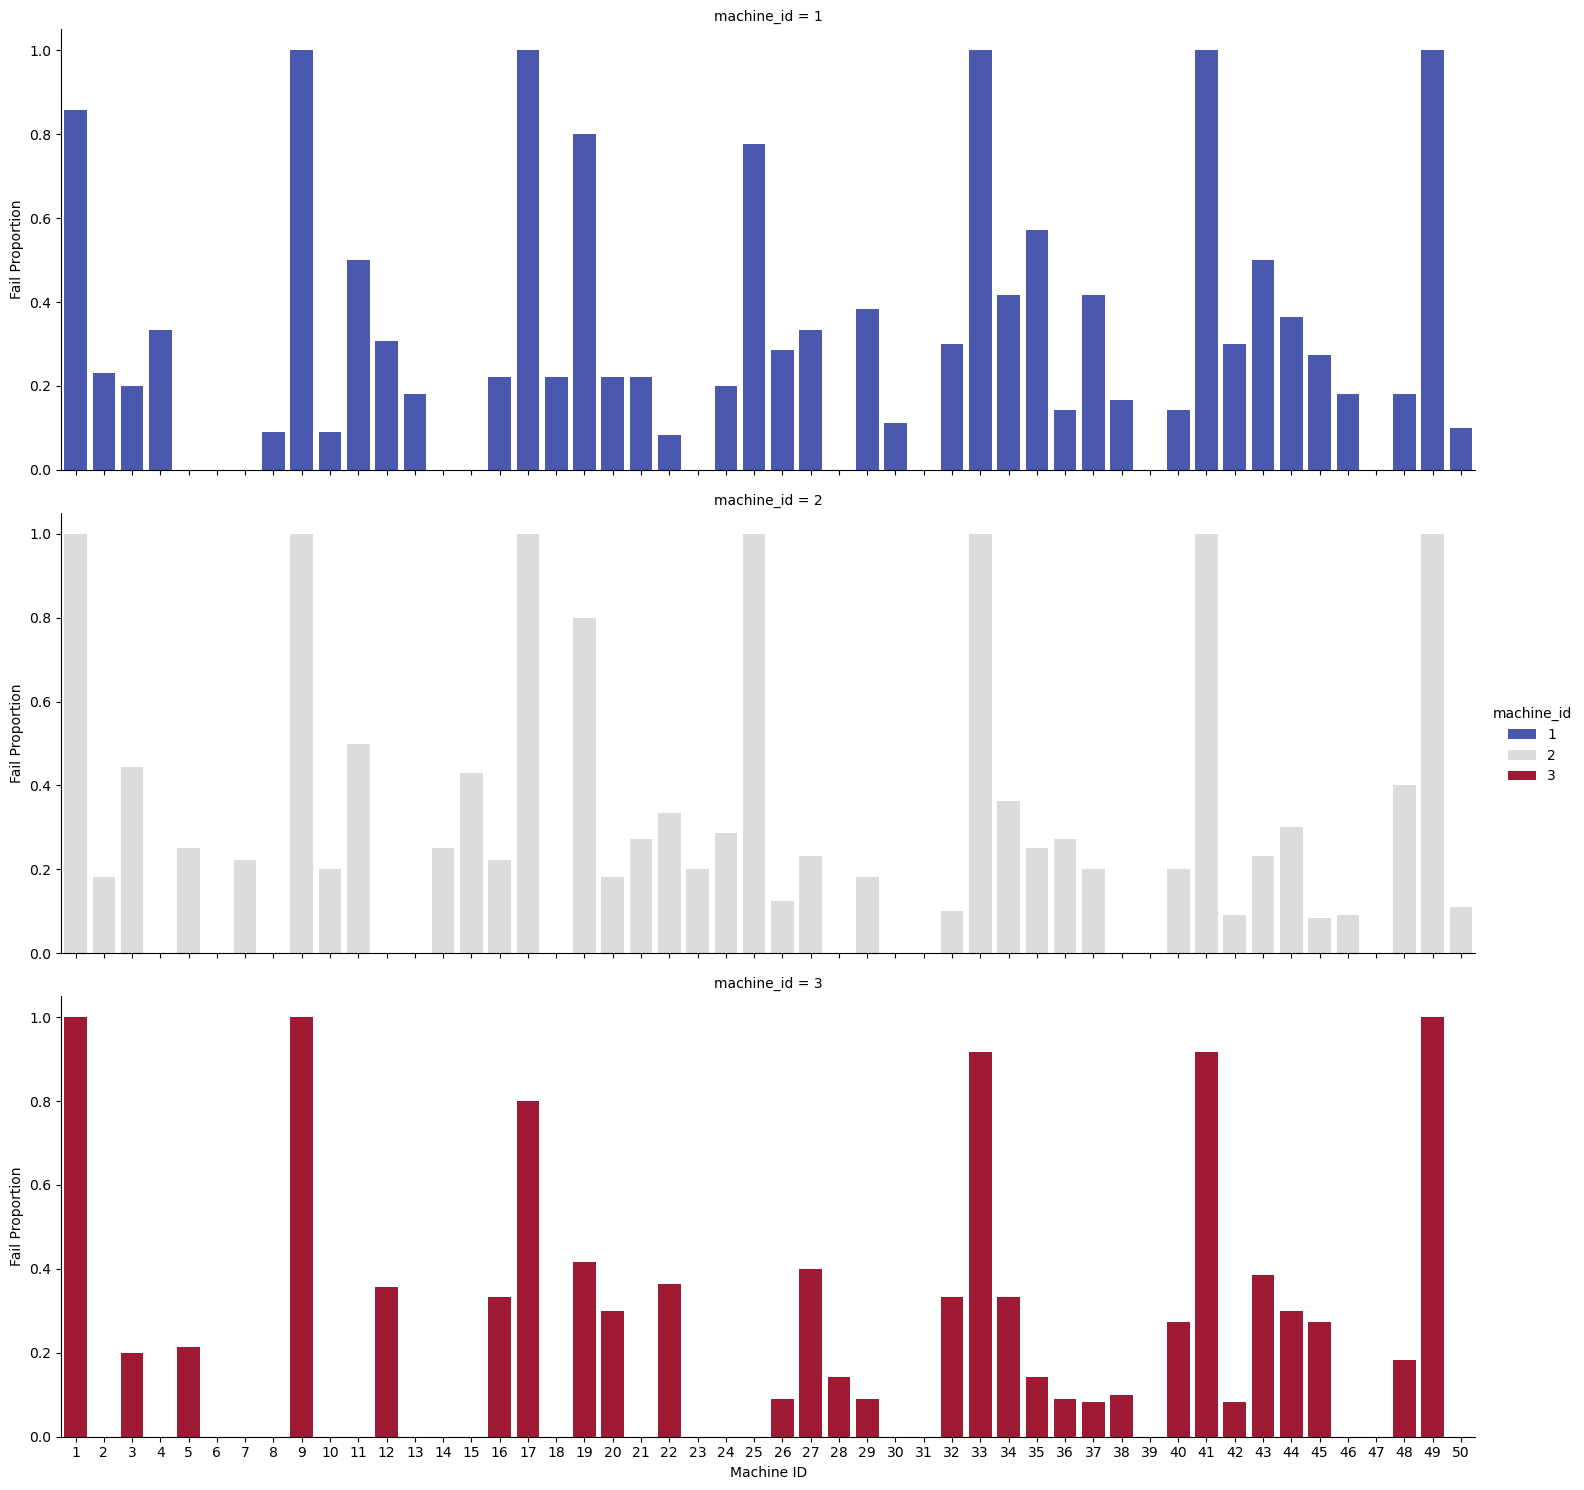

In [103]:
fig = sns.catplot(data=fail_batch_mach, x='Batch', y='proportion', row="machine_id", kind='bar', hue="machine_id", palette="coolwarm", aspect=3)

fig.set_axis_labels("Machine ID", "Fail Proportion")

plt.show()

From the plot above, it appears that the same batches consistently show higher failure proportions across all machines. 

These batches are 1, 9, 17, 33, 41, and 49.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


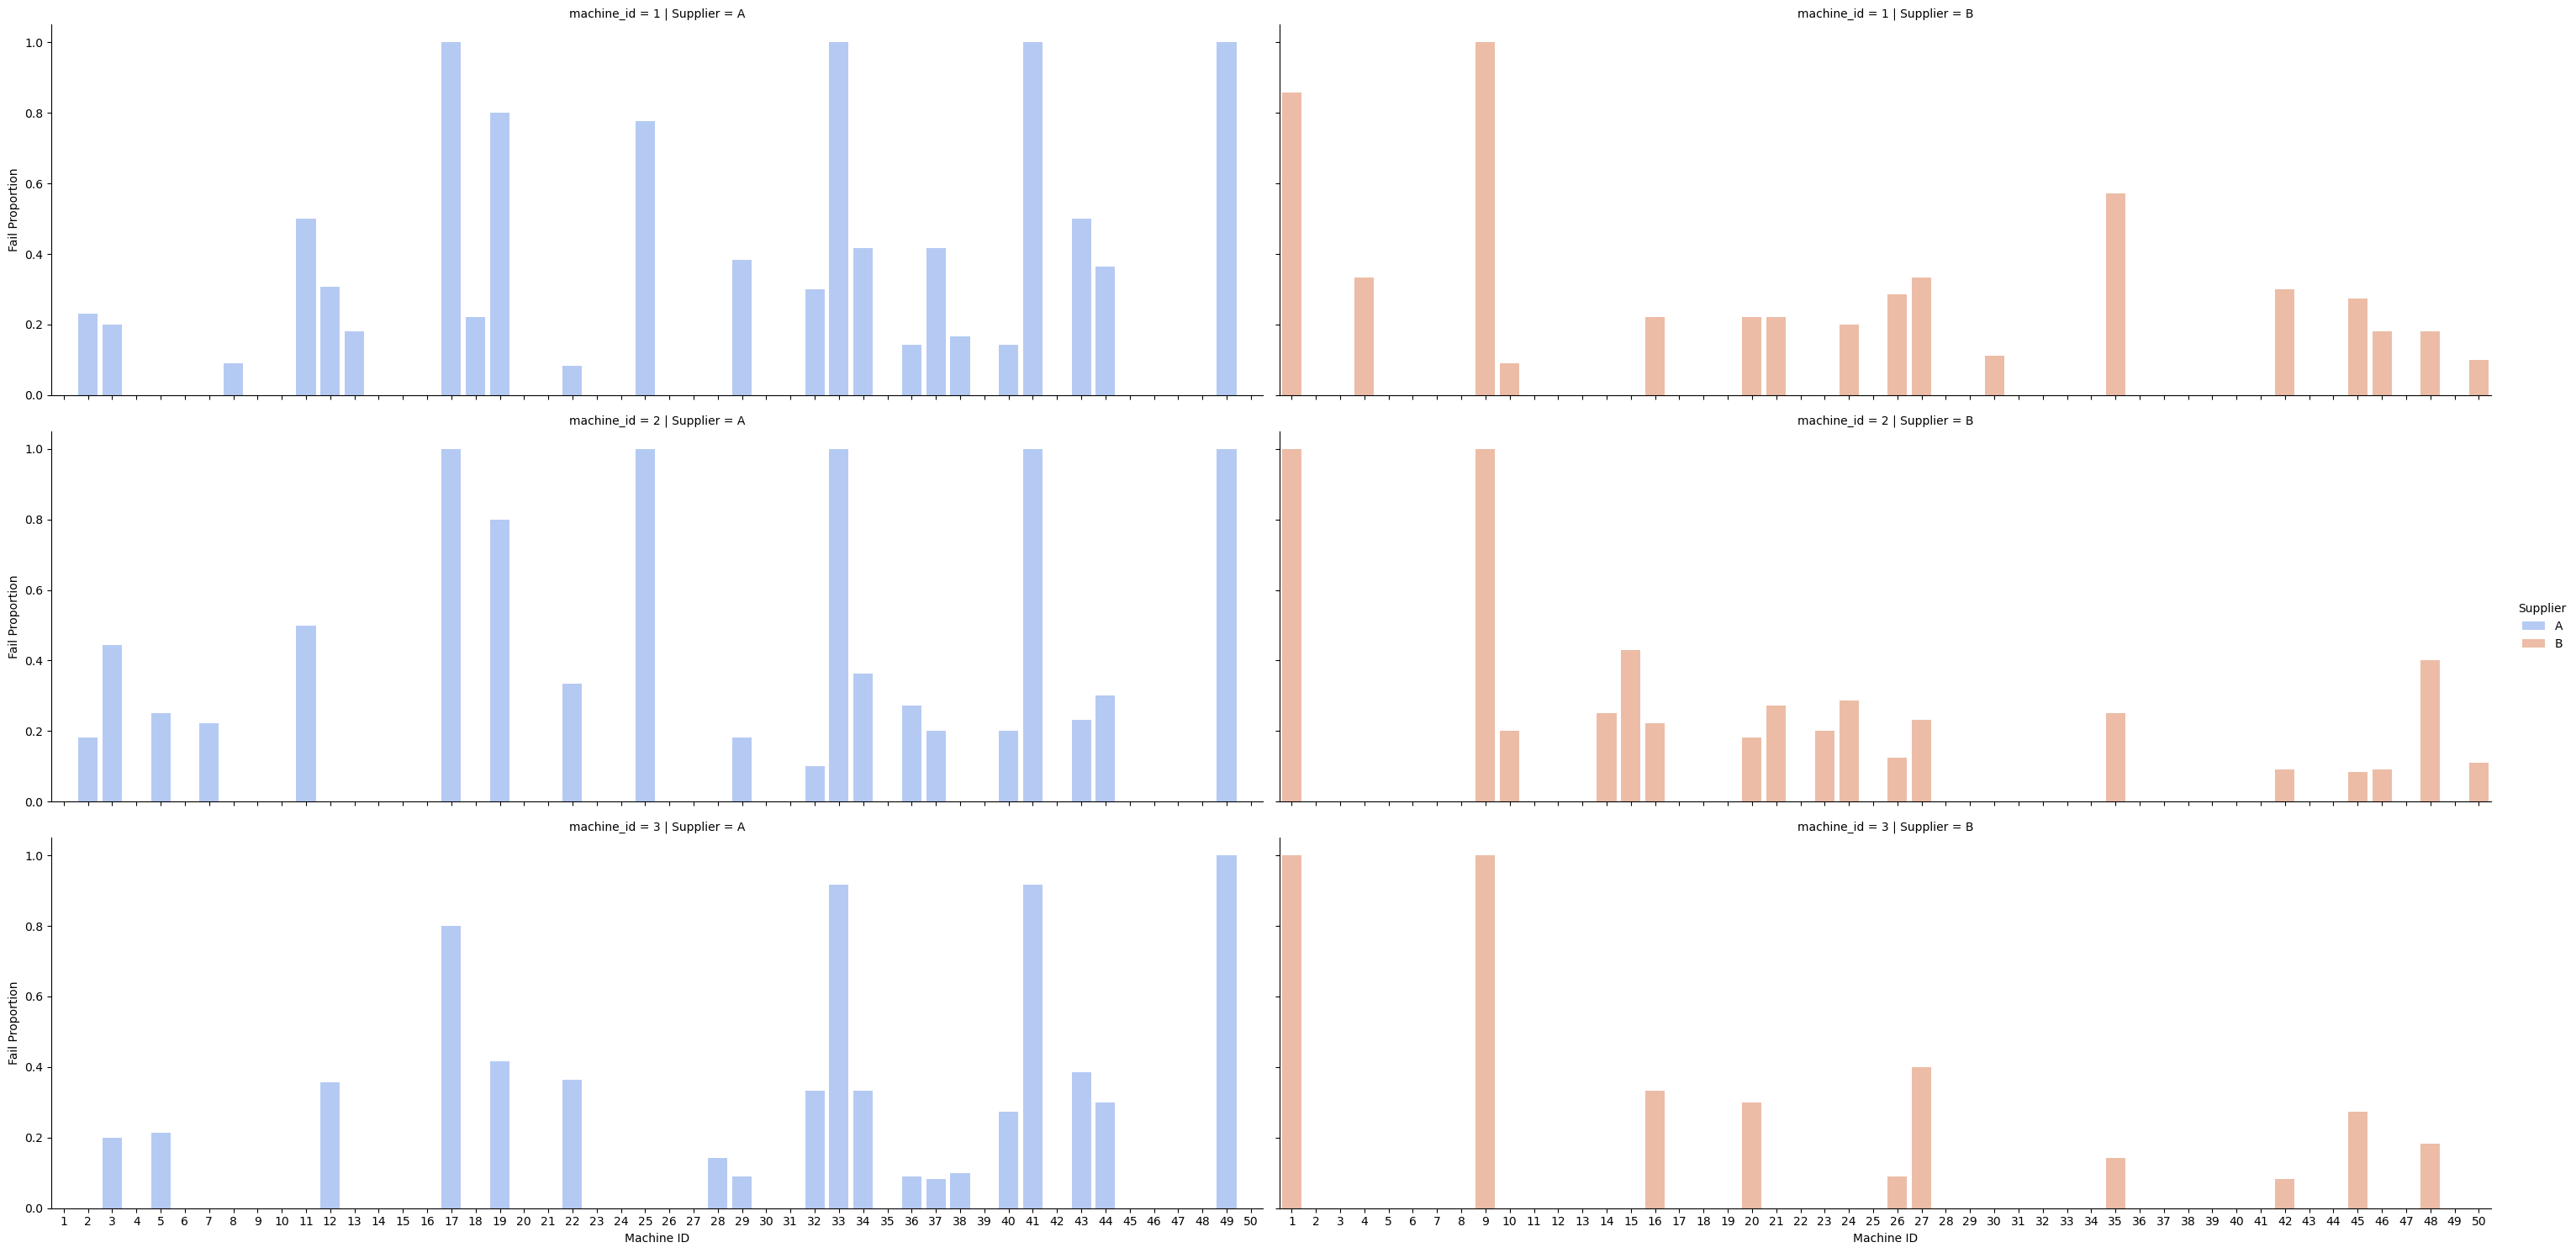

In [104]:
fig = sns.catplot(data=fail_batch_mach_sup, x='Batch', y='proportion', row="machine_id", col="Supplier", kind='bar', hue="Supplier", palette="coolwarm", aspect=3)

fig.set_axis_labels("Machine ID", "Fail Proportion")

plt.show()

Looking at the second plot with both Machine ID and Supplier, we see that Supplier A has more Batches with higher failure proportions than Supplier B.

## Problem 05

You must cluster the rows of `dfb` using the 4 operational variables `x1` through `x4`. You must decide how many clusters to use and describe how you made that choice. You may use KMeans OR Hierarchical clustering. Include any figures that helped you make that choice.

Visualize your cluster analysis results by:
* Plotting the number of observations per cluster.
* Visualizing the relationships between the operational variables GIVEN the cluster.

You are interested in the PROPORTION of cell phone cases that failed the DROP TEST. Are any of the clusters associated with higher failure PROPORTIONS than others? Based on your visualizations how would you describe that cluster?

Add as many cells as you see fit to answer this question.

#### SOLUTION

#### I know that we want complete records so I will run the code below even though we aren't missing any data. Just habbit :)

In [105]:
dfb_clean = dfb.dropna().copy()

In [106]:
dfb_clean

ID Batch s_id         x1          x2         x3         x4  \
0     B001-M01-S002     1    2  46.887333  112.266102  23.197330  13.064709   
1     B001-M01-S024     1   24  51.531574  100.207219  22.281345  13.796810   
2     B001-M01-S030     1   30  48.306819  109.445722  22.910858  13.839830   
3     B001-M01-S038     1   38  52.058573   93.272568  21.937216  13.332882   
4     B001-M01-S048     1   48  50.564504  109.184587  22.083064  13.954942   
...             ...   ...  ...        ...         ...        ...        ...   
1407  B050-M02-S033    50   33  52.139310  101.869648  20.802603  10.803831   
1408  B050-M02-S064    50   64  52.048377   98.445039  21.305935  11.142095   
1409  B050-M02-S065    50   65  52.116809  101.042307  20.695658  11.051621   
1410  B050-M02-S073    50   73  52.484297  101.426409  20.506720  11.032949   
1411  B050-M02-S092    50   92  52.690936   95.050804  20.324674  10.963370   

      machine_id Supplier    Density test_group_id  Result  
0              1        B  10.388587           A-0       1  
1              1        B  10.388587           A-0       1  
2              1        B  10.388587           A-0       0  
3              1        B  10.388587           A-0       1  
4              1        B  10.388587           A-0       1  
...          ...      ...        ...           ...     ...  
1407           2        B   9.935676           V-3       1  
1408           2        B   9.935676           V-3       0  
1409           2        B   9.935676           V-3       0  
1410           2        B   9.935676           V-3       0  
1411           2        B   9.935676           V-3       0  

[1412 rows x 12 columns]

#### I'll standardize the data!

In [107]:
num_var = ["x1", "x2", "x3", "x4"]

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


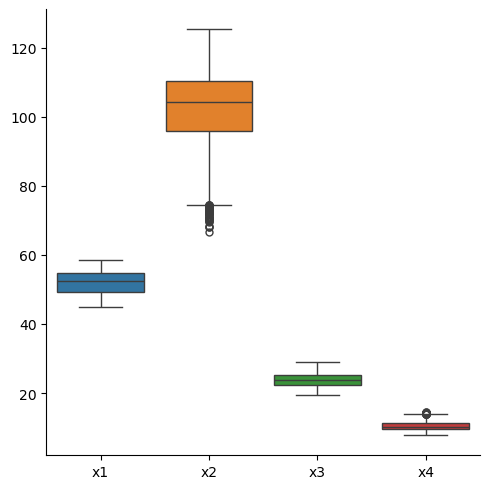

In [108]:
sns.catplot(data=dfb_clean.loc[:,num_var], kind="box")

plt.show()

In [109]:
dfb_features = dfb_clean.loc[:, num_var].copy()

In [110]:
dfb_features

x1          x2         x3         x4
0     46.887333  112.266102  23.197330  13.064709
1     51.531574  100.207219  22.281345  13.796810
2     48.306819  109.445722  22.910858  13.839830
3     52.058573   93.272568  21.937216  13.332882
4     50.564504  109.184587  22.083064  13.954942
...         ...         ...        ...        ...
1407  52.139310  101.869648  20.802603  10.803831
1408  52.048377   98.445039  21.305935  11.142095
1409  52.116809  101.042307  20.695658  11.051621
1410  52.484297  101.426409  20.506720  11.032949
1411  52.690936   95.050804  20.324674  10.963370

[1412 rows x 4 columns]

In [111]:
Xdfb = StandardScaler().fit_transform(dfb_features)

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


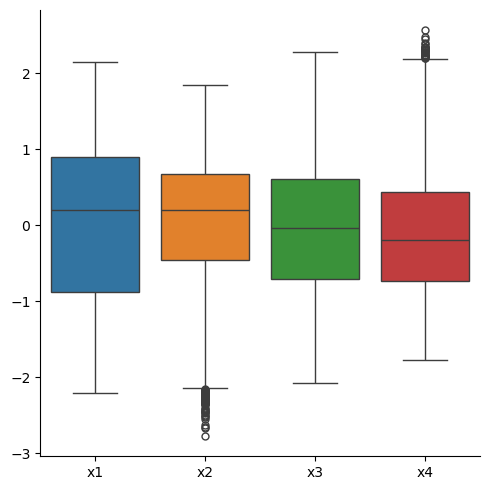

In [112]:
sns.catplot(data=pd.DataFrame(Xdfb, columns=dfb_features.columns), kind="box")

plt.show()

#### FIRST, I am going to Plot the Clusters and Total Within Sums of Squares to determine the optimal number of clusters to use!

In [113]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit(Xdfb)
    tots_within.append(km.inertia_)

##### Plot the data

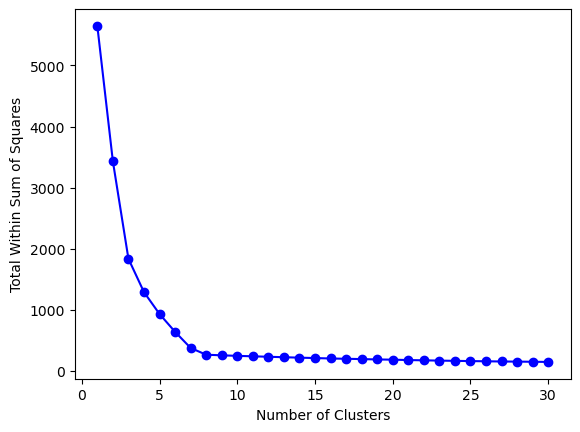

In [114]:
fig, ax = plt.subplots()

ax.plot(K, tots_within, "bo-")

ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Total Within Sum of Squares")

plt.show()

#### SECOND, I am going to plot a WARD METHOD in Hierachical Clustering to see what the recommended number of clusters is!!

In [115]:
hclust_ward = hierarchy.ward(Xdfb)

##### Plot the data

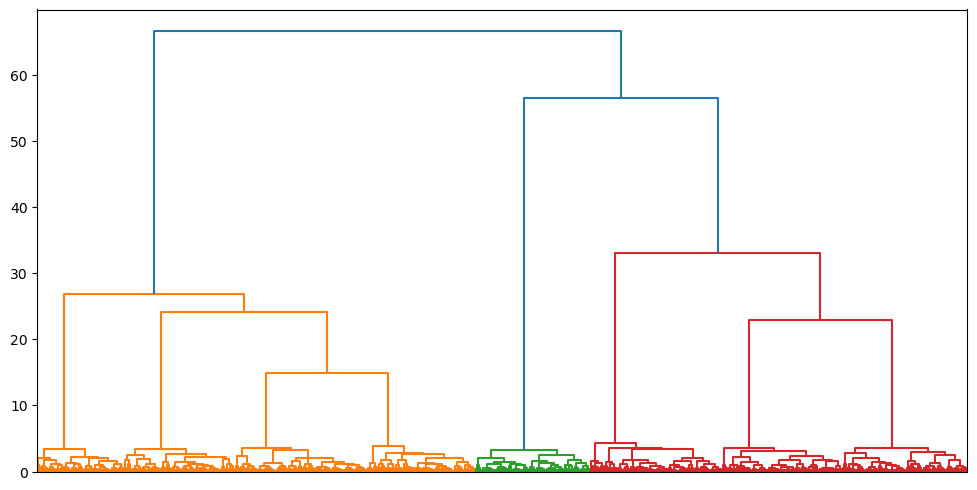

In [116]:
plt.figure(figsize=(12,6))

dn = hierarchy.dendrogram(hclust_ward, no_labels=True)

plt.show()

I think that three clusters make the most sense based on both plots!

In the Knee-Bend plot, it seems that cluster 3 is where we start to see the total within sum of squares stabilize and not change significantly.

In the Dendrogram plot, I can clearly identify three distinct clusters!

##### Cutting the tree and using 3 clusters!!!

In [117]:
hclust3 = hierarchy.cut_tree(hclust_ward, n_clusters=3).ravel()

In [118]:
hclust3

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
dfb_clean["hclust3"] = pd.Series(hclust3, index=dfb.index)

#### Plotting the number of observations per cluster

In [120]:
dfb_clean.hclust3.value_counts()

hclust3
2    666
0    572
1    174
Name: count, dtype: int64

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


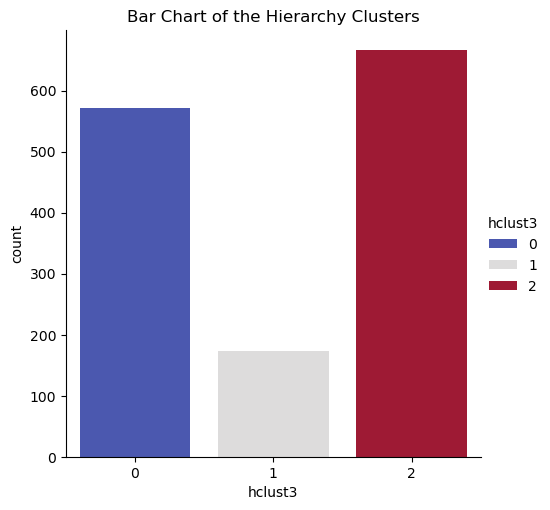

In [121]:
sns.catplot(data=dfb_clean, x="hclust3", hue="hclust3", palette="coolwarm", kind="count")
plt.title("Bar Chart of the Hierarchy Clusters")

plt.show()

We see in the Bar Chart above that Cluster 2 has the most, followed by Cluster 0 and way below is Cluster 1. 

#### Visualizing the relationships between the operational variables GIVEN the cluster.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


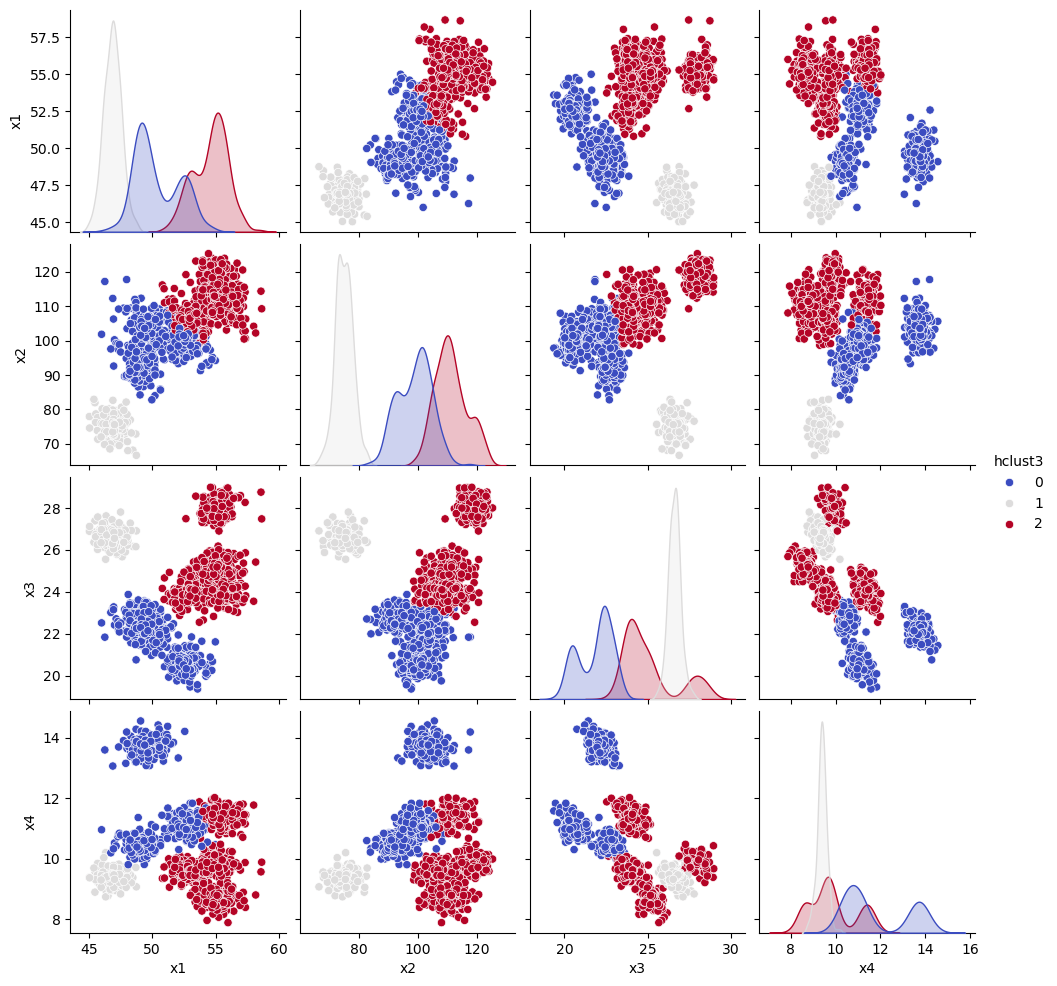

In [122]:
sns.pairplot(data=dfb_clean.loc[:, ["hclust3"]+num_var], hue="hclust3", palette="coolwarm", diag_kws={"common_norm": False})

plt.show()

With the clusters we created, some interesting patterns are emerging!

For instance, when looking at x1 with x2, we notice that higher values for both x1 and x2 are mostly represented by Cluster 2. In contrast, lower values for x1 and x2 correspond to Cluster 1, while mid-range values for both x1 and x2 are associated with Cluster 0.

#### Lets look at PROPORTION of cell phone cases FAILED the DROP TEST using our clusters!!!

In [123]:
fail_hclust3 = calculate_fail_proportion(var_list=['hclust3'], df=dfb_clean)

In [124]:
fail_hclust3

hclust3  Result  counts  totals  proportion
1        0       1     263     572    0.459790
3        1       1      70     174    0.402299
5        2       1      93     666    0.139640

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


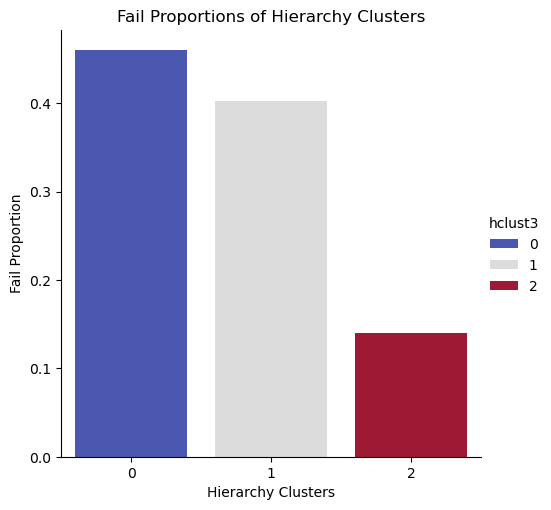

In [125]:
fig = sns.catplot(data=fail_hclust3, x='hclust3', y='proportion', kind='bar', hue="hclust3", palette="coolwarm")

fig.set_axis_labels("Hierarchy Clusters", "Fail Proportion")
plt.title("Fail Proportions of Hierarchy Clusters")

plt.show()

Cluster 0 is associated with having a higher failed proportion (46%), followed by Cluster 1 (40%), and then Cluster 2 (14%).

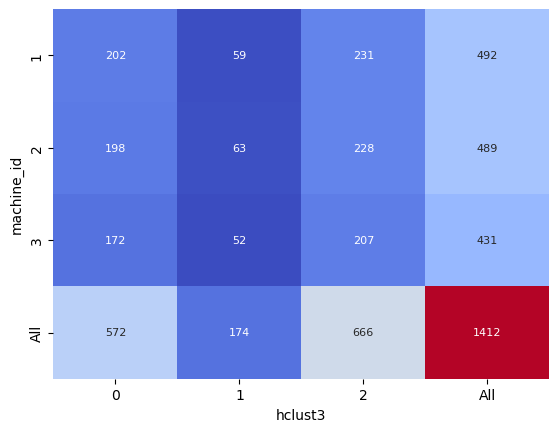

In [126]:
fig, ax = plt.subplots()

sns.heatmap(data=pd.crosstab(dfb_clean.machine_id, dfb_clean.hclust3, margins=True),
            cbar=False,
            annot=True,
            cmap="coolwarm",
            annot_kws={"size":8},
            fmt="d",
            ax=ax)

plt.show()

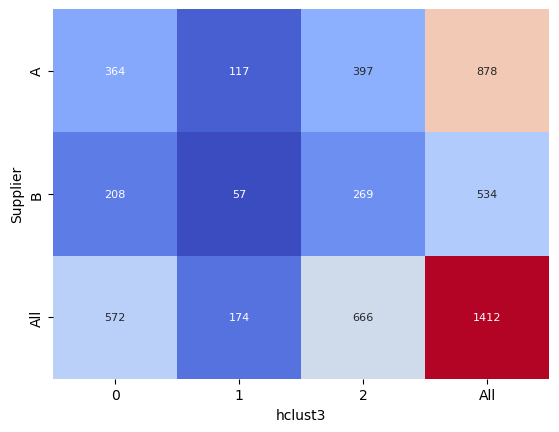

In [127]:
fig, ax = plt.subplots()

sns.heatmap(data=pd.crosstab(dfb_clean.Supplier, dfb_clean.hclust3, margins=True),
            cbar=False,
            annot=True,
            annot_kws={"size":8},
            cmap="coolwarm",
            fmt="d",
            ax=ax)

plt.show()

The observations in Cluster 0 represent the second-largest category.

When I plotted the heatmaps based on hclust3 with the Machine IDs, it’s evident that Cluster 0 is fairly evenly distributed across all three machines: there are 202 observations in Machine 1, 198 in Machine 2, and 172 in Machine 3.

When comparing hclust3 with Supplier data, we find that Cluster 0 contains 364 observations from Supplier A and 208 from Supplier B.